In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import log_loss
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [2]:
ds_train = pd.read_csv("train.csv")
ds_test = pd.read_csv("test.csv")

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
ds_train

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,target
0,0,0,0,6,1,0,0,0,0,7,0,0,0,3,0,1,0,0,3,3,1,0,2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,11,0,0,0,0,0,9,0,0,0,0,0,0,3,0,1,3,0,0,0,0,0,0,0,1,1,0,0,3,0,0,0,0,0,0,2,0,0,Class_6
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,Class_6
2,2,0,0,0,0,0,1,0,3,0,0,1,0,0,0,0,0,0,0,0,5,4,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,5,0,5,0,1,0,0,0,1,0,0,1,0,7,0,1,1,0,3,4,0,0,1,3,0,2,0,0,8,0,0,0,0,1,0,0,0,0,Class_2
3,3,0,0,7,0,1,5,2,2,0,1,2,0,5,0,0,4,0,0,22,2,1,0,0,0,0,3,0,37,0,1,3,13,0,10,0,3,1,1,0,7,0,0,2,0,1,0,0,0,0,0,0,10,0,0,25,1,0,1,2,0,2,0,7,0,0,0,0,4,0,2,2,0,4,3,0,Class_8
4,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,0,1,6,0,1,32,0,6,0,0,2,0,1,4,0,0,0,0,2,4,0,0,44,0,0,2,0,0,0,3,0,34,0,6,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,9,0,0,2,2,0,1,2,0,0,0,1,0,1,1,0,0,0,4,1,0,Class_6
199996,199996,0,2,0,0,1,0,0,0,0,0,2,0,2,0,0,0,0,0,1,1,0,3,0,0,0,0,1,1,0,0,0,7,0,0,0,1,0,2,0,1,0,0,2,9,0,0,0,0,0,0,3,0,0,0,0,0,0,1,0,1,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,Class_6
199997,199997,1,2,0,0,0,2,0,1,8,4,10,1,1,1,2,1,0,0,0,6,0,9,0,14,0,4,7,2,53,0,6,1,1,0,1,0,0,2,2,0,1,0,4,12,2,0,0,0,0,0,2,1,0,0,89,0,6,5,1,0,0,3,0,0,2,4,1,0,1,1,1,0,1,0,0,Class_8
199998,199998,0,0,2,0,2,1,0,0,3,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,2,0,2,1,0,0,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,1,0,0,1,0,Class_7


In [5]:
ds_test

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
0,200000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,200001,1,2,0,0,0,0,0,0,0,0,1,0,2,2,0,0,1,0,0,0,2,0,0,1,0,3,0,1,0,0,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,3,2,0,0,0,0,0,0,1,7,0,1,3,1,3,0,0,0,0,3,0,0
2,200002,0,1,7,1,0,0,0,0,6,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,2,0,0,4,0,0,0,0,0,0,0,0,1,0,0,4,0,0,1,0,0,0,6,0,0,2,10,0,0,0,2,1,0,0,0,0,0,3,0,0,0,0,3,0,2,0,0
3,200003,0,0,0,4,3,1,0,0,0,0,7,0,0,0,7,0,0,0,5,0,1,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,7,5,0,0,0,0,0,0,0,0,0,2,3,0,0,0,1,0,0,0,0,0,4,0,0,0,1,0,0,0,4,0,0
4,200004,0,0,5,0,0,0,0,0,0,8,1,0,2,0,0,0,0,0,9,1,0,0,0,0,0,0,0,0,3,0,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,2,1,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,299995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,1,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
99996,299996,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,1,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0
99997,299997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2
99998,299998,0,0,0,0,2,2,0,0,1,0,0,0,9,1,1,0,0,0,1,1,0,10,0,1,0,0,0,0,0,0,2,1,1,0,0,0,0,1,0,2,1,0,1,1,0,3,2,1,1,1,2,0,0,4,6,0,9,0,1,0,3,2,0,1,0,1,0,0,0,0,1,0,1,0,0


In [6]:
def null_values(dataset):
    for keys, values in dict(dataset.isna().sum()).items():
        if values!=0:
            print(keys,values)

In [7]:
null_values(ds_train)

In [8]:
null_values(ds_test)

In [9]:
ds_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 77 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          200000 non-null  int64 
 1   feature_0   200000 non-null  int64 
 2   feature_1   200000 non-null  int64 
 3   feature_2   200000 non-null  int64 
 4   feature_3   200000 non-null  int64 
 5   feature_4   200000 non-null  int64 
 6   feature_5   200000 non-null  int64 
 7   feature_6   200000 non-null  int64 
 8   feature_7   200000 non-null  int64 
 9   feature_8   200000 non-null  int64 
 10  feature_9   200000 non-null  int64 
 11  feature_10  200000 non-null  int64 
 12  feature_11  200000 non-null  int64 
 13  feature_12  200000 non-null  int64 
 14  feature_13  200000 non-null  int64 
 15  feature_14  200000 non-null  int64 
 16  feature_15  200000 non-null  int64 
 17  feature_16  200000 non-null  int64 
 18  feature_17  200000 non-null  int64 
 19  feature_18  200000 non-

In [10]:
ds_train.select_dtypes(include="object")

,target
0,Class_6
1,Class_6
2,Class_2
3,Class_8
4,Class_2
...,...
199995,Class_6
199996,Class_6
199997,Class_8
199998,Class_7


In [11]:
ds_train.drop("id", axis=1, inplace=True)
ds_test.drop("id", axis=1, inplace=True)

In [12]:
ds_train

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,target
0,0,0,6,1,0,0,0,0,7,0,0,0,3,0,1,0,0,3,3,1,0,2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,11,0,0,0,0,0,9,0,0,0,0,0,0,3,0,1,3,0,0,0,0,0,0,0,1,1,0,0,3,0,0,0,0,0,0,2,0,0,Class_6
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,Class_6
2,0,0,0,0,0,1,0,3,0,0,1,0,0,0,0,0,0,0,0,5,4,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,5,0,5,0,1,0,0,0,1,0,0,1,0,7,0,1,1,0,3,4,0,0,1,3,0,2,0,0,8,0,0,0,0,1,0,0,0,0,Class_2
3,0,0,7,0,1,5,2,2,0,1,2,0,5,0,0,4,0,0,22,2,1,0,0,0,0,3,0,37,0,1,3,13,0,10,0,3,1,1,0,7,0,0,2,0,1,0,0,0,0,0,0,10,0,0,25,1,0,1,2,0,2,0,7,0,0,0,0,4,0,2,2,0,4,3,0,Class_8
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,1,6,0,1,32,0,6,0,0,2,0,1,4,0,0,0,0,2,4,0,0,44,0,0,2,0,0,0,3,0,34,0,6,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,9,0,0,2,2,0,1,2,0,0,0,1,0,1,1,0,0,0,4,1,0,Class_6
199996,0,2,0,0,1,0,0,0,0,0,2,0,2,0,0,0,0,0,1,1,0,3,0,0,0,0,1,1,0,0,0,7,0,0,0,1,0,2,0,1,0,0,2,9,0,0,0,0,0,0,3,0,0,0,0,0,0,1,0,1,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,Class_6
199997,1,2,0,0,0,2,0,1,8,4,10,1,1,1,2,1,0,0,0,6,0,9,0,14,0,4,7,2,53,0,6,1,1,0,1,0,0,2,2,0,1,0,4,12,2,0,0,0,0,0,2,1,0,0,89,0,6,5,1,0,0,3,0,0,2,4,1,0,1,1,1,0,1,0,0,Class_8
199998,0,0,2,0,2,1,0,0,3,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,2,0,2,1,0,0,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,1,0,0,1,0,Class_7


In [13]:
ds_test

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,0,0,0,0,0,0,0,0,1,0,2,2,0,0,1,0,0,0,2,0,0,1,0,3,0,1,0,0,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,3,2,0,0,0,0,0,0,1,7,0,1,3,1,3,0,0,0,0,3,0,0
2,0,1,7,1,0,0,0,0,6,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,2,0,0,4,0,0,0,0,0,0,0,0,1,0,0,4,0,0,1,0,0,0,6,0,0,2,10,0,0,0,2,1,0,0,0,0,0,3,0,0,0,0,3,0,2,0,0
3,0,0,0,4,3,1,0,0,0,0,7,0,0,0,7,0,0,0,5,0,1,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,7,5,0,0,0,0,0,0,0,0,0,2,3,0,0,0,1,0,0,0,0,0,4,0,0,0,1,0,0,0,4,0,0
4,0,0,5,0,0,0,0,0,0,8,1,0,2,0,0,0,0,0,9,1,0,0,0,0,0,0,0,0,3,0,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,2,1,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,1,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
99996,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,1,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0
99997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2
99998,0,0,0,0,2,2,0,0,1,0,0,0,9,1,1,0,0,0,1,1,0,10,0,1,0,0,0,0,0,0,2,1,1,0,0,0,0,1,0,2,1,0,1,1,0,3,2,1,1,1,2,0,0,4,6,0,9,0,1,0,3,2,0,1,0,1,0,0,0,0,1,0,1,0,0


0     146389
1      24536
2      10197
3       6651
4       3580
5       3079
6       1751
7        671
8        349
9        106
10        71
11        63
12        87
13        63
14        67
15        76
16        70
17        57
19        64
20       130
21        70
22        68
23        55
24        81
25        66
26        56
27        87
28        63
29       140
30        73
31        76
32       113
34       144
37       102
39        78
40       129
42        95
43        66
47        88
48        83
56       100
61       110
Name: feature_0, dtype: int64


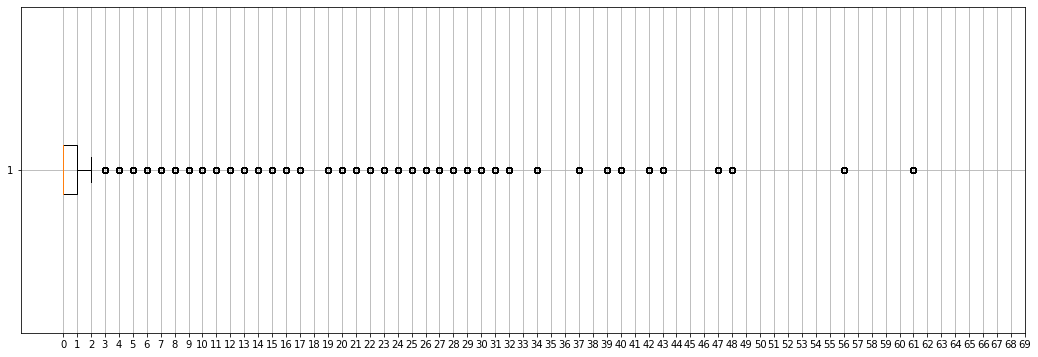

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


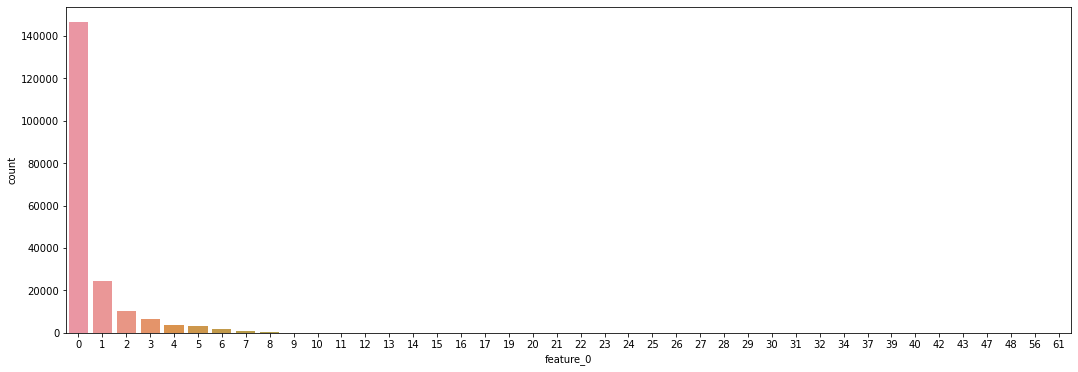

-------------------------------------------------------------------------------------------------------------------
0     140375
1      27817
2      11185
3       5247
4       4272
5       1488
6       1812
7        944
8        732
9        594
10       826
11       392
12       666
13       187
14       411
15       197
16       139
17       115
18       120
19       115
20       127
21       122
22       163
23       111
24       127
25       105
26       147
27       147
30       140
31       135
35       145
36       156
37       154
38       123
39       150
41       171
51       143
Name: feature_1, dtype: int64


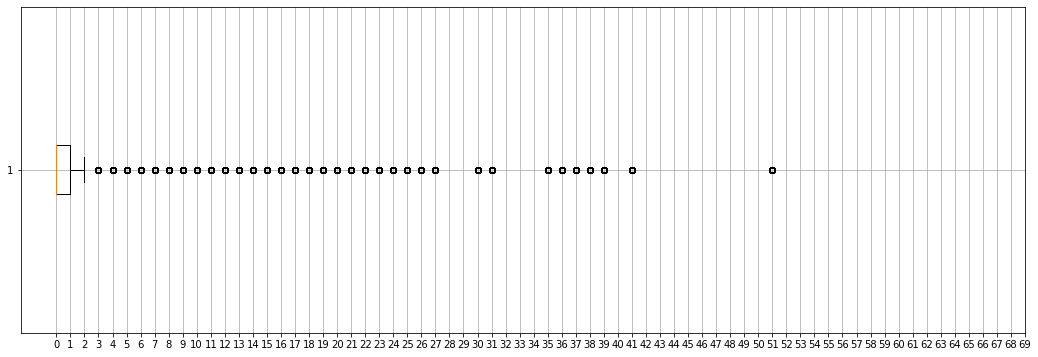

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


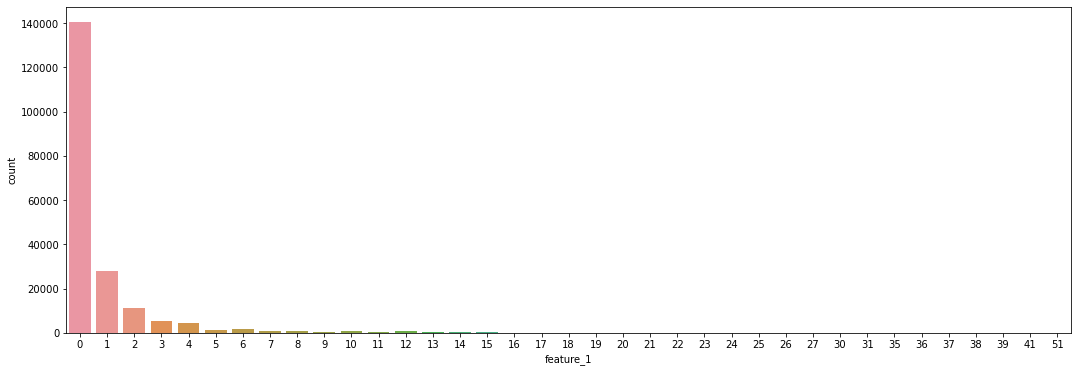

-------------------------------------------------------------------------------------------------------------------
0     122501
1      31503
2      12208
3       6136
4       3900
5       3174
6       3271
7       1356
8       1658
9       1571
10      1915
11      1066
12      1070
13       825
14       722
15       394
16       608
17       363
18       388
19       285
20       284
21       184
22       220
23       222
24       189
25       207
26       132
27       164
28       174
29       126
30       160
31       141
32       178
34       193
35       189
36       168
37       191
38       159
40       212
41       193
42       187
44       168
49       167
50       165
52       195
59       180
61       154
64       184
Name: feature_2, dtype: int64


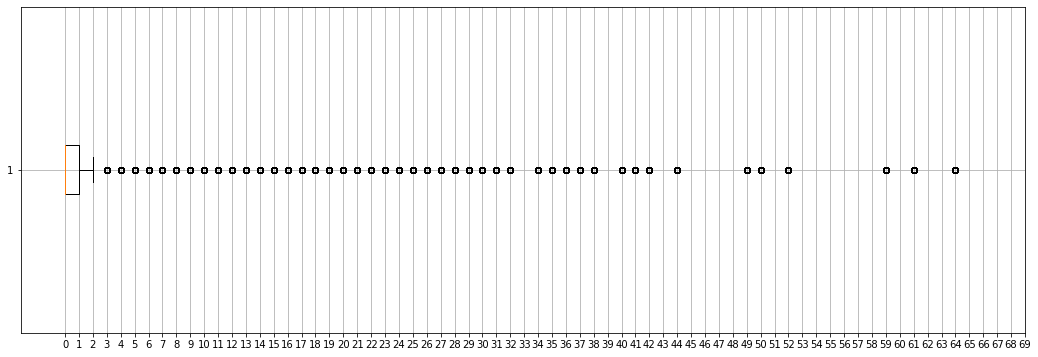

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


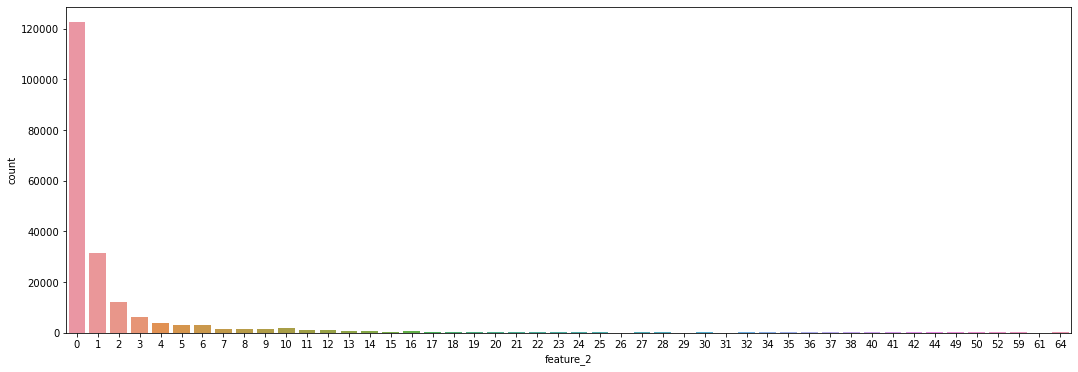

-------------------------------------------------------------------------------------------------------------------
0     120767
1      33919
2      12667
3       7518
4       5482
5       3412
6       2218
7       1679
8       1508
9        861
10       956
11       674
12       674
13       327
14       412
15       147
16       303
17       141
18       268
19        90
20       264
21       146
22       261
23       164
24       143
25       132
26       204
27       156
28       142
29       112
30       170
31       144
32       159
33       176
34       173
35       128
36       121
37       153
38       121
40       139
41       150
42       114
44       156
46       147
47       164
48       149
50       134
51       130
52       134
54       165
55       160
56       123
57       185
58       150
60       115
63       133
67       156
68       146
70       158
Name: feature_3, dtype: int64


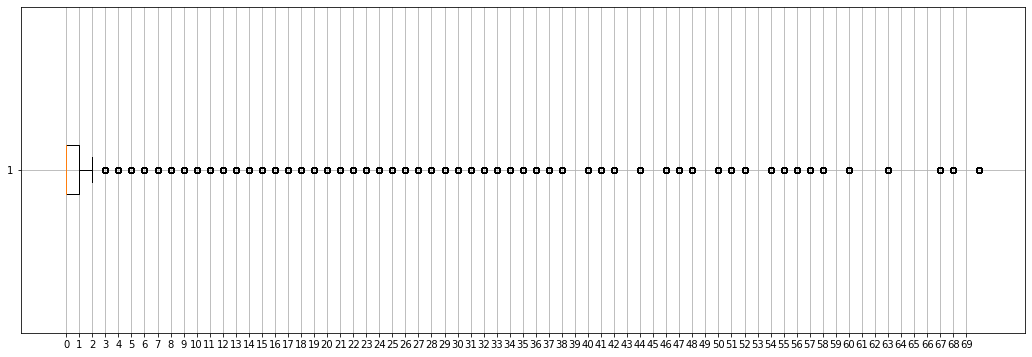

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


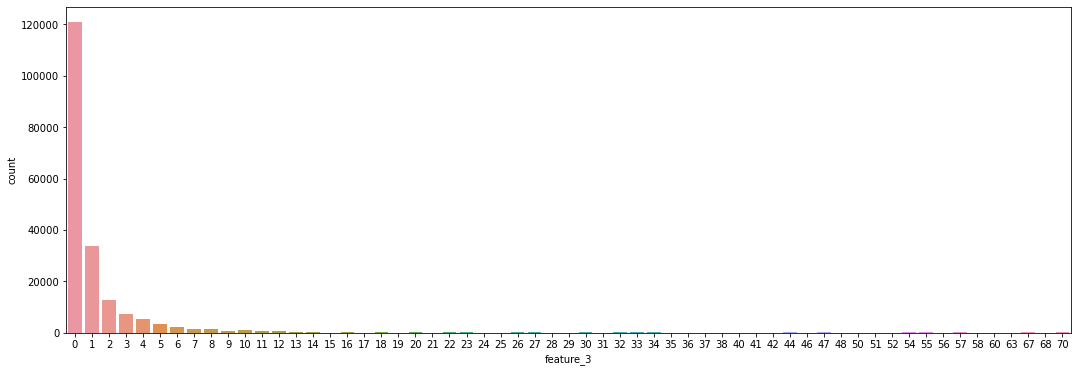

-------------------------------------------------------------------------------------------------------------------
0     154093
1      22750
2       8039
3       4364
4       2626
5       1887
6        891
7        929
8        639
9        361
10       378
11       245
12       192
13       245
14       177
15       169
16       138
17       153
18       155
19       157
20       153
21       130
22       131
26       157
27       149
29       127
30       153
31       110
32       143
38       159
Name: feature_4, dtype: int64


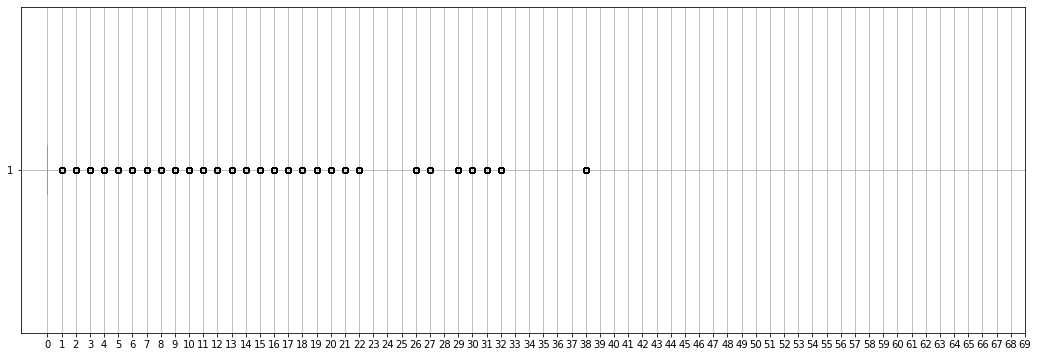

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


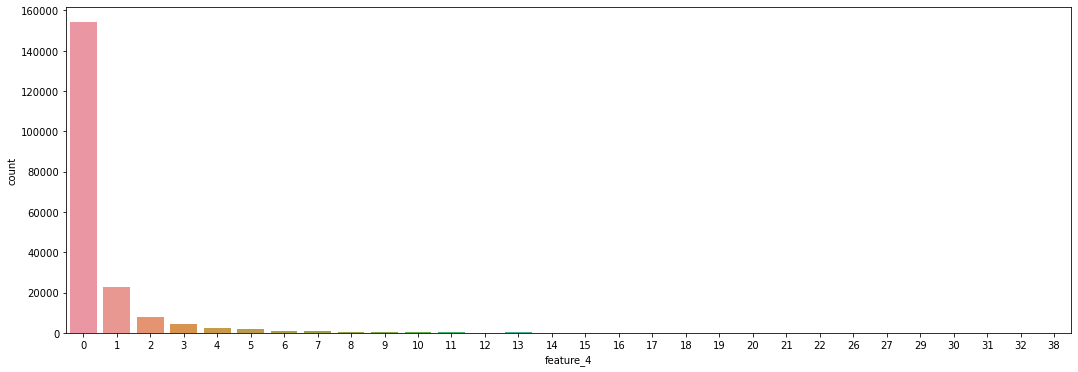

-------------------------------------------------------------------------------------------------------------------
0     119020
1      39515
2      19937
3       6614
4       4728
5       2242
6       1778
7       1025
8        604
9        423
10       309
11       157
12        75
13        88
14       143
15       123
16        69
17        51
18        67
19        66
20        57
21        69
22        66
23        96
24        95
25        81
26        65
27        88
28       117
29        91
30       124
31       119
32        65
33        87
34       131
35        81
36        80
37       116
38        73
39        94
40        77
41        80
42        85
43        80
45        93
46        62
48        66
51        59
52        72
54       106
56        93
57        82
59        47
75       100
76        69
Name: feature_5, dtype: int64


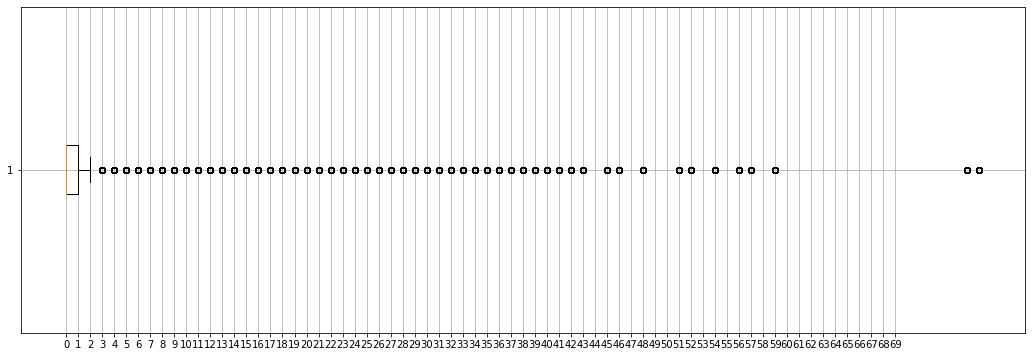

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


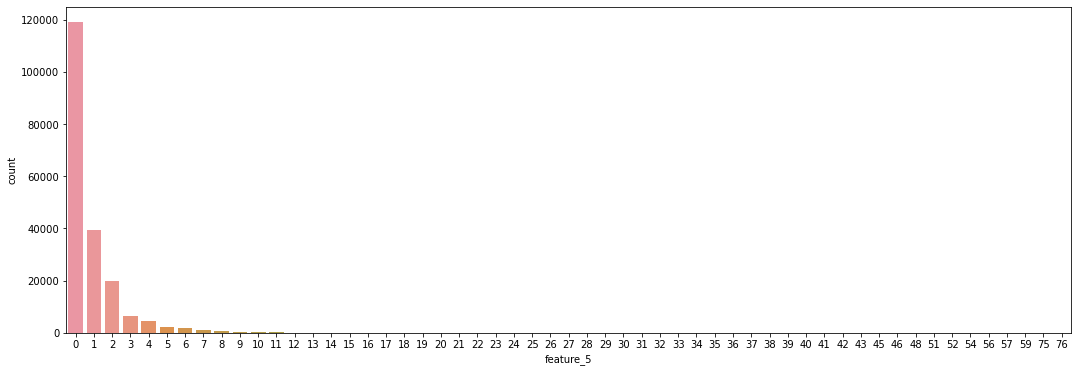

-------------------------------------------------------------------------------------------------------------------
0     150969
1      23209
2      11020
3       3731
4       2920
5       1318
6        691
7        267
8        238
9        248
10       318
11       304
12       423
13       344
14       372
15       278
16       222
17       241
18       195
19       165
20       115
21       146
22       103
23       112
24       127
25       122
26       119
27       107
28       101
29        96
30       132
31       110
32       111
33       107
34       101
35       168
37       175
38       140
41       168
43       167
Name: feature_6, dtype: int64


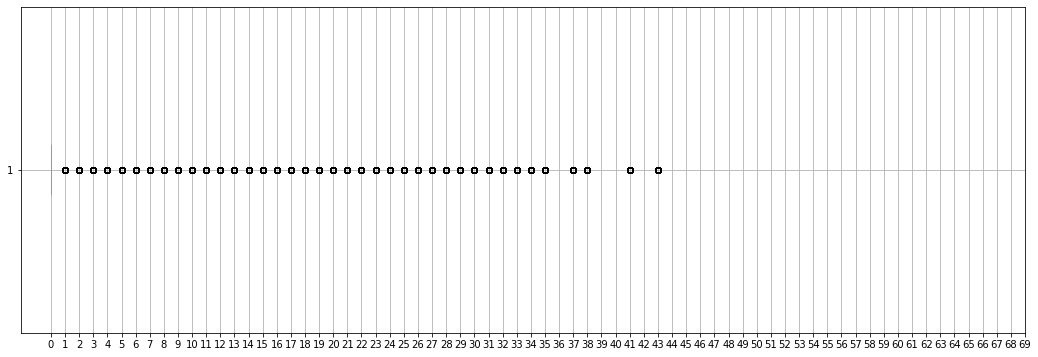

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


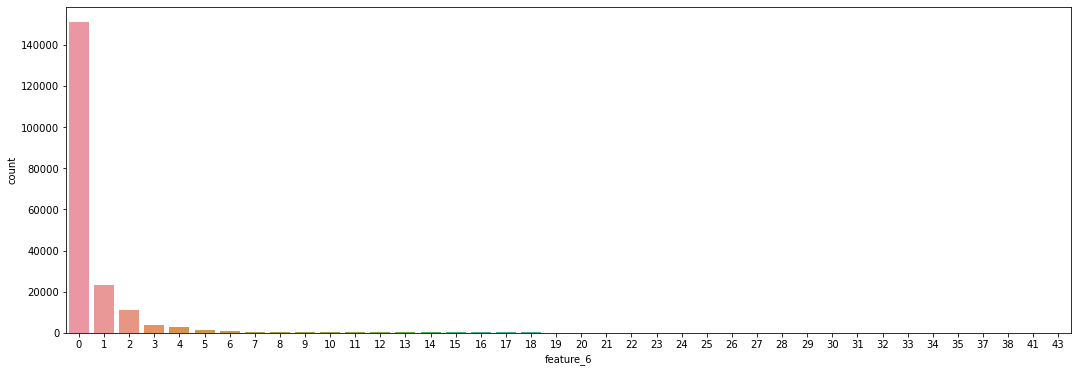

-------------------------------------------------------------------------------------------------------------------
0     150350
1      25994
2      11051
3       4018
4       2742
5       1106
6        987
7        528
8        341
9        449
10       243
11       239
12       230
13       172
14       161
15       124
16       133
17       144
18       105
19       132
20       120
22       114
24       124
25       146
26       126
30       121
Name: feature_7, dtype: int64


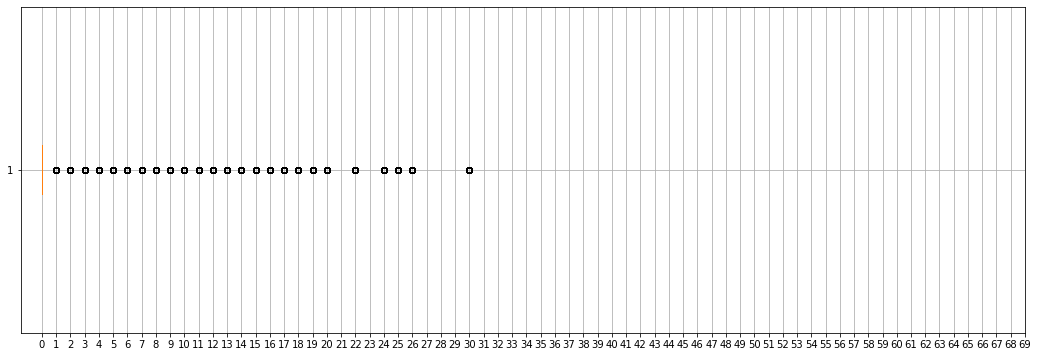

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


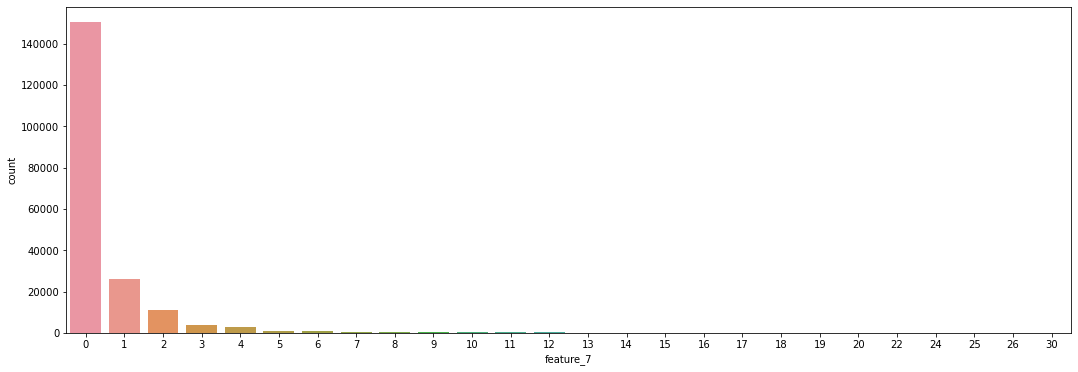

-------------------------------------------------------------------------------------------------------------------
0     117000
1      29111
2      12811
3       6792
4       3964
5       2888
6       3402
7       4175
8       4134
9       4012
10      3313
11      2022
12      1318
13       787
14       649
15       404
16       592
17       342
18       293
19       322
20       255
21       238
22       236
23       202
24       156
25       169
26       189
38       224
Name: feature_8, dtype: int64


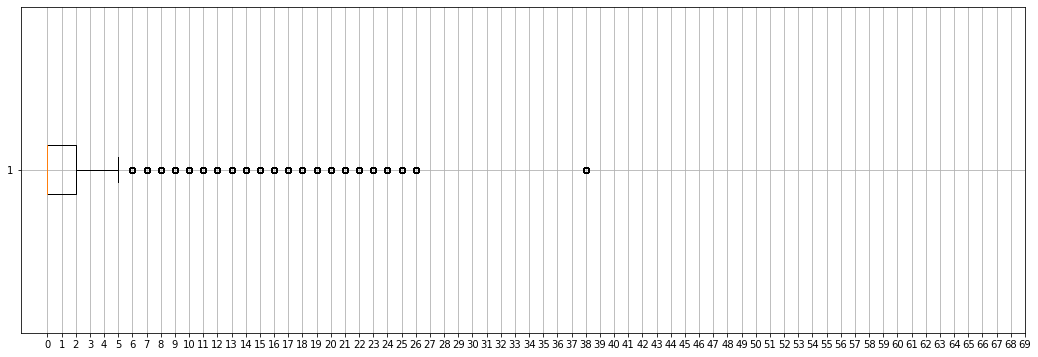

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


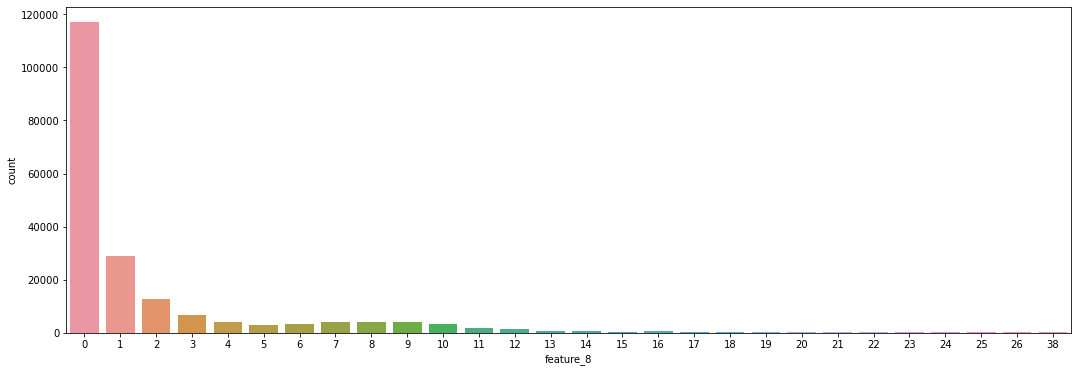

-------------------------------------------------------------------------------------------------------------------
0     124466
1      34824
2      18033
3       4943
4       2818
5       2032
6       1285
7        434
8        344
9        290
10      2724
11      2123
12      1048
13       511
14       105
15        71
16        56
17        82
18        76
19       272
20        87
21        84
22       116
23        74
24        70
25        68
26        87
27       151
28       133
29       132
30        37
31        93
33        72
35       117
36       145
37       109
38       136
39       159
40        73
41       129
44       138
45       144
47        94
48       113
49       115
50        95
51       159
55       115
60       125
68       159
72       134
Name: feature_9, dtype: int64


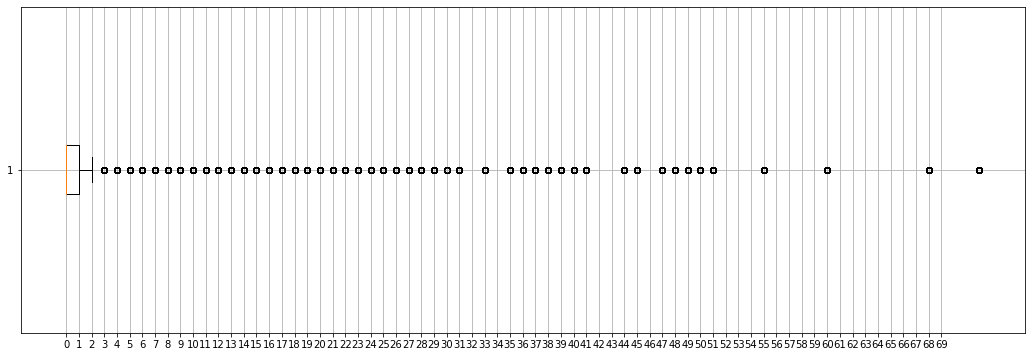

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


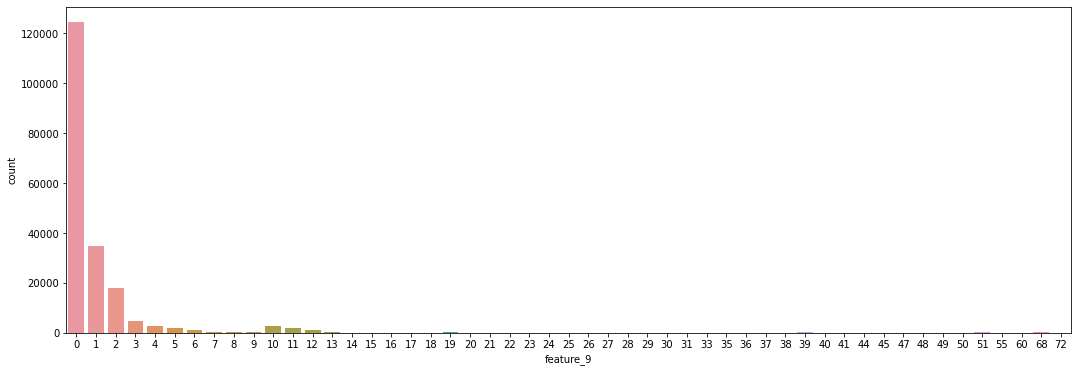

-------------------------------------------------------------------------------------------------------------------
0     110818
1      40550
2      17806
3       9244
4       6130
5       3192
6       2927
7       1991
8       1284
9        992
10       711
11       568
12       363
13       332
14       319
15       263
16       222
17       195
18       174
19       147
20       126
21       178
22       150
23       159
24       152
25       102
26       144
27       157
28       124
30       112
32       168
33       200
Name: feature_10, dtype: int64


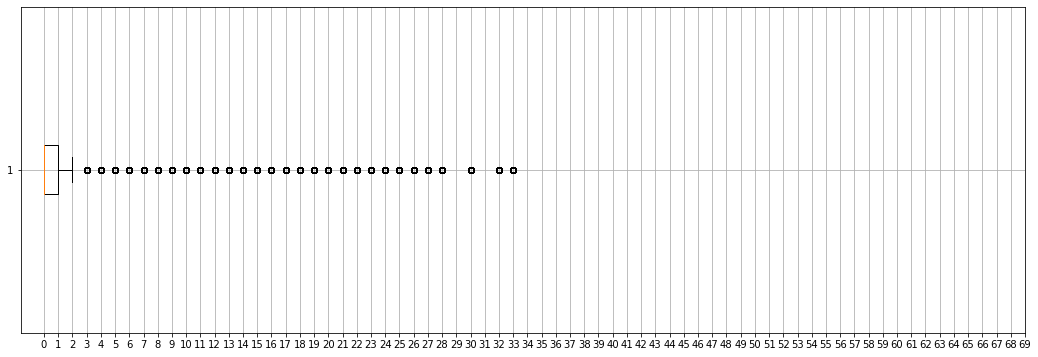

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


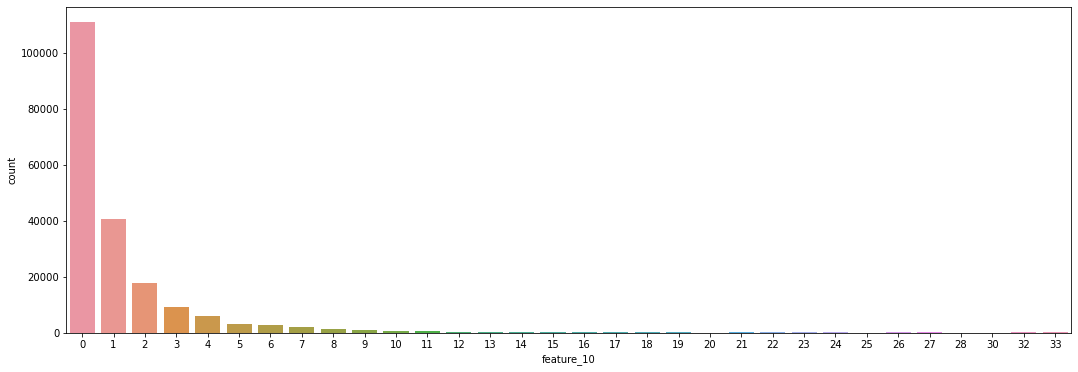

-------------------------------------------------------------------------------------------------------------------
0     152891
1      23394
2       9890
3       3919
4       2213
5        886
6        462
7        336
8        412
9        161
10       162
11       175
12       248
13       177
14       246
15       298
16       249
17       280
18       297
19       311
20       276
21       317
22       256
23       305
24       215
25       164
26       136
27       116
28       125
29       126
30       124
31       132
32       118
33       132
34       126
36       171
46       154
Name: feature_11, dtype: int64


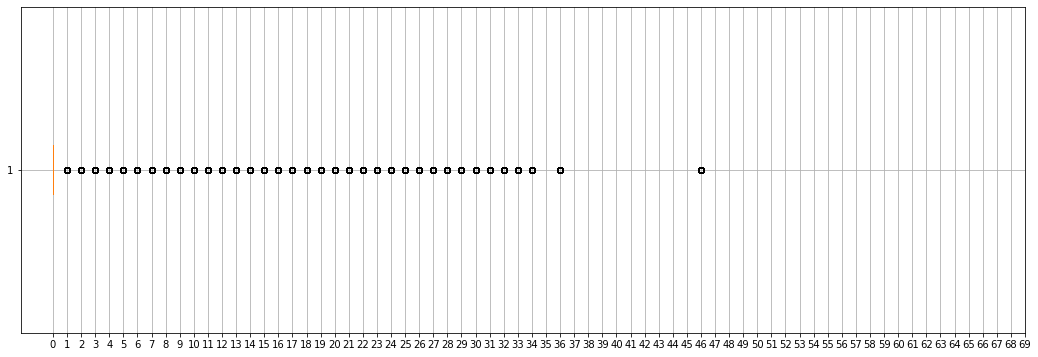

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


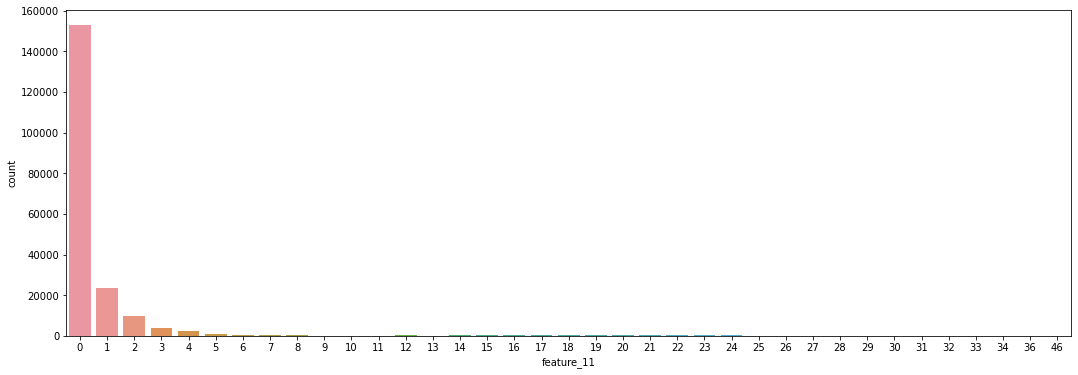

-------------------------------------------------------------------------------------------------------------------
0     67826
1     36101
2     27230
3     19565
4     14864
5      9094
6      7206
7      4301
8      3798
9      2506
10     1931
11     1246
12      922
13     1014
14      224
15      210
16      144
17      175
18      175
19      186
20      128
21      138
22      166
23      132
25      186
26      132
27      205
37      195
Name: feature_12, dtype: int64


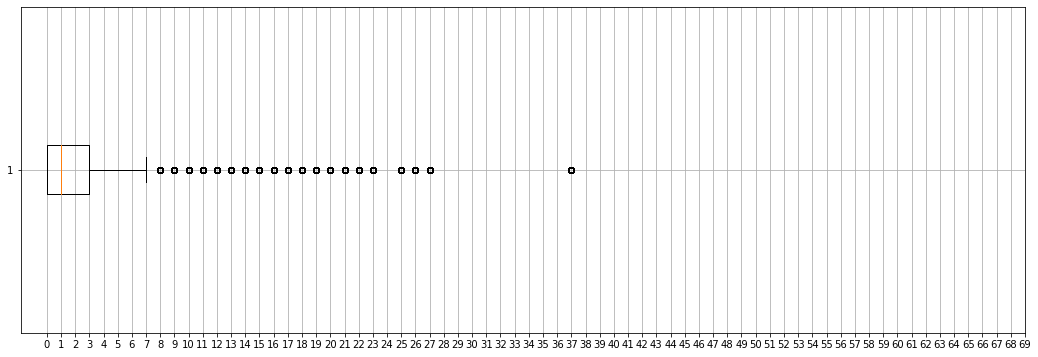

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


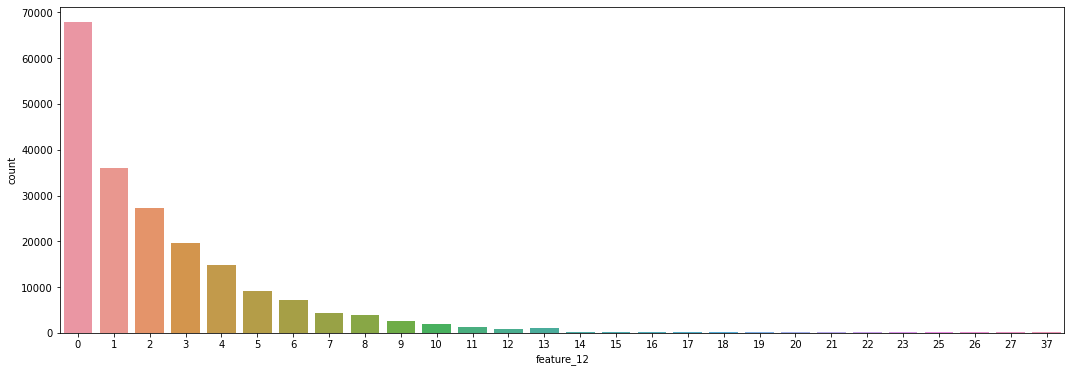

-------------------------------------------------------------------------------------------------------------------
0     136016
1      32795
2      12881
3       5673
4       3557
5       1985
6       1194
7        672
8        848
9        401
10       310
11       311
12       170
13        98
14       127
15       131
16       110
17        81
18        88
19       145
20       116
21       123
22       116
23        87
24       117
25       130
26       119
27       112
28       136
29       100
30       138
31        85
32       150
33       119
34       135
35       101
36       137
37       119
41       105
43       162
Name: feature_13, dtype: int64


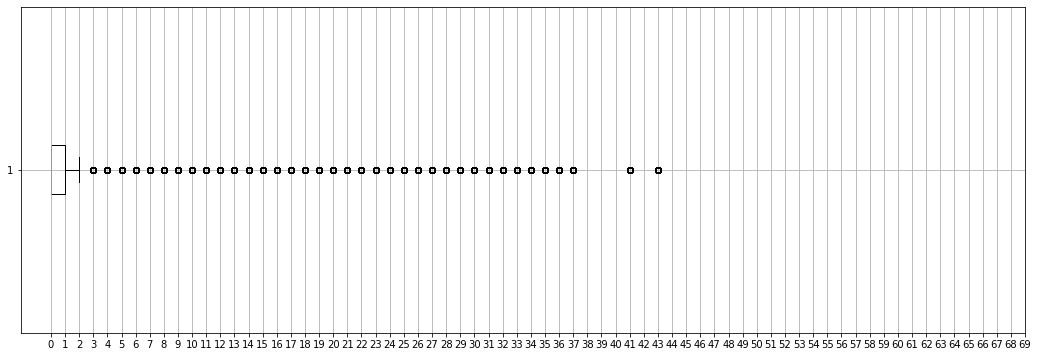

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


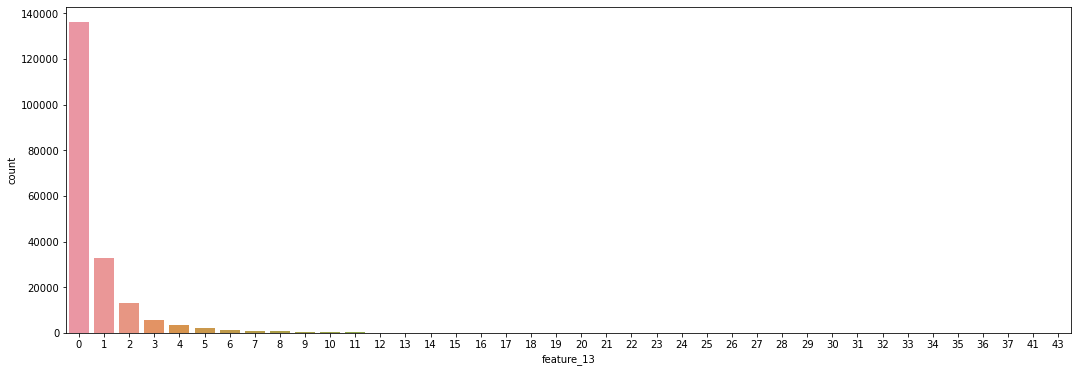

-------------------------------------------------------------------------------------------------------------------
0     104641
1      36322
2      25008
3      12444
4       7403
5       4160
6       2648
7       2033
8       1167
9        435
10       931
11       229
12       369
13       111
14       134
15       103
16       137
17       134
18       199
19       108
20        88
21       117
22       172
23       119
24       148
25       137
27       100
29       123
30       165
32       115
Name: feature_14, dtype: int64


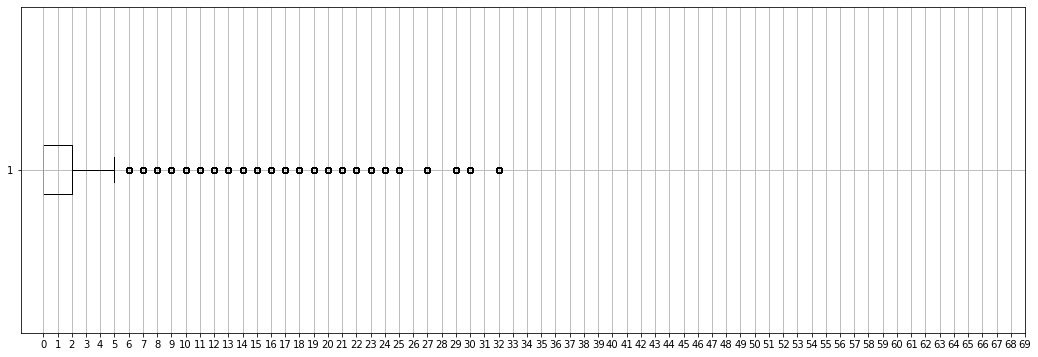

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


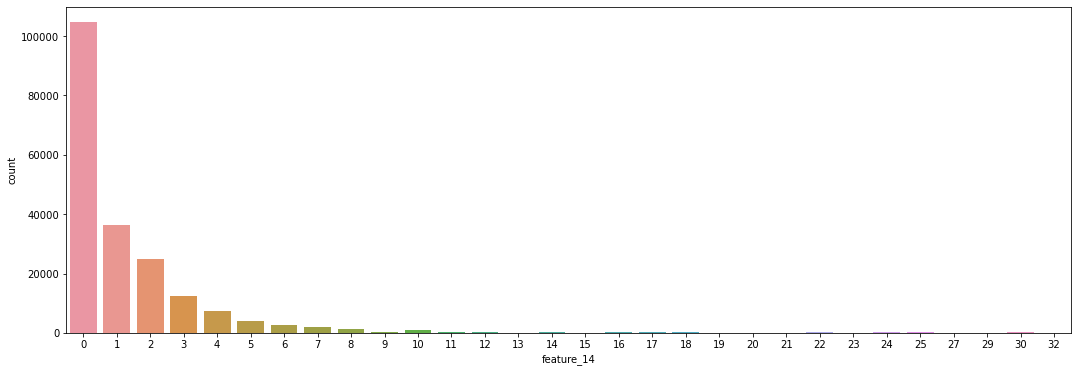

-------------------------------------------------------------------------------------------------------------------
0      161196
1       18477
2        8386
3        2815
4        2009
        ...  
105         3
110         5
114        72
116         2
121        10
Name: feature_15, Length: 105, dtype: int64


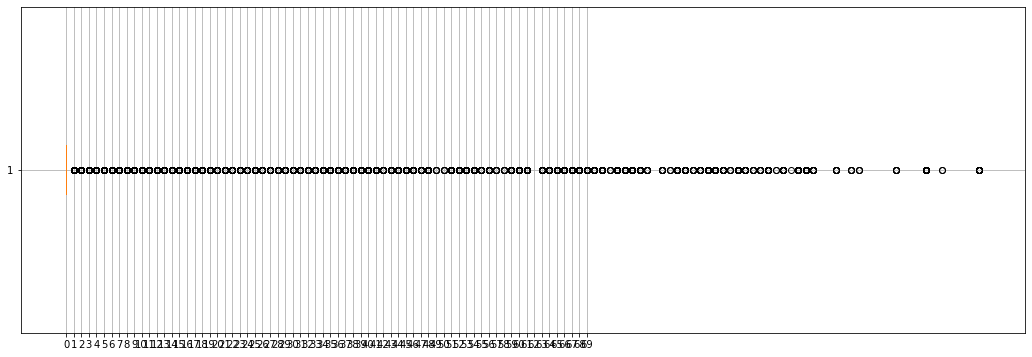

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


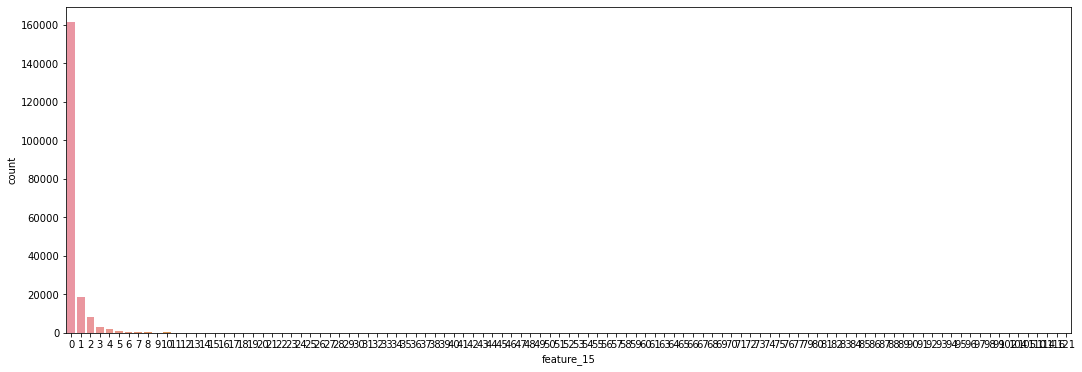

-------------------------------------------------------------------------------------------------------------------
0     120494
1      30828
2      16489
3       7936
4       6126
5       4215
6       2972
7       2472
8       1702
9       1201
10      1014
11       664
12       650
13       458
14       319
15       341
16       229
17       228
18       187
19       234
20       157
21       193
22       178
23       152
24       159
26       216
27       186
Name: feature_16, dtype: int64


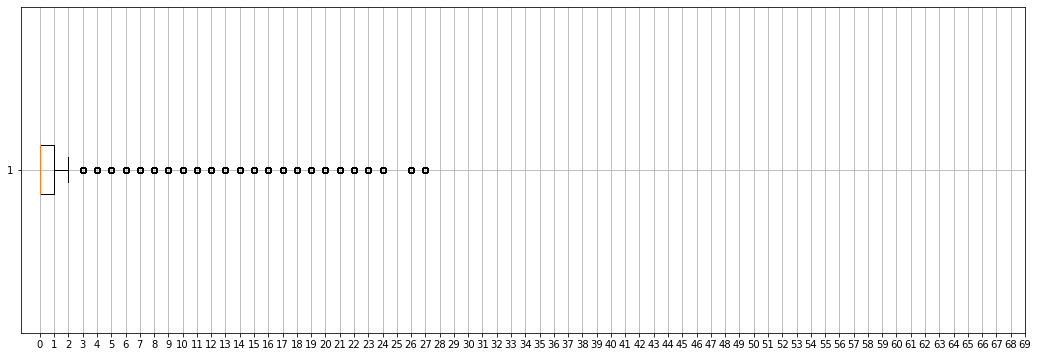

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


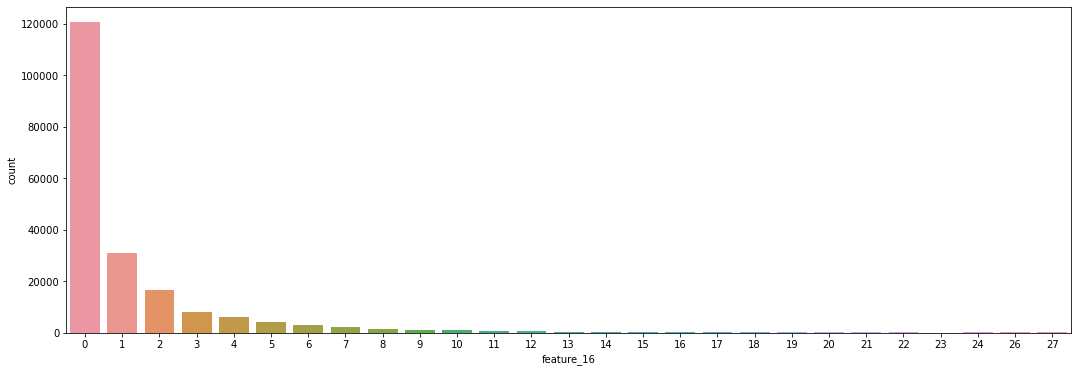

-------------------------------------------------------------------------------------------------------------------
0     169538
1      15760
2       8060
3       2729
4       1597
5        702
6        660
7        183
8        127
9        133
10        97
11       101
12       125
13        84
14       104
Name: feature_17, dtype: int64


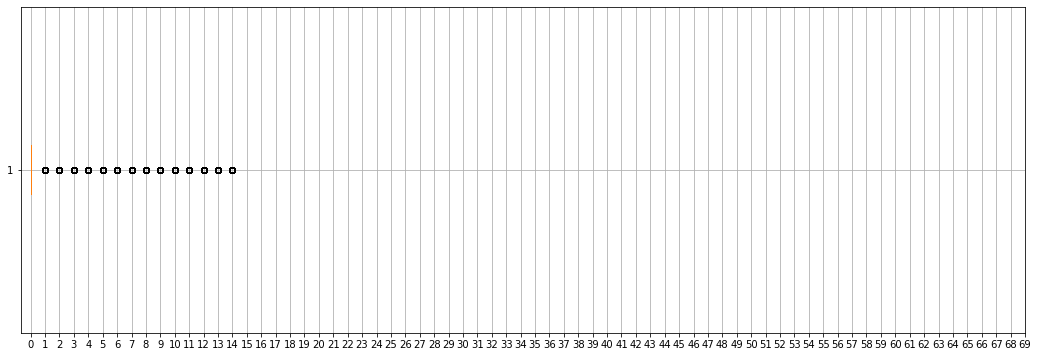

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


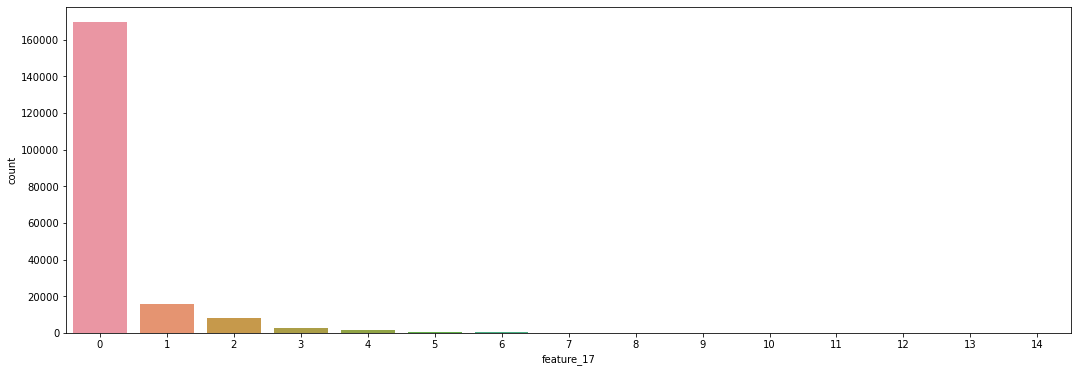

-------------------------------------------------------------------------------------------------------------------
0     89011
1     38787
2     26977
3     14349
4     11363
5      6222
6      4044
7      2411
8      1959
9       977
10      810
11      396
12      437
13      783
14      216
15      277
16      185
17      184
18      225
20      172
22      215
Name: feature_18, dtype: int64


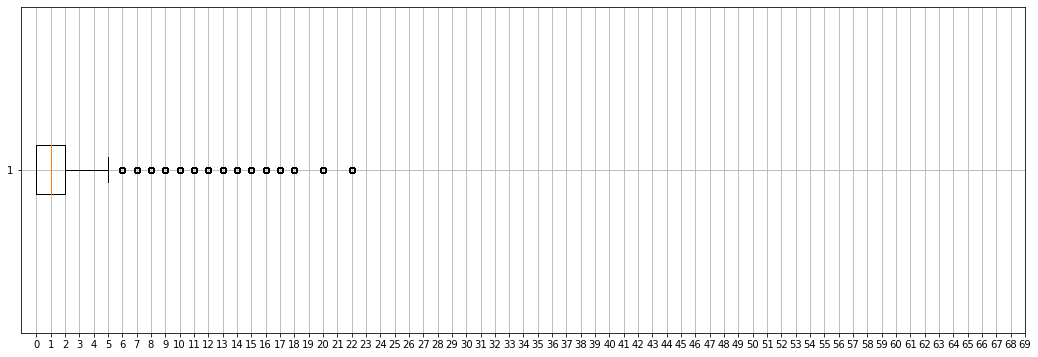

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


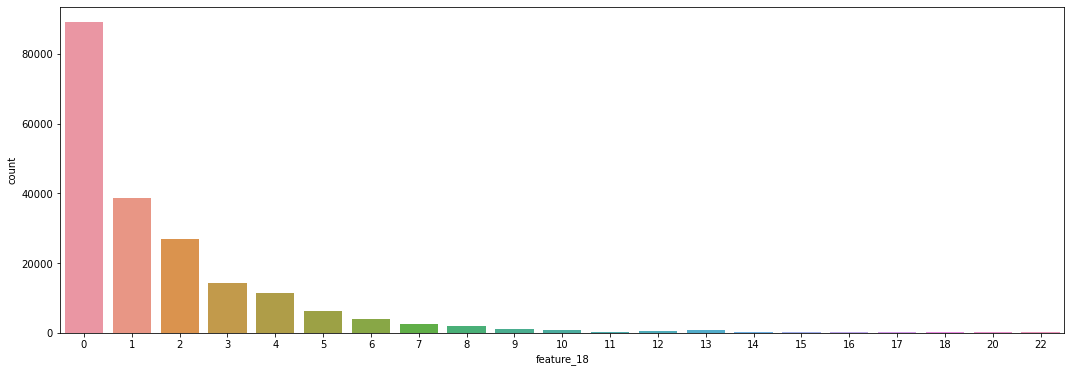

-------------------------------------------------------------------------------------------------------------------
0      57949
1      23481
2      21150
3      15230
4      12735
       ...  
94       177
109      176
137      169
158      194
263      179
Name: feature_19, Length: 66, dtype: int64


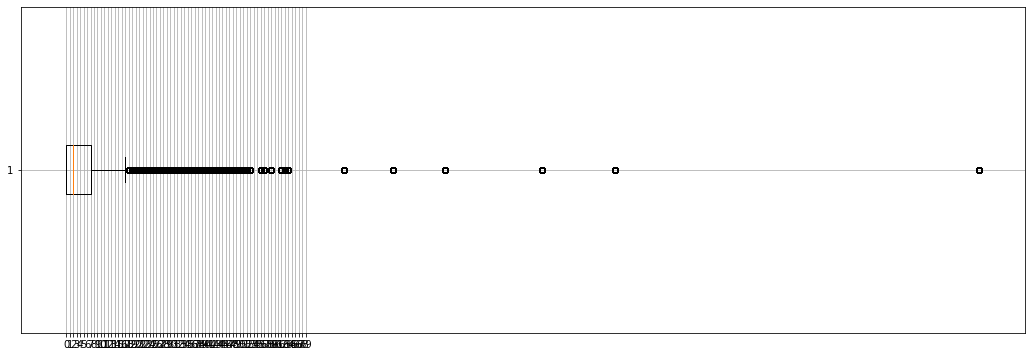

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


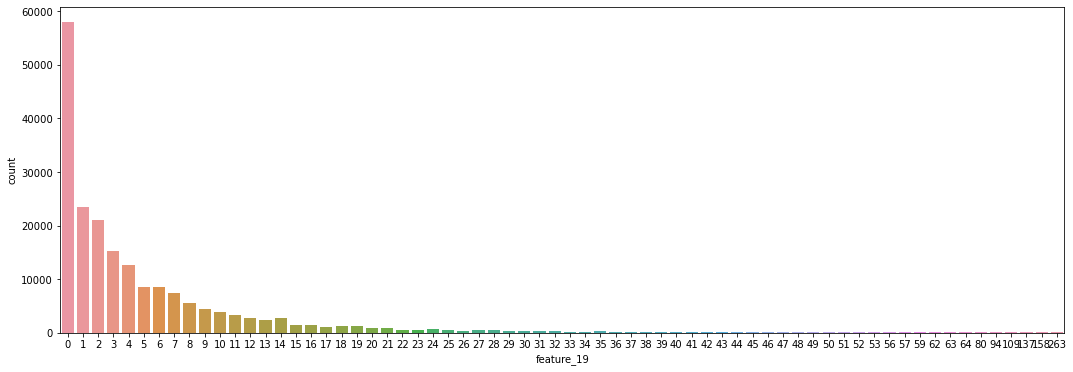

-------------------------------------------------------------------------------------------------------------------
0     93250
1     49994
2     21329
3     11971
4      7599
5      5728
6      3179
7      1882
8      1296
9       751
10      610
11      317
12      204
13      196
14      175
15       99
16      122
17      112
18      103
19       82
20      117
21       83
22      152
23       87
26      151
27      150
28      147
30      114
Name: feature_20, dtype: int64


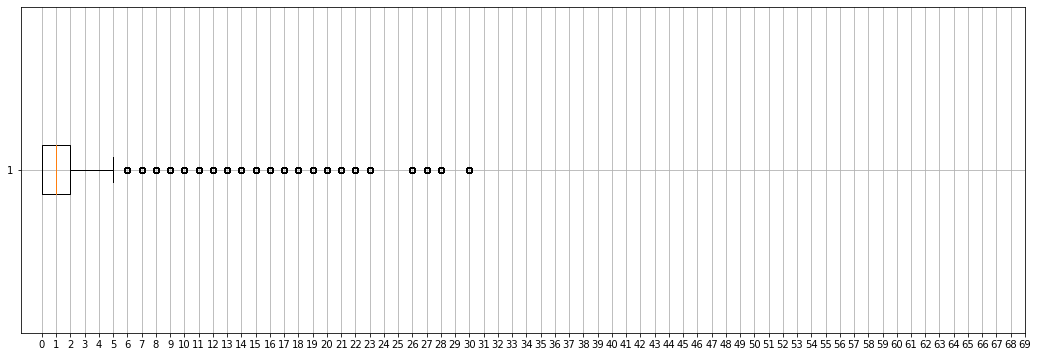

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


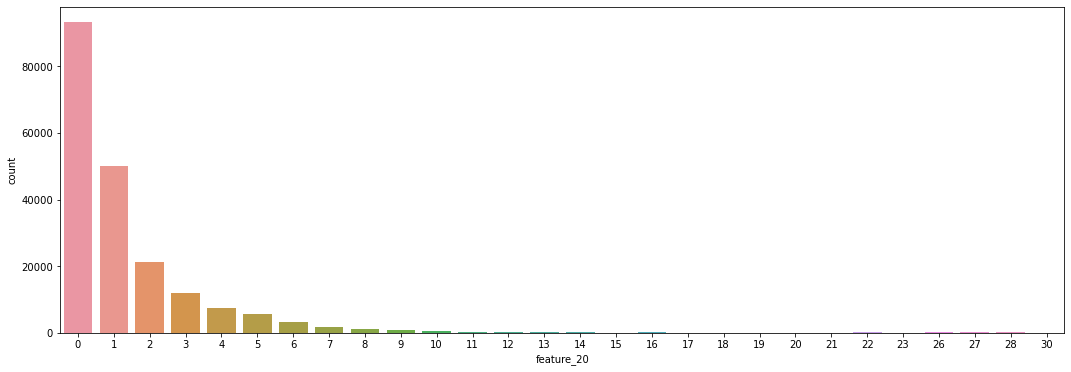

-------------------------------------------------------------------------------------------------------------------
0     138643
1      26177
2      13023
3       6192
4       4423
5       2565
6       1910
7       1144
8       1397
9        617
10       733
11       399
12       217
13       222
14       207
15       144
16       138
17       140
18       124
19       102
20       141
21       138
22       143
23       110
24       118
25       139
26       121
27       138
28       152
30       141
33       142
Name: feature_21, dtype: int64


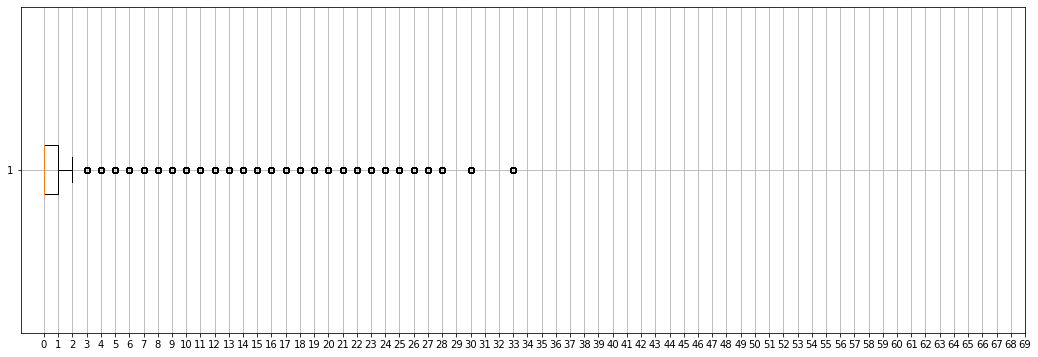

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


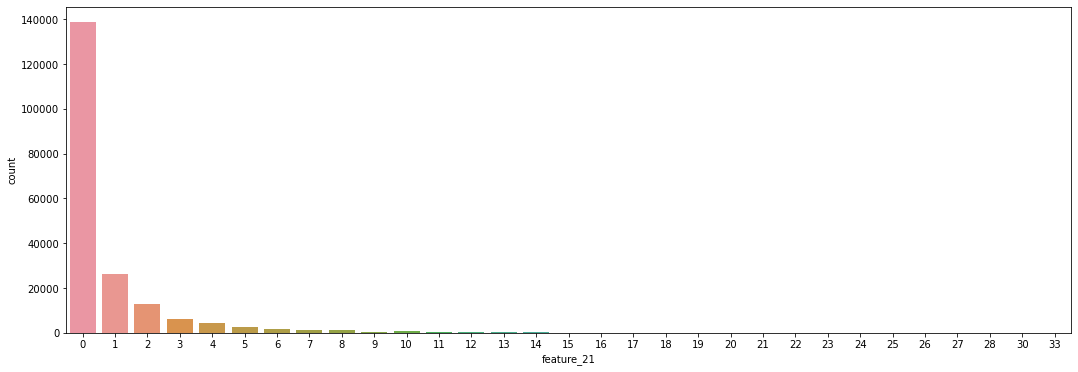

-------------------------------------------------------------------------------------------------------------------
0      163022
1        9917
2        6450
3        4136
4        2638
5        1958
6        1473
7        1264
8        1119
9         746
10        793
11        577
12        672
13        286
14        332
15        150
16        239
17        132
18        126
19        101
20        249
21         95
22        103
23        102
24         96
25        108
26         76
27         81
28        109
29         81
30         90
31         90
32         99
33         95
34         98
35         78
36        109
37        101
38         98
39         93
40        117
41        116
42        118
43        119
44        119
45        132
47        104
48        140
49        113
50        132
52        125
53        112
58        134
108       117
123       120
Name: feature_22, dtype: int64


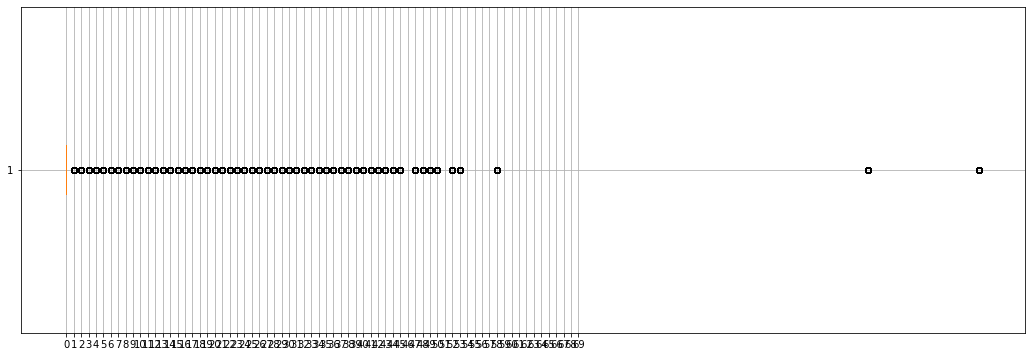

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


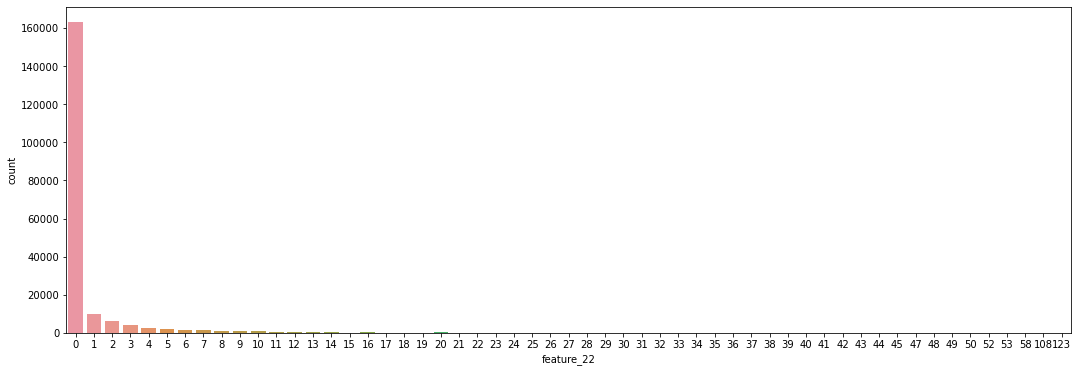

-------------------------------------------------------------------------------------------------------------------
0     152349
1      23697
2      11607
3       4375
4       3545
5        940
6       1061
7        392
8        385
9        229
10       211
11       127
12       120
13       111
14       115
15       131
16       116
17       122
18       118
20       132
22       117
Name: feature_23, dtype: int64


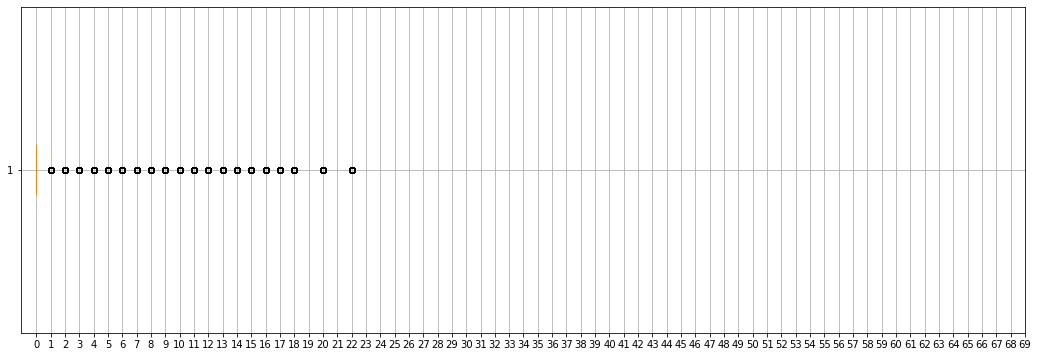

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


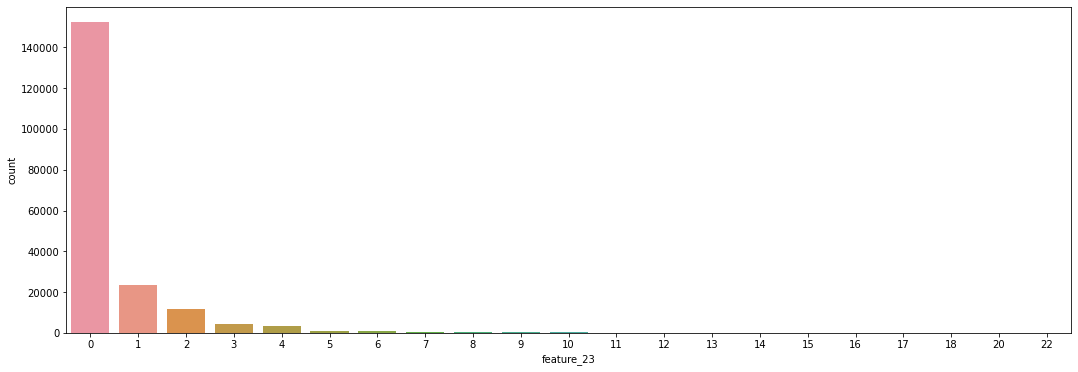

-------------------------------------------------------------------------------------------------------------------
0     151590
1      27410
2      10371
3       3597
4       1557
5        501
6        737
7        302
8        297
9        234
10        90
11       178
12        52
13        99
14        68
15        69
16        50
17        72
18        54
21       104
22        88
23       103
25        46
26        52
27        37
28        44
29        39
30        37
31        85
32        55
33        62
34        58
35       125
38       114
43       118
44       152
47        55
49       117
50       124
54       122
57        77
58        59
62       109
63       106
64        68
65        76
66        95
67        79
68       120
69       146
Name: feature_24, dtype: int64


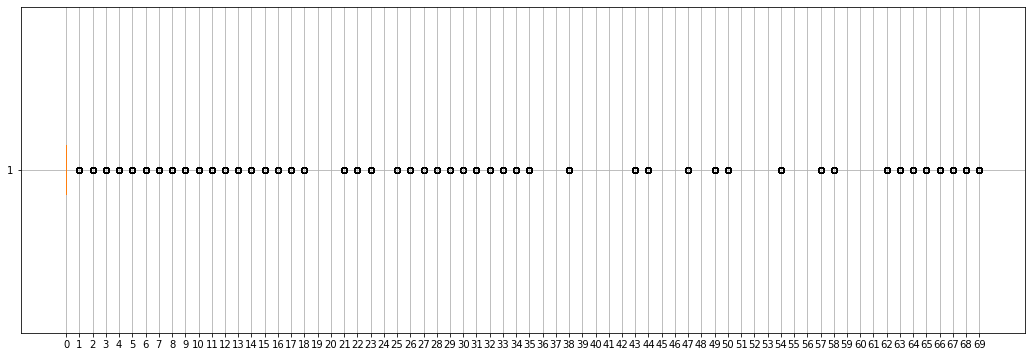

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


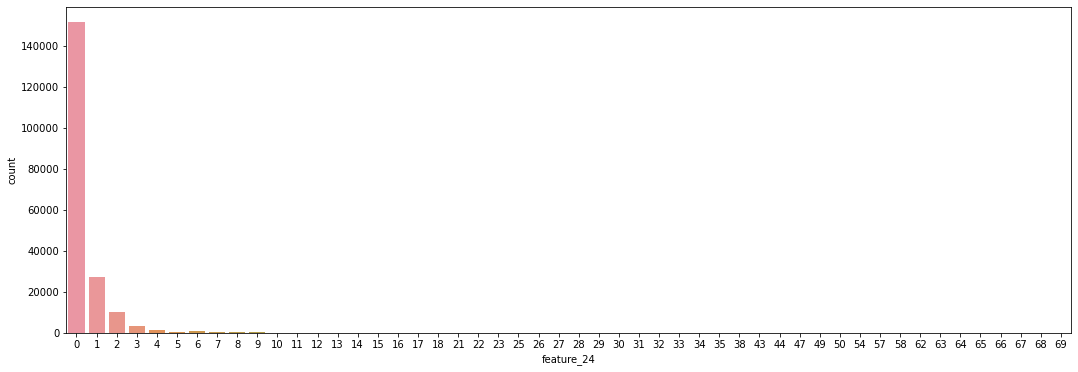

-------------------------------------------------------------------------------------------------------------------
0      107313
1       25782
2       18414
3       11486
4        7280
5        6548
6        5933
7        4946
8        2716
9        1793
10       1868
11        869
12       1107
13        343
14        185
15        274
16        105
17        110
18         81
19         97
20        115
21        115
28        110
29        141
30        144
31        141
34        139
35        150
36        114
41        160
44        119
52        164
53        154
56        151
59        114
65        145
71        155
76        135
91        140
149       144
Name: feature_25, dtype: int64


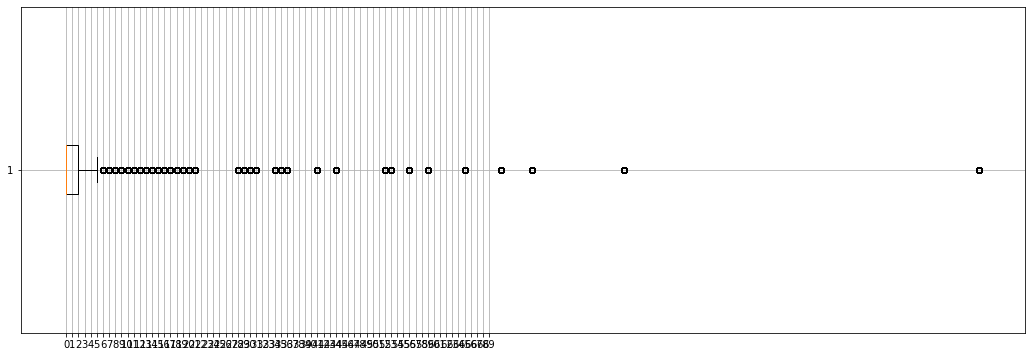

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


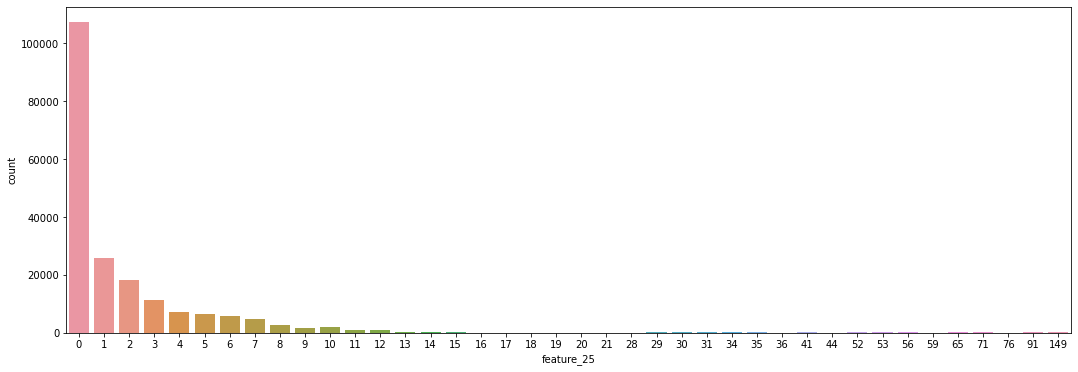

-------------------------------------------------------------------------------------------------------------------
0     127772
1      38176
2      17460
3       7557
4       4066
5       1624
6        868
7        560
8        284
9        260
10       330
11       156
12        73
13        96
15        98
16       107
17       123
19       129
23       121
24       140
Name: feature_26, dtype: int64


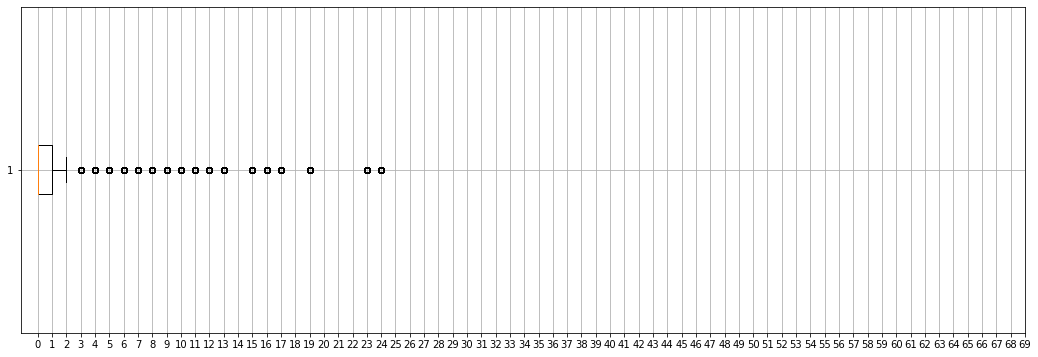

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


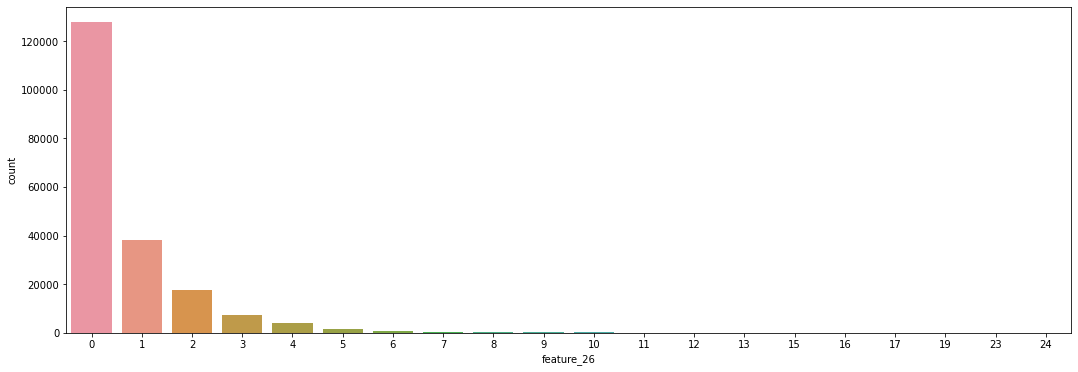

-------------------------------------------------------------------------------------------------------------------
0     142061
1      34264
2      13270
3       4297
4       2071
5        778
6        786
7        269
8        182
9         43
10        40
11        47
12        32
13        35
14        47
15        23
16        28
17        47
18        43
19        29
20        55
21        29
22        46
23        46
24        39
25        45
26        31
27        50
28        29
29        54
30        46
31        38
32        46
33        68
34        70
35        53
36        72
37        78
38        59
39        58
40        65
41        80
42        77
43        78
44        78
46        31
47        60
48        96
84        31
Name: feature_27, dtype: int64


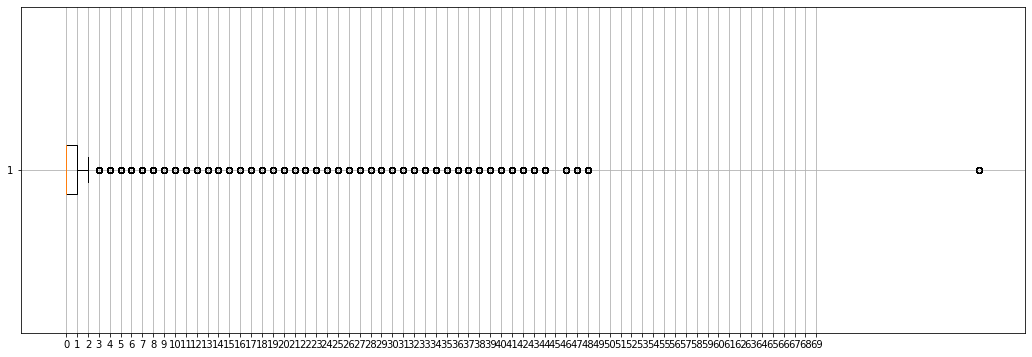

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


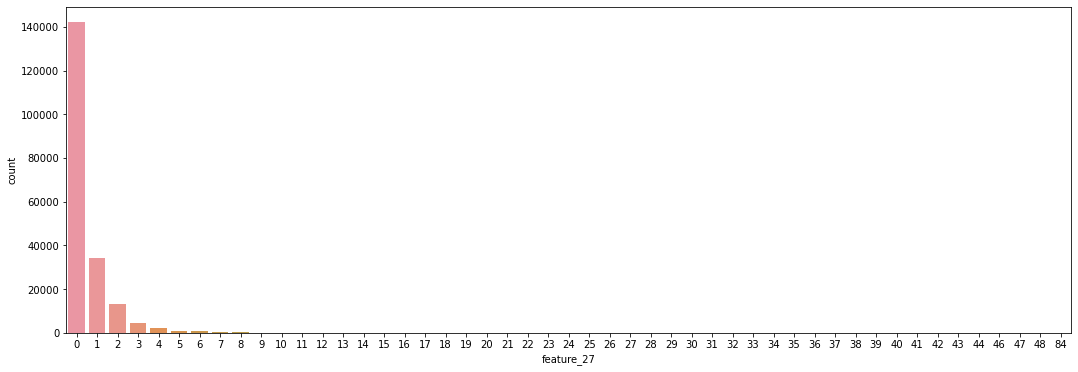

-------------------------------------------------------------------------------------------------------------------
0      122216
1       36125
2       14182
3        7568
4        4439
        ...  
90          4
92          4
96          7
100         4
105         5
Name: feature_28, Length: 78, dtype: int64


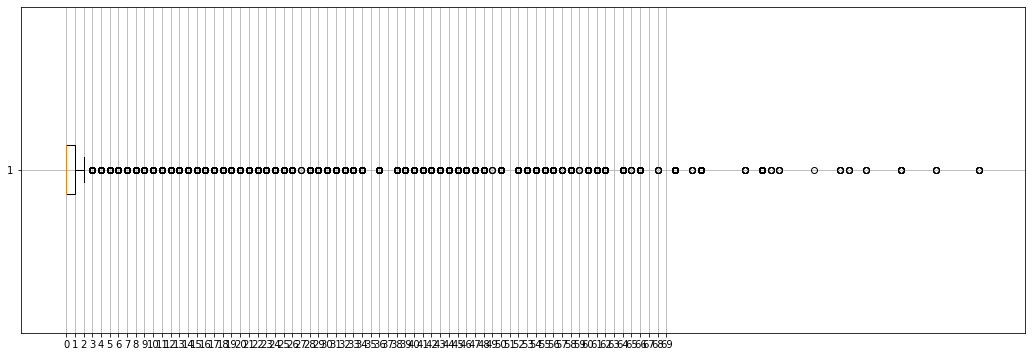

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


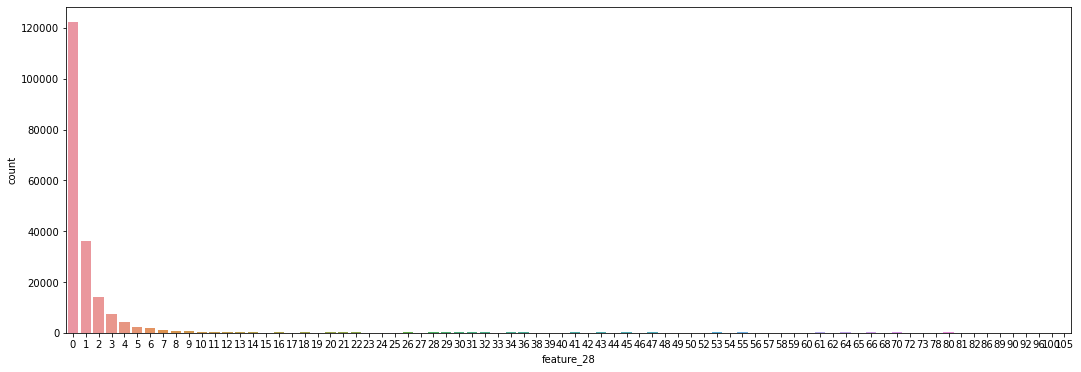

-------------------------------------------------------------------------------------------------------------------
0     124847
1      30514
2      19295
3       8518
4       4984
5       1992
6       1844
7       1085
8       1167
9        535
10       405
11       389
12       191
13       115
14        99
15       110
16       163
17        94
18        99
19        83
20       102
21       127
22        79
23        84
24        52
25        78
26        92
27        78
28        76
29       111
30        74
31        47
32       102
33       109
34       100
35       106
36       128
37       117
38        52
40        34
41       138
42       124
43        83
44        88
45       133
46       145
47       116
48        35
49       101
50       155
52        41
53       119
54       130
56       119
57       119
60        29
61        23
84        25
Name: feature_29, dtype: int64


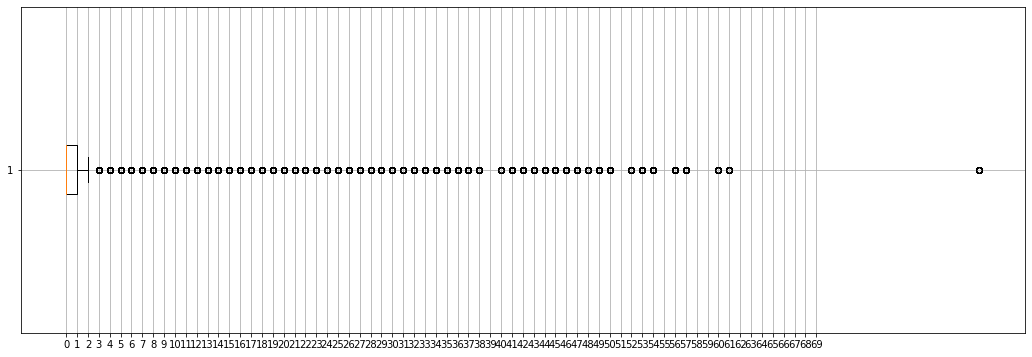

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


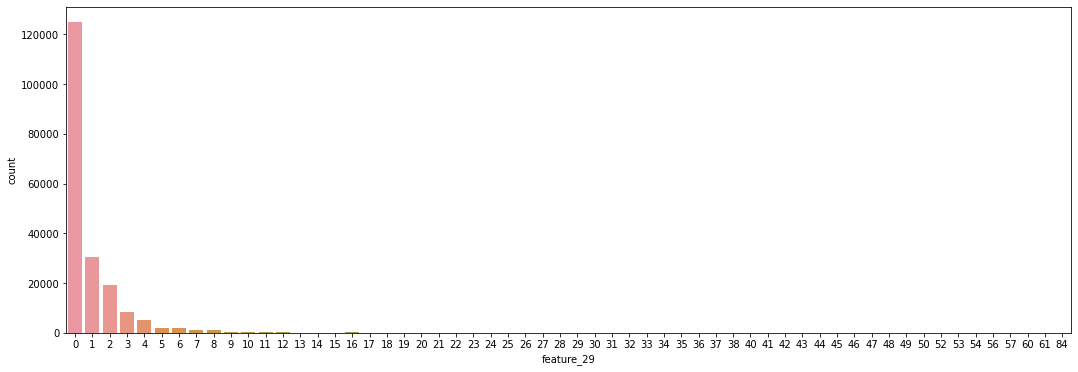

-------------------------------------------------------------------------------------------------------------------
0     134843
1      39947
2      14671
3       5182
4       2450
5       1063
6        575
7        156
8        173
9        111
10       108
11        96
12        98
14       106
17       106
18       106
20       107
22       102
Name: feature_30, dtype: int64


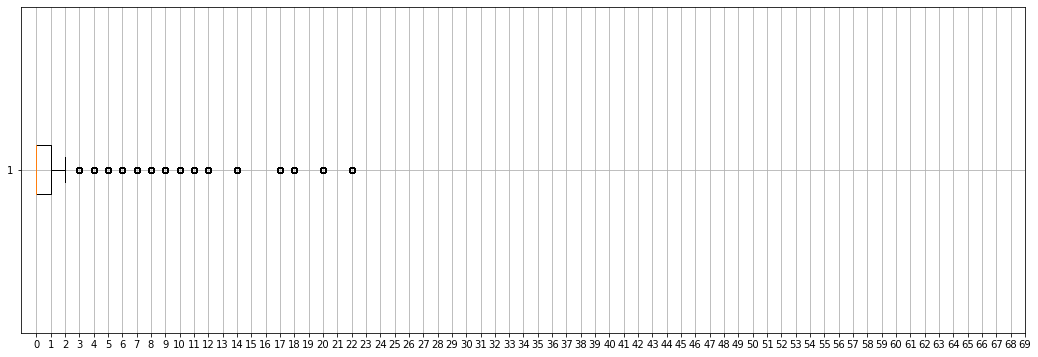

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


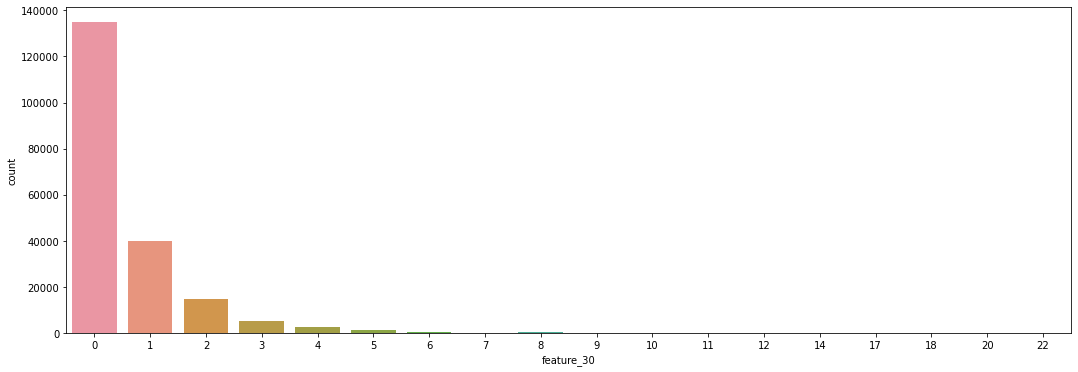

-------------------------------------------------------------------------------------------------------------------
0     97796
1     37518
2     19906
3     13546
4      9260
5      5495
6      4600
7      2302
8      2193
9      1081
10      958
11      589
12      782
13      344
14      386
15      260
16      176
17      201
18      174
19      149
20      119
21      112
22      132
23      124
24      138
25      189
26      128
27      141
28      128
29      120
30      130
34      178
35      177
36      193
38      120
39      155
Name: feature_31, dtype: int64


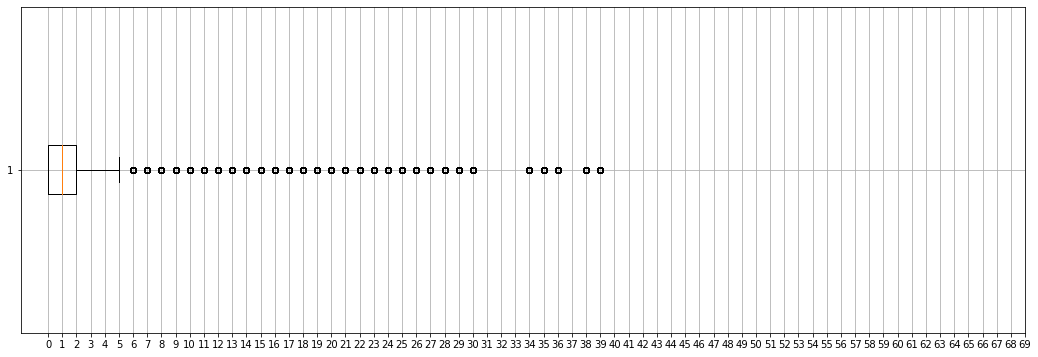

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


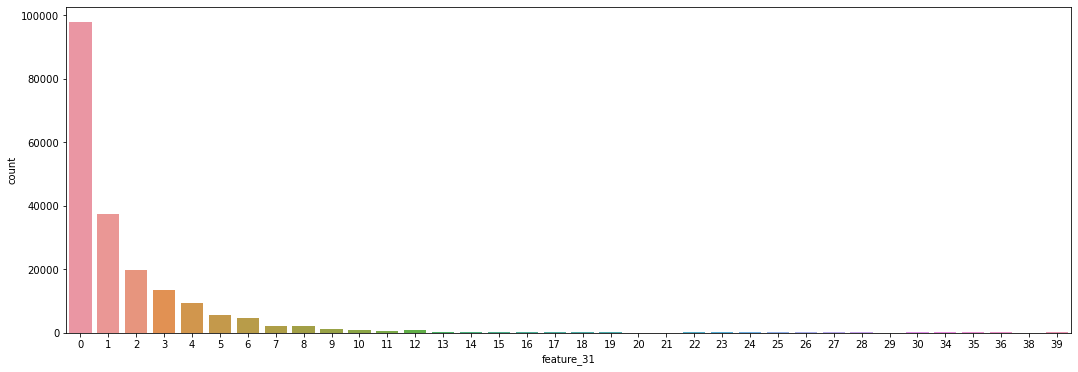

-------------------------------------------------------------------------------------------------------------------
0     155155
1      21445
2       9600
3       3704
4       2778
       ...  
74       124
75       110
76        32
77       105
78       116
Name: feature_32, Length: 77, dtype: int64


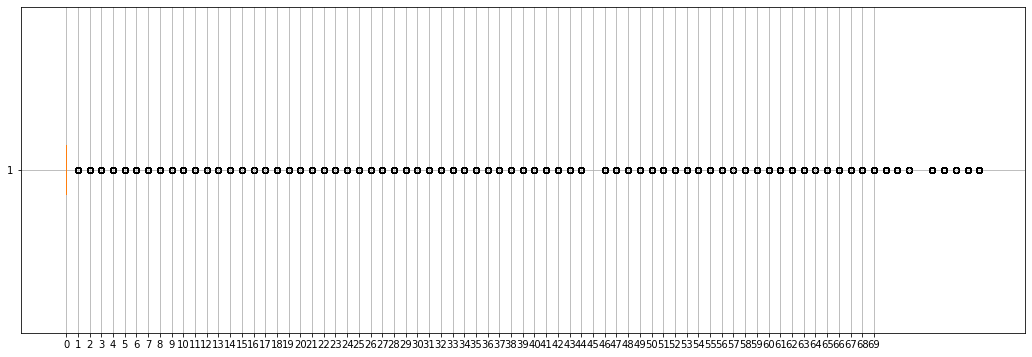

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


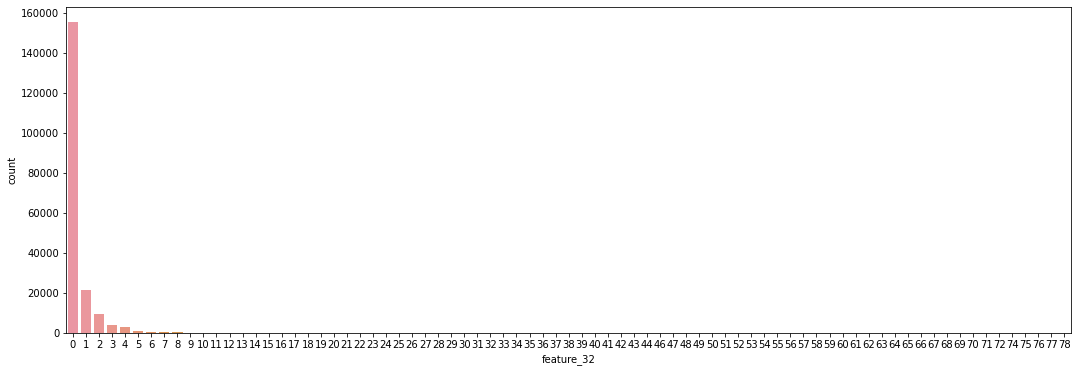

-------------------------------------------------------------------------------------------------------------------
0     102137
1      45891
2      20607
3      11104
4       5965
5       3609
6       2367
7       1379
8        981
9        779
10       624
11       414
12       351
13       303
14       178
15       253
16       160
17       161
18       180
19       130
20       115
21       120
22       105
23       114
24        88
25       117
26       101
27        96
28       123
29       107
30       108
31       114
32       101
33       121
34       109
35       116
36       136
37       121
38       134
39       125
41       156
Name: feature_33, dtype: int64


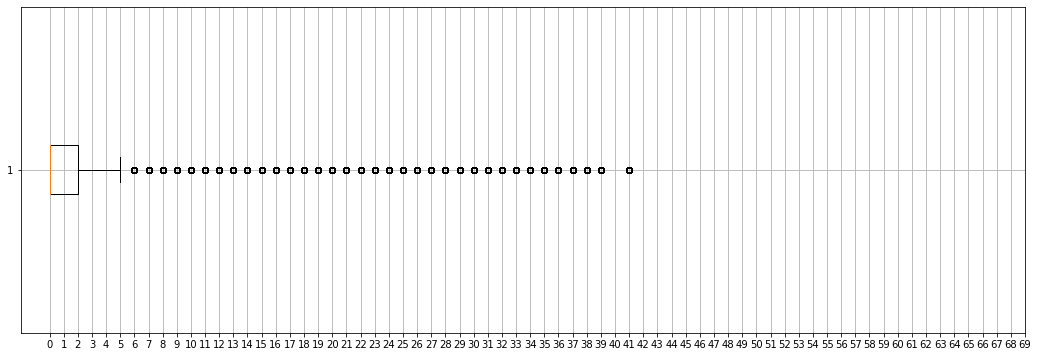

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


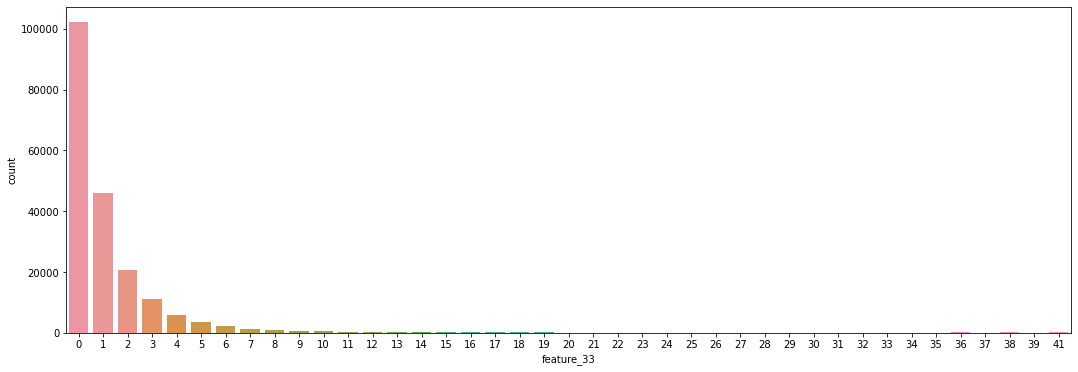

-------------------------------------------------------------------------------------------------------------------
0     138425
1      37825
2      13049
3       5248
4       1880
5        759
6        617
7        141
8        256
9         65
10        55
11        88
12        52
13        95
14        84
15        74
16        53
17        43
18        77
19        83
20        61
21        95
22        80
23        70
25        83
26        74
27        89
28       128
29       109
30       121
36       121
Name: feature_34, dtype: int64


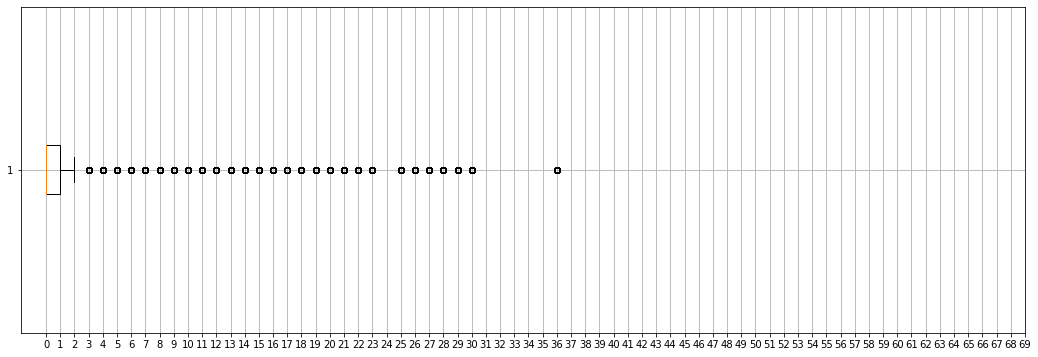

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


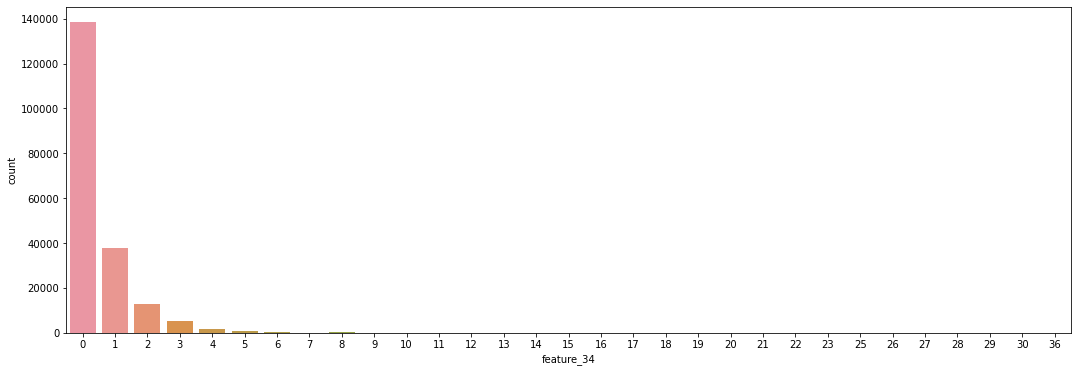

-------------------------------------------------------------------------------------------------------------------
0     123720
1      37776
2      16477
3       7554
4       3988
5       2426
6       2246
7       1079
8        710
9        510
10       323
11       181
12       235
13       202
14       127
15       100
16       112
17       113
18        94
19        68
20        75
21        87
22        78
23        64
24        85
25        82
26        81
27        88
28       116
29        92
30       147
31       148
32       120
33       125
34        79
35       106
36       149
37       111
41       126
Name: feature_35, dtype: int64


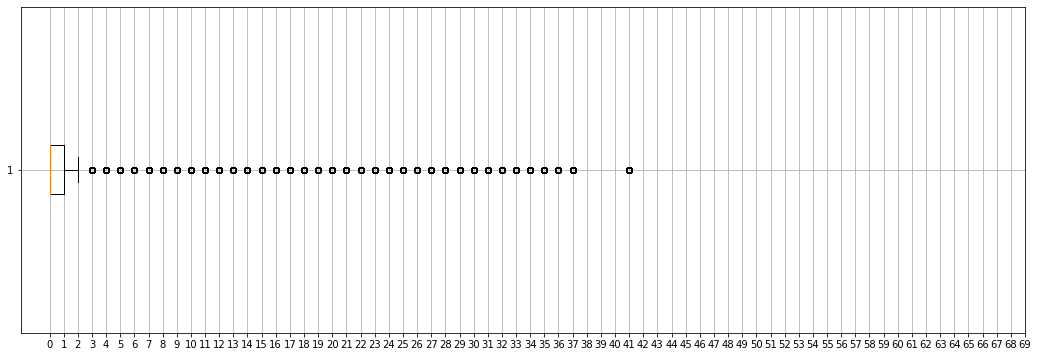

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


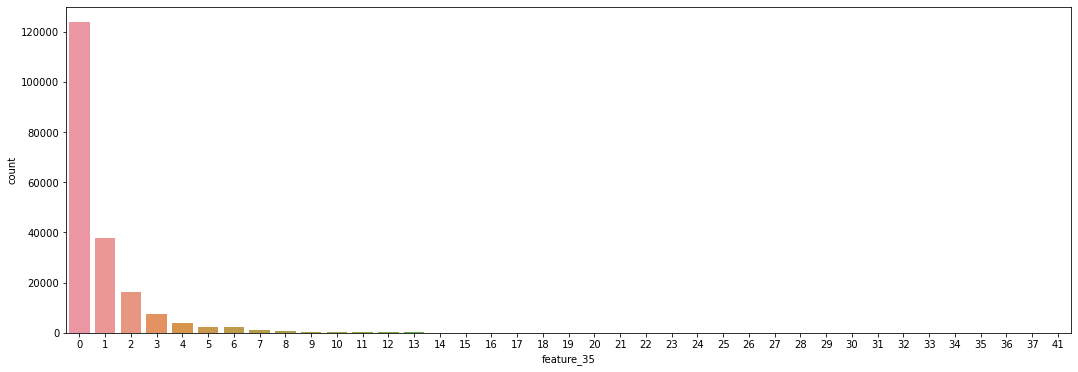

-------------------------------------------------------------------------------------------------------------------
0     159920
1      20421
2       8138
3       2437
4       2392
5       1359
6        900
7        370
8        489
9        354
10       407
11       305
12       263
13       219
14       202
15       112
16       154
17       145
18       137
19       148
20       149
21       136
22       136
23       127
24       130
26       146
28       140
42       164
Name: feature_36, dtype: int64


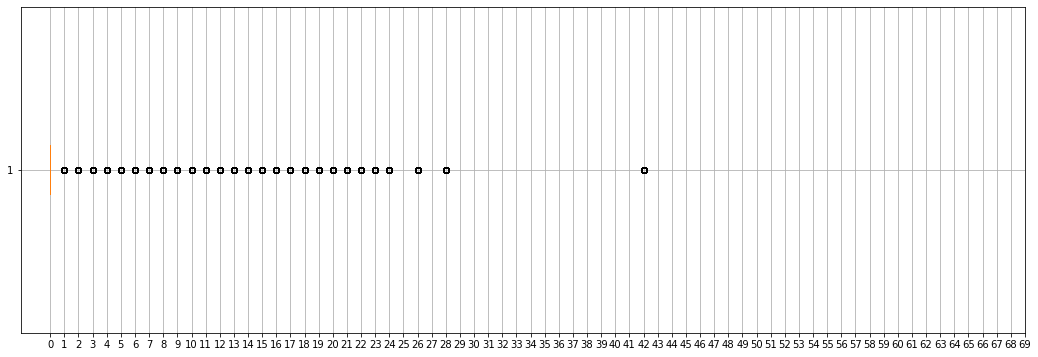

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


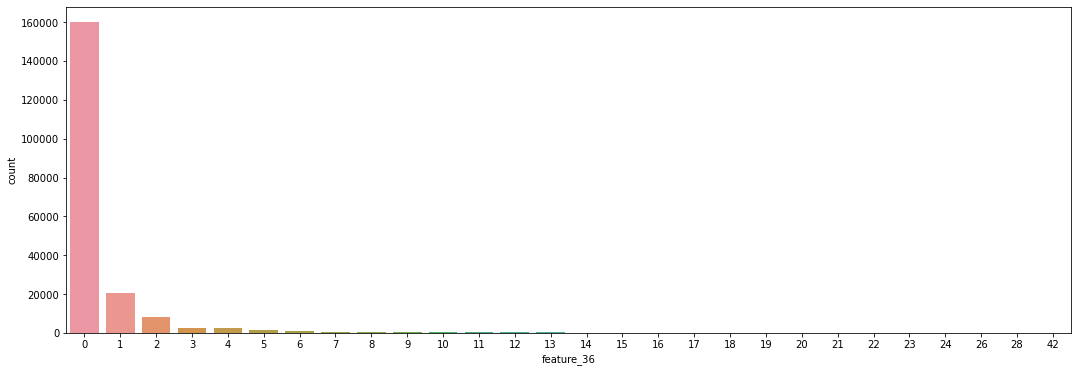

-------------------------------------------------------------------------------------------------------------------
0     102659
1      34860
2      26419
3      11472
4       8311
5       4251
6       3119
7       1728
8       1704
9        910
10       872
11       760
12       463
13       264
14       266
15       161
16       250
17       184
18       185
19       146
20       167
21       141
22       183
23       165
29       189
34       171
Name: feature_37, dtype: int64


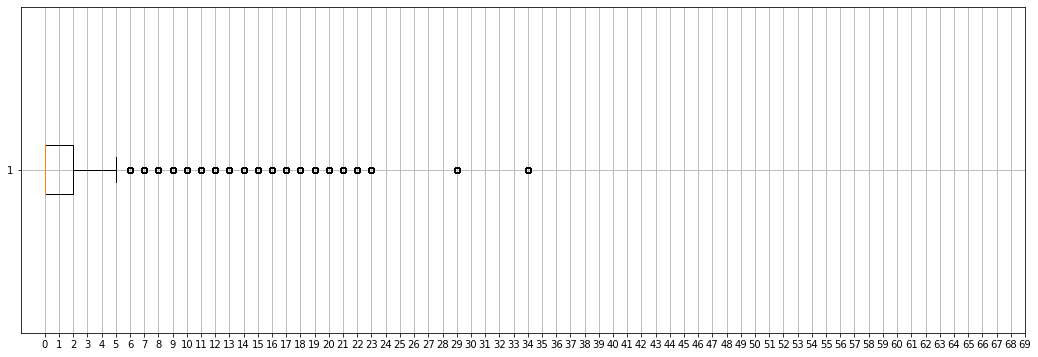

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


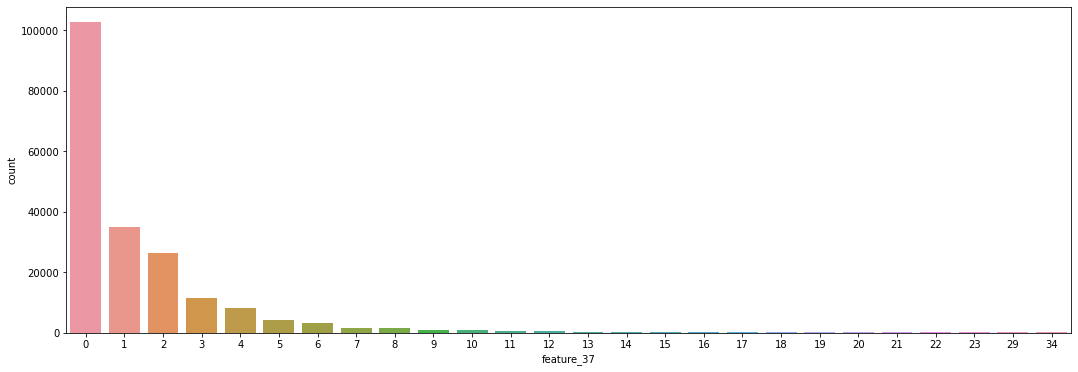

-------------------------------------------------------------------------------------------------------------------
0     151518
1      18149
2       8588
3       3467
4       3227
5       2123
6       2033
7       1328
8       1161
9        883
10      1074
11       600
12       651
13       492
14       356
15       251
16       329
17       260
18       247
19       239
20       204
21       148
22       167
23       132
24       145
25       179
26       142
27       153
28       189
29       165
30       180
31       169
32       150
33       127
34       135
35       147
36       177
40       135
41       180
Name: feature_38, dtype: int64


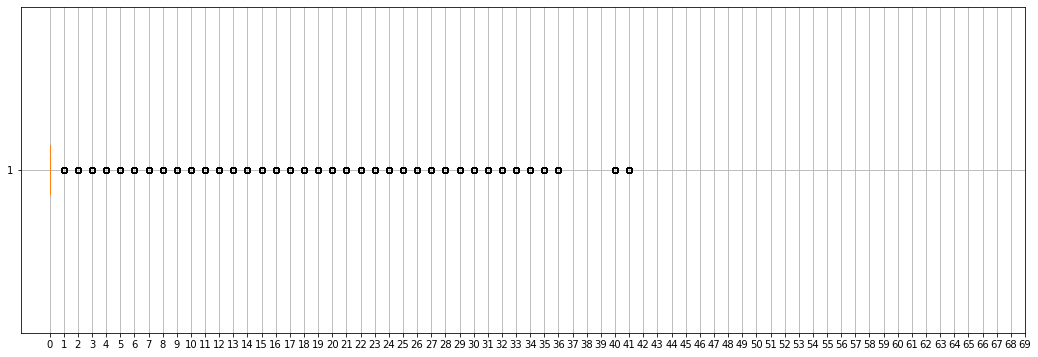

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


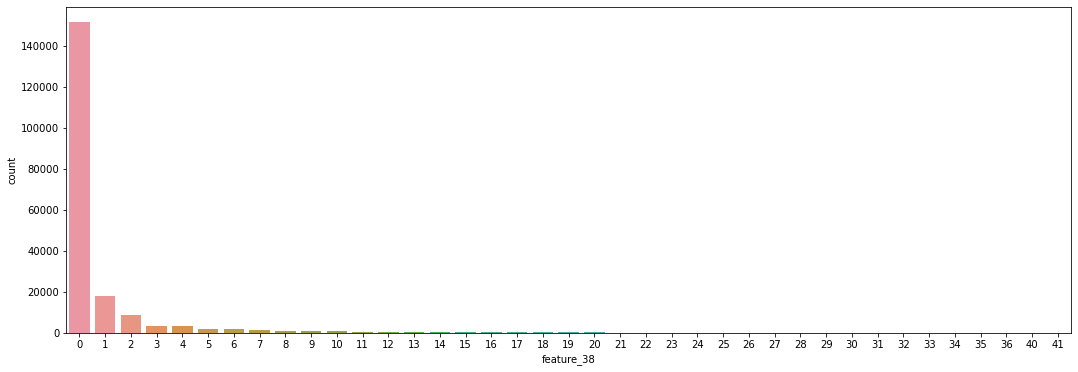

-------------------------------------------------------------------------------------------------------------------
0     79809
1     35087
2     26879
3     16329
4     11937
5      7523
6      6905
7      4353
8      3273
9      2432
10     1166
11      517
12      279
13      196
14      170
15      121
16      133
17       88
18       74
19       80
20       80
21       78
22       98
23      107
24       97
25      111
26      137
27       95
28      125
29       80
31      125
32      106
33       84
34       73
35      147
36       82
37       66
38       94
39       93
40       77
41       94
42       95
43      106
46      136
47       90
48      103
49       70
Name: feature_39, dtype: int64


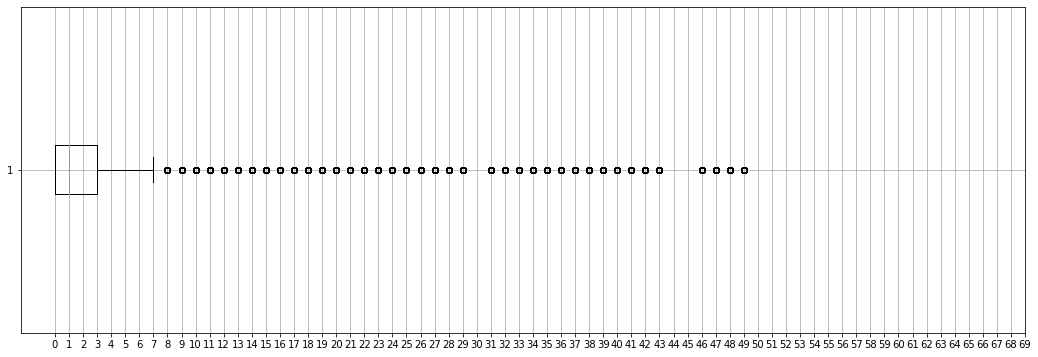

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


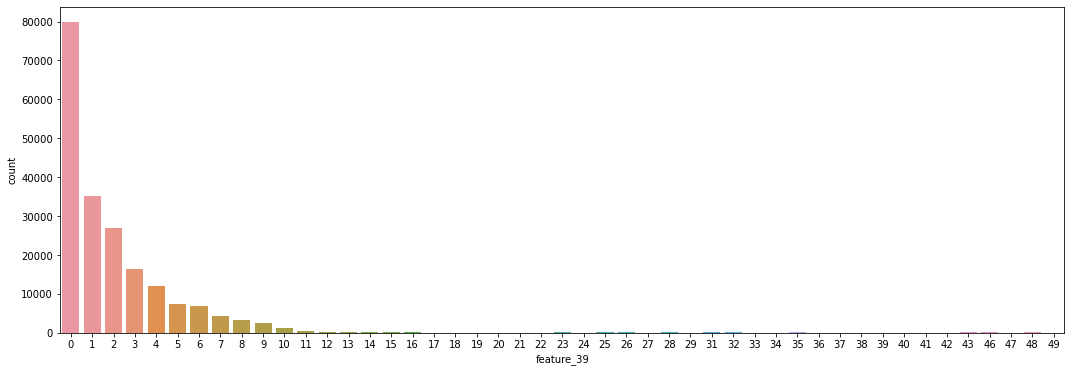

-------------------------------------------------------------------------------------------------------------------
0     128775
1      33902
2      15184
3       6415
4       4056
5       2150
6       2651
7        824
8       1343
9        532
10       384
11       257
12       423
13       204
14       150
15       119
16       202
17       131
18       115
19       129
20       157
22       130
23       140
24       140
25       154
26       132
30       155
32       122
33       133
34       125
35       142
46       124
47       118
72       119
81       163
Name: feature_40, dtype: int64


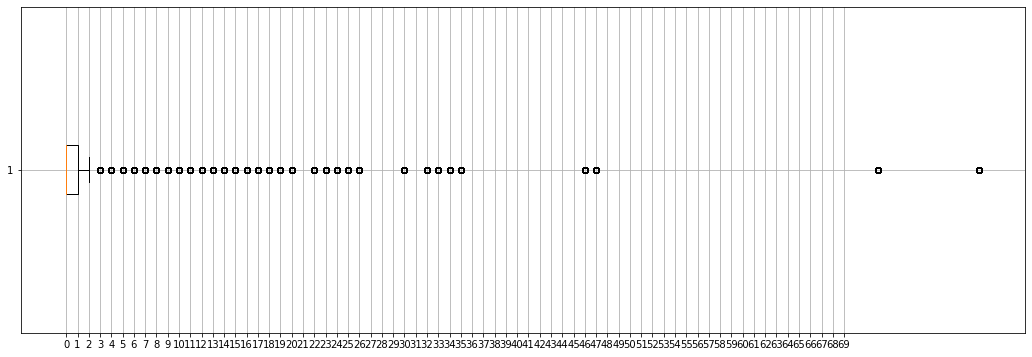

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


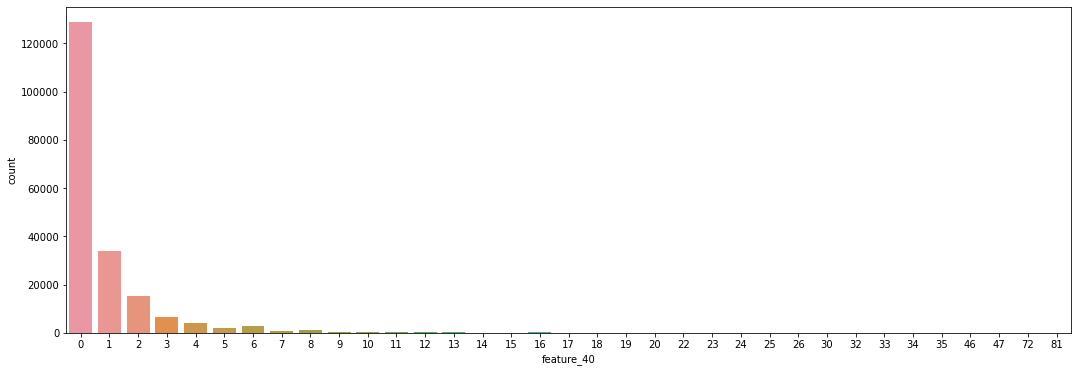

-------------------------------------------------------------------------------------------------------------------
0     145575
1      25657
2      12007
3       5702
4       3304
5       2331
6       1091
7        425
8        432
9        256
10        51
11        49
12        39
13        74
14        54
15        56
16        45
17        27
18        73
19        45
20        28
21        50
22        61
23        66
24        41
25        69
26        49
27        53
28        48
30        74
31        84
32        47
33        59
34        85
35        87
36       116
37        55
38        54
39        64
40        93
41        90
43        80
44        65
45       111
47        52
48        87
49        85
50        97
53       100
54       100
55        75
57       104
65        94
68        85
71        91
73       108
Name: feature_41, dtype: int64


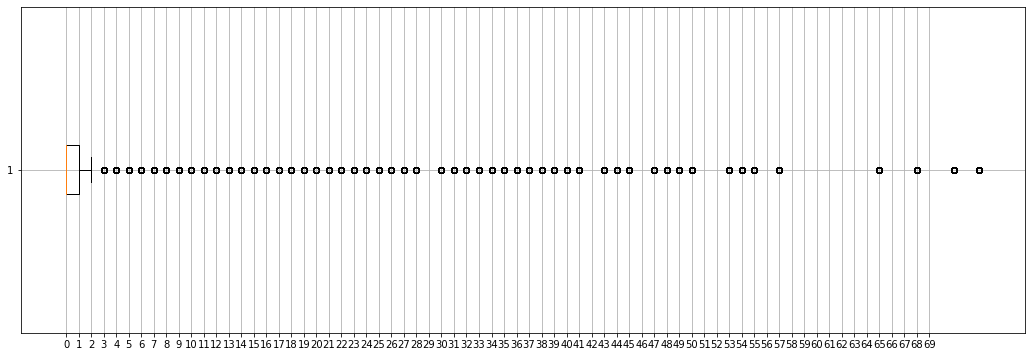

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


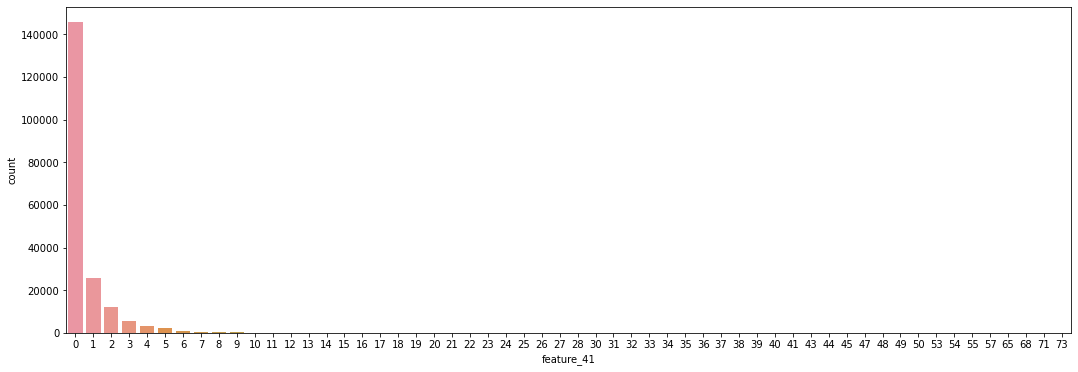

-------------------------------------------------------------------------------------------------------------------
0     147082
1      30072
2      10755
3       3267
4       2081
5       1408
6        920
7       1007
8        620
9        280
10        71
11        68
12        60
13        78
14        45
15        90
16        73
17        59
18        74
19        64
20        65
21        73
22        68
23        71
24        71
25        66
26        58
27        69
28        67
29        54
30        68
31        72
32        78
33        76
34        78
35        89
36       108
37        87
38       100
39       129
40       128
53       151
Name: feature_42, dtype: int64


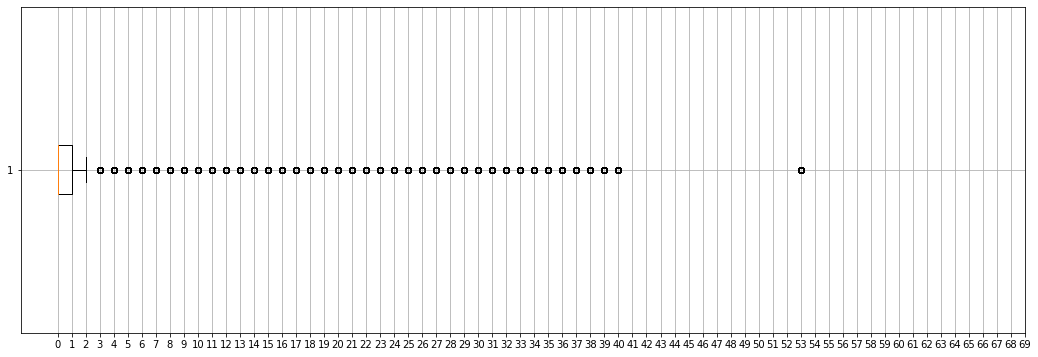

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


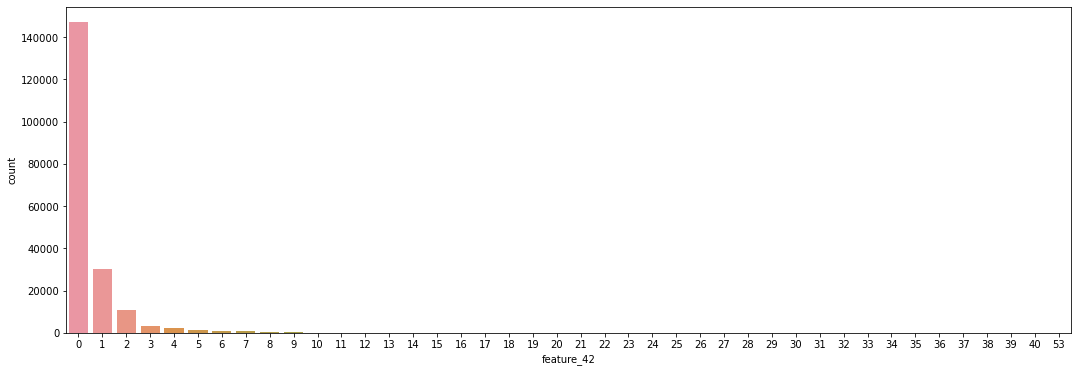

-------------------------------------------------------------------------------------------------------------------
0     61696
1     33155
2     20071
3     15375
4     10600
5      9456
6      7960
7      6576
8      5372
9      4555
10     3170
11     2282
12     2369
13     1900
14     2256
15     1376
16     1155
17      839
18      954
19      692
20      593
21      510
22      380
23      302
24      245
25      217
26      289
27      273
28      390
29      230
30      273
31      200
32      237
33      170
34      244
35      256
36      188
37      207
38      212
39      235
40      222
41      152
42      235
43      220
44      155
45      213
48      161
49      162
52      198
54      193
55      239
60      193
63      197
Name: feature_43, dtype: int64


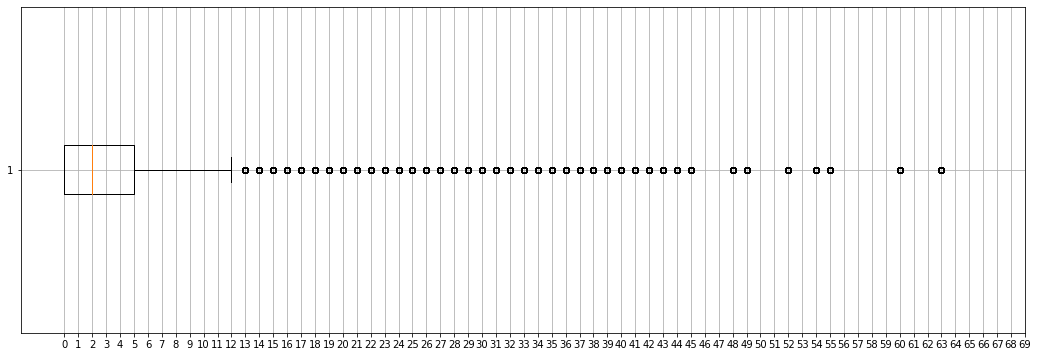

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


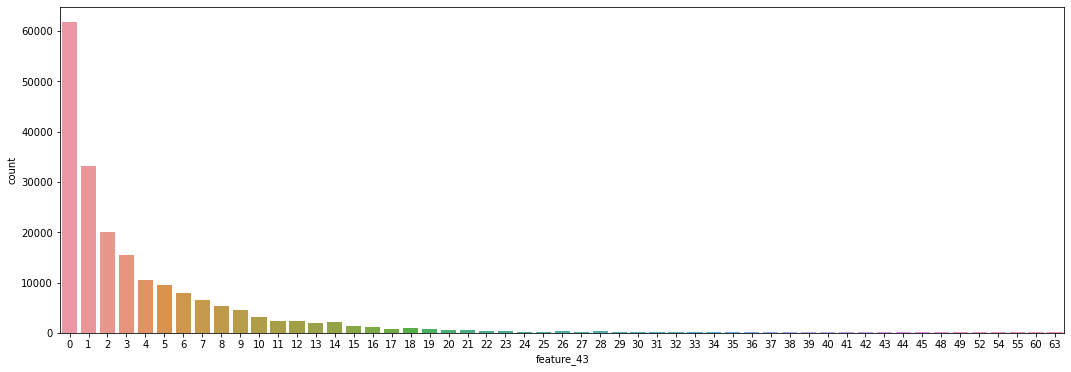

-------------------------------------------------------------------------------------------------------------------
0     127712
1      34848
2      18089
3       8138
4       3658
5       2242
6       1499
7        894
8        695
9        195
10       208
11       183
12       190
13       134
14       107
15       100
16       125
17        83
18        98
19       133
20       101
21       125
22       120
23       129
26        94
27       100
Name: feature_44, dtype: int64


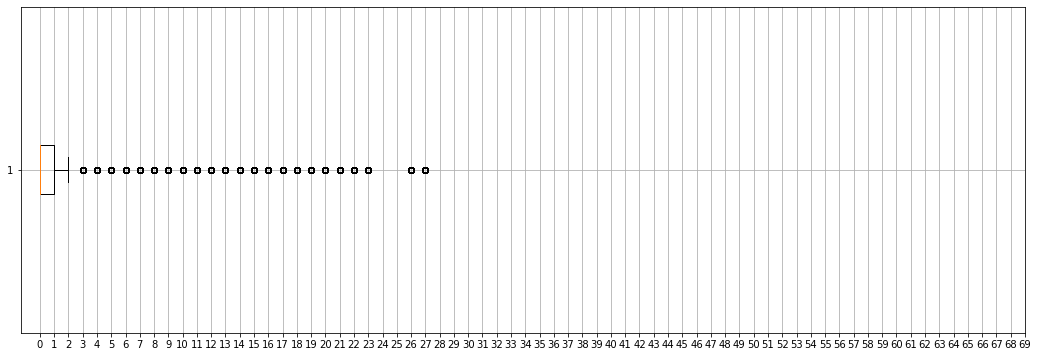

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


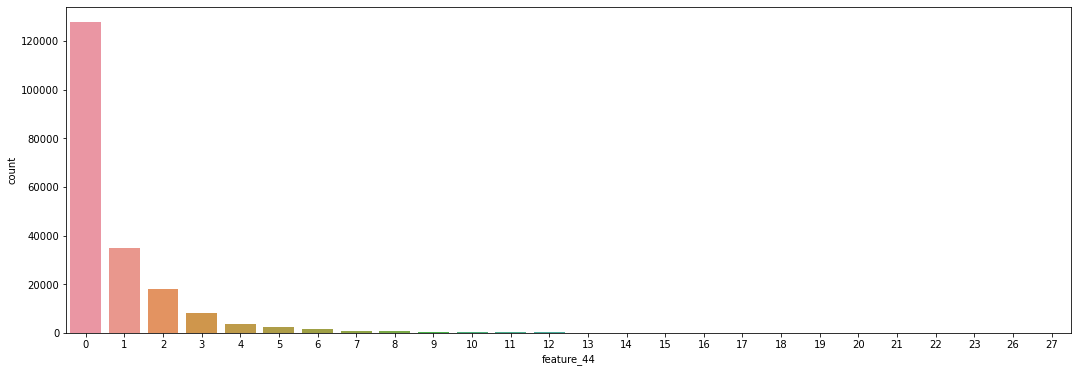

-------------------------------------------------------------------------------------------------------------------
0     146428
1      27497
2      12731
3       4601
4       2969
5       1589
6       1037
7        492
8        424
9        294
10       133
11       125
12       117
13       111
14       136
15       106
16       124
17       106
18       107
19        94
20        98
22       104
23       110
24       116
25       108
28       105
30       138
Name: feature_45, dtype: int64


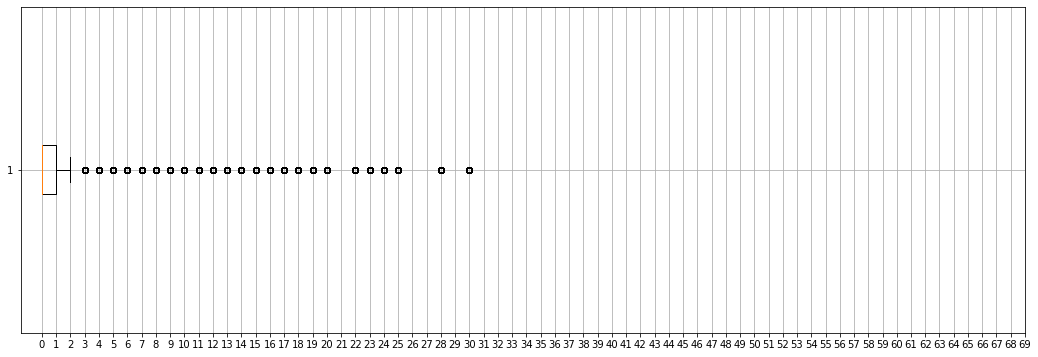

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


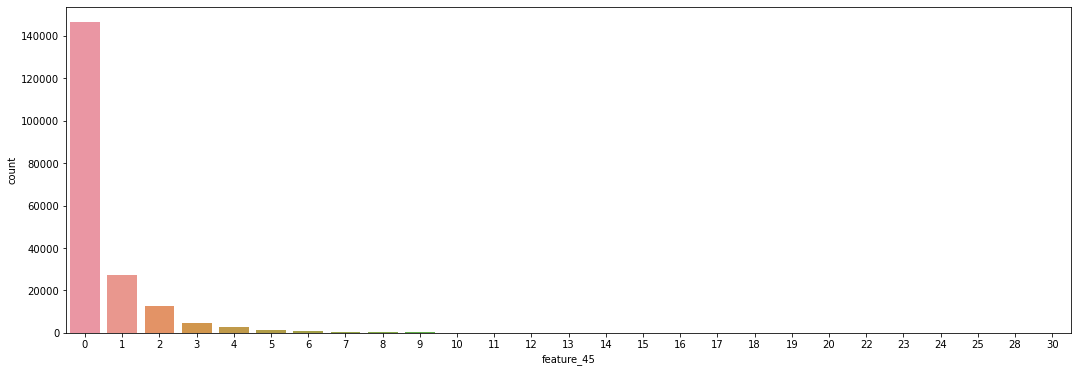

-------------------------------------------------------------------------------------------------------------------
0      143484
1       24104
2        8890
3        3903
4        2783
        ...  
94          9
99          6
115         6
116       144
117         7
Name: feature_46, Length: 87, dtype: int64


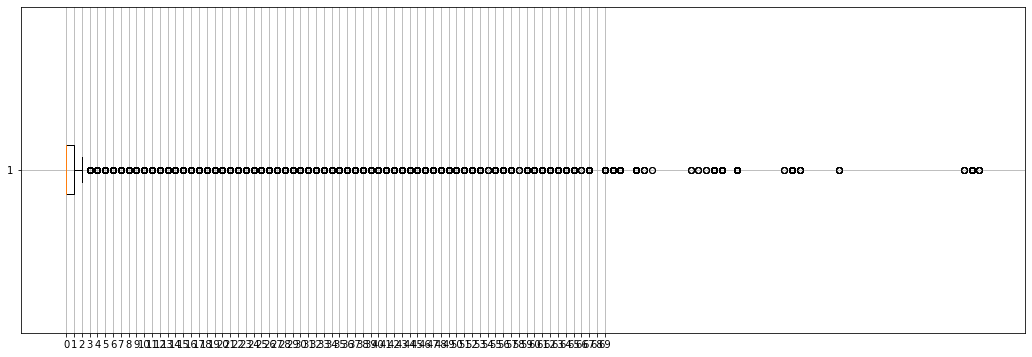

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


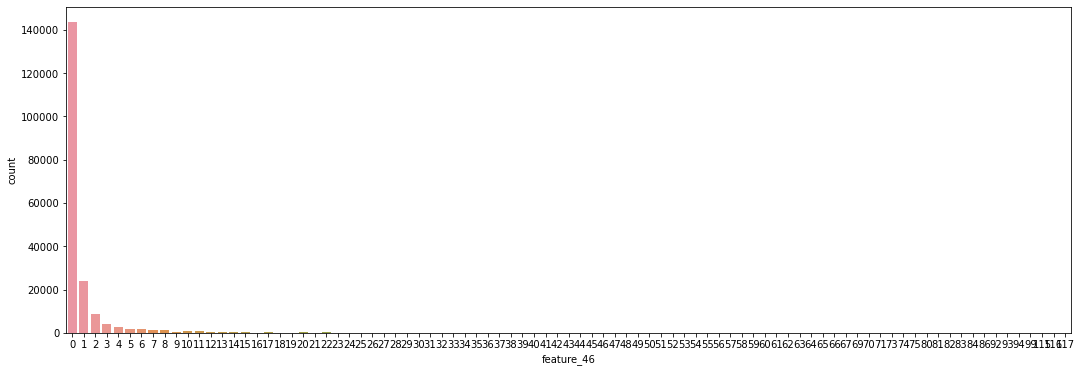

-------------------------------------------------------------------------------------------------------------------
0     167381
1      18505
2       6148
3       1978
4       1132
       ...  
61       103
63        61
64       116
65        64
97        50
Name: feature_47, Length: 63, dtype: int64


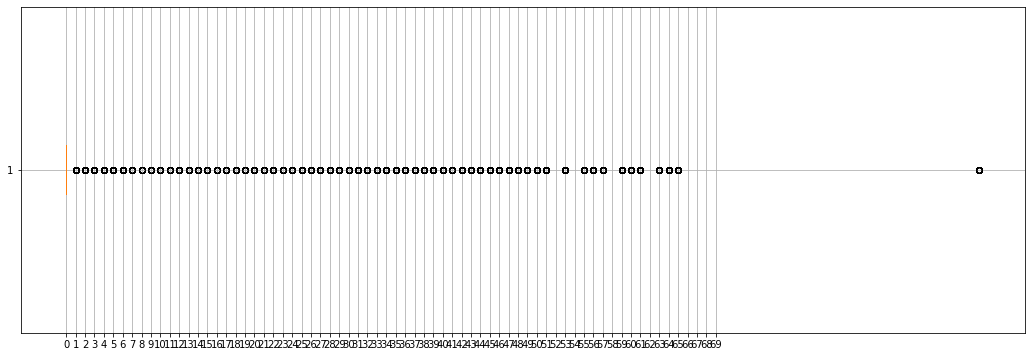

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


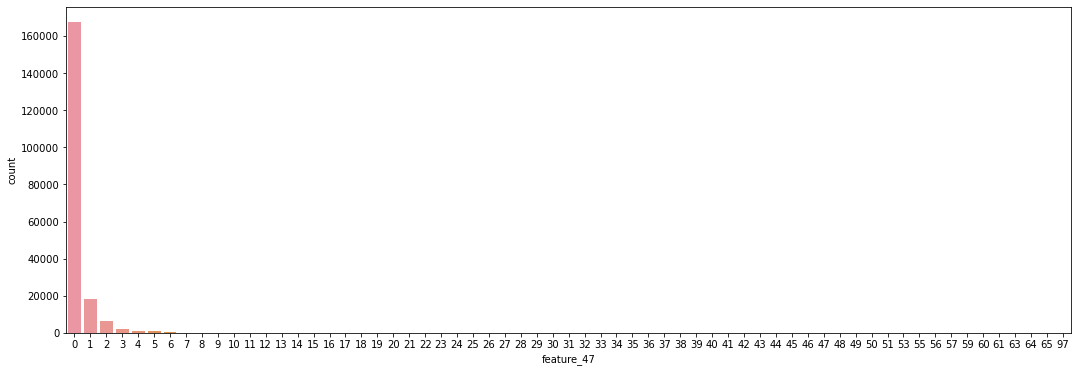

-------------------------------------------------------------------------------------------------------------------
0     125645
1      36840
2      13440
3       5721
4       3091
5       1370
6       1375
7        533
8       1115
9        710
10      1320
11       448
12      2629
13       823
14       545
15       306
16       415
17       293
18       513
19       181
20       181
21       151
22       117
23       118
24       107
25       115
26       124
27       113
28       157
30       143
31       119
32       124
33       152
34       160
36       172
37       160
38       170
39       151
40       153
Name: feature_48, dtype: int64


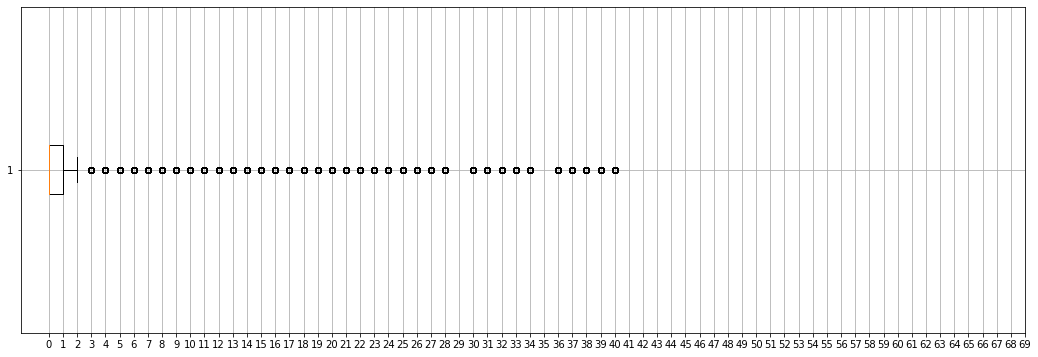

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


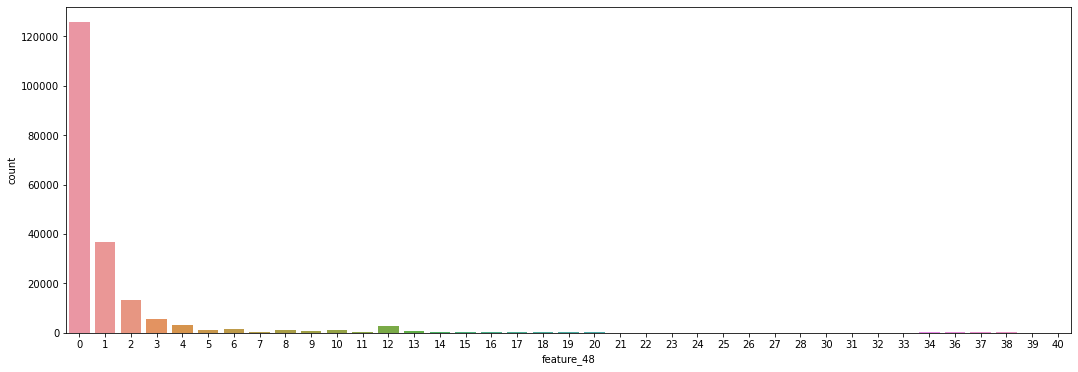

-------------------------------------------------------------------------------------------------------------------
0     172181
1      10322
2       6204
3       3344
4       2539
5       1294
6       1126
7        632
8        384
9        259
10       253
11       127
12       168
13       124
14       151
15       115
16       100
17       101
18       115
19       112
23       113
33       107
38       129
Name: feature_49, dtype: int64


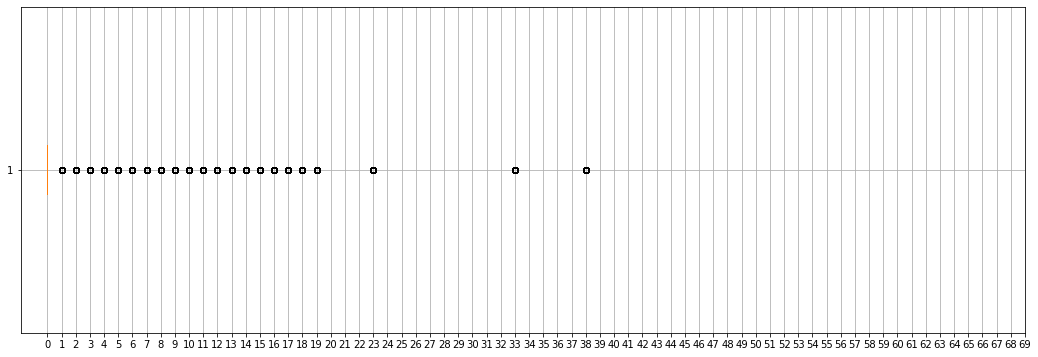

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


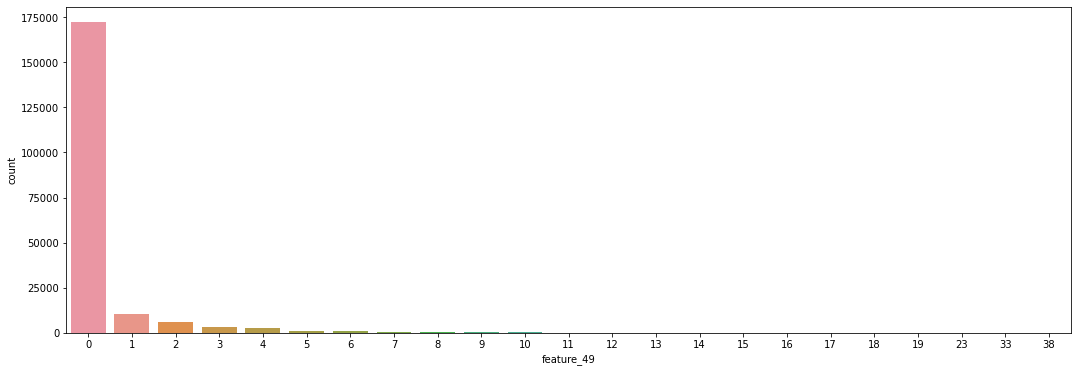

-------------------------------------------------------------------------------------------------------------------
0     86629
1     41413
2     24280
3     14217
4      9205
5      5247
6      4097
7      2524
8      2031
9      1529
10     1285
11      958
12      563
13      578
14      361
15      473
16      585
17      209
18      210
19      177
20      207
21      187
22      185
23      159
24      138
25      156
26      140
27      129
28      130
29      162
31      188
32      167
33      174
34      195
41      126
42      185
46      179
54      332
55      135
56      155
Name: feature_50, dtype: int64


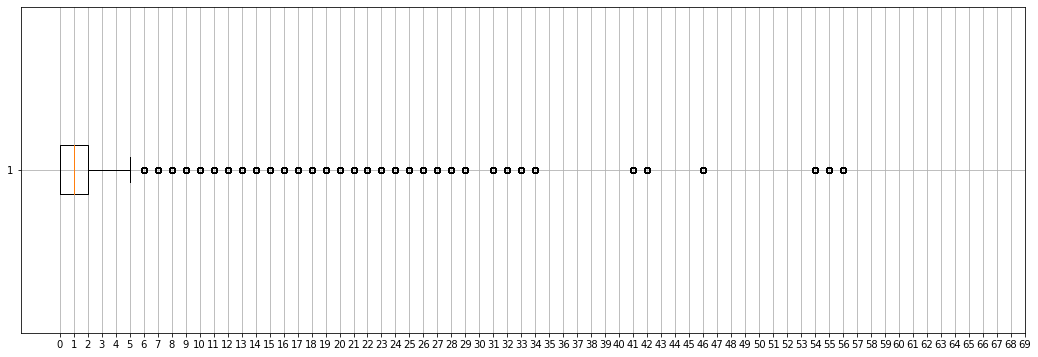

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


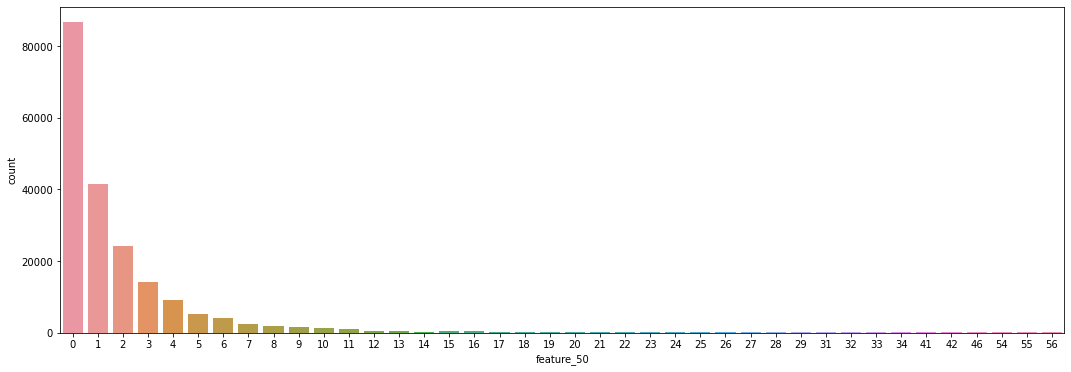

-------------------------------------------------------------------------------------------------------------------
0     112404
1      40101
2      21670
3       8811
4       4497
5       2634
6       1512
7       1062
8        725
9        652
10       424
11       427
12       290
13       248
14       235
15       290
16       211
17       146
18       208
19       181
20       108
21       130
22       126
23       122
24       101
25       120
26       107
27        96
28       102
29       105
30        77
31        98
32       105
33        93
34        98
35       113
36       112
37       143
38       128
39       111
40       140
41       157
42       150
43       107
44       155
51        72
55       100
72        96
73       100
Name: feature_51, dtype: int64


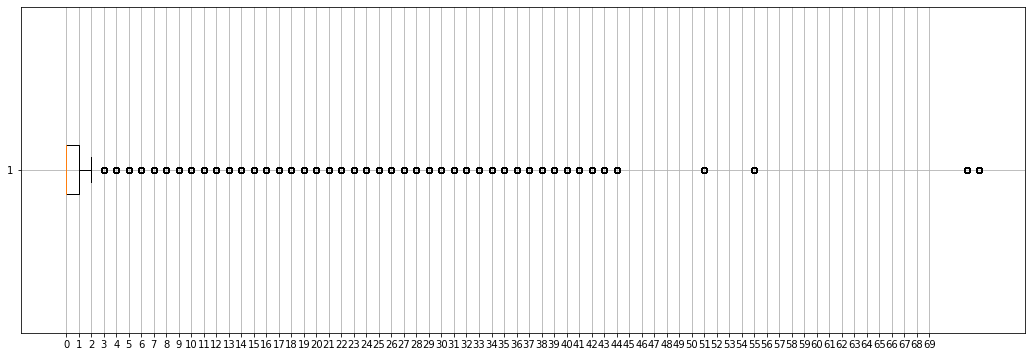

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


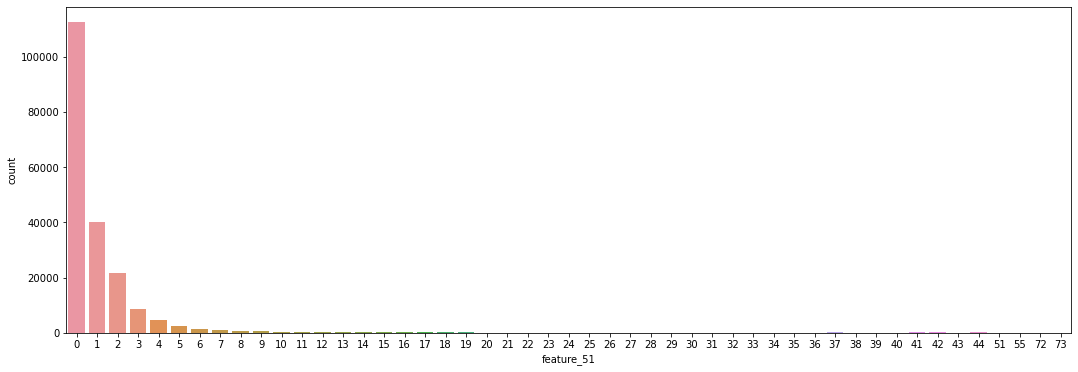

-------------------------------------------------------------------------------------------------------------------
0     141266
1      34598
2      13080
3       5016
4       2402
5       1179
6        857
7        200
8         90
9         94
10        85
11        92
12        57
13        72
14        83
16        88
19        79
20        72
23        94
24        99
25        56
26        97
28        98
30        81
38        65
Name: feature_52, dtype: int64


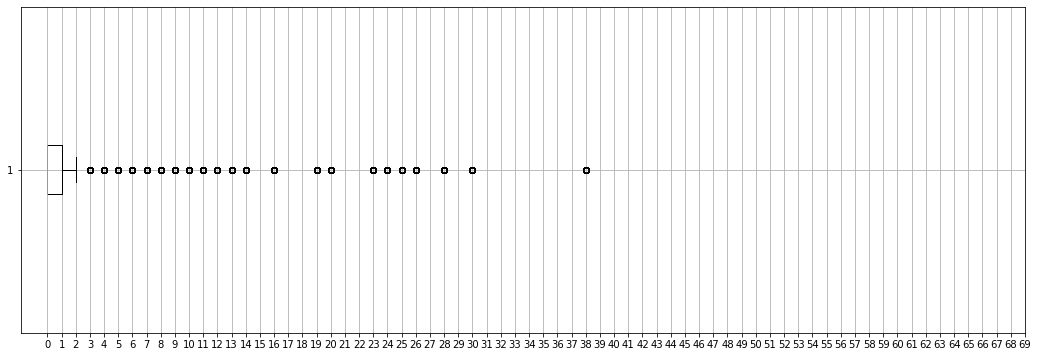

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


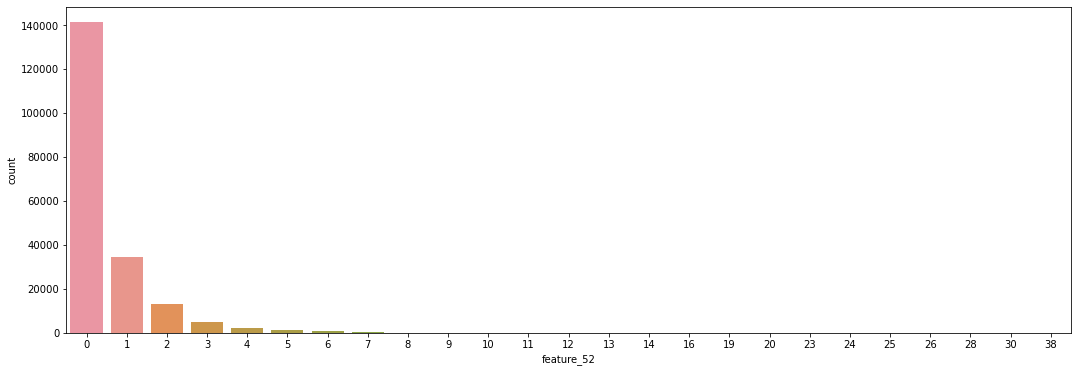

-------------------------------------------------------------------------------------------------------------------
0     106444
1      36707
2      23724
3      13486
4       7453
5       3244
6       2715
7       1341
8       1369
9        655
10       216
11       610
12        58
13        67
14        60
15        90
16        77
17        97
18        84
19        99
20        76
21        80
22        75
23       138
24        80
25       114
26        87
27        86
28        90
29       109
30       109
33       134
35       112
36       114
Name: feature_53, dtype: int64


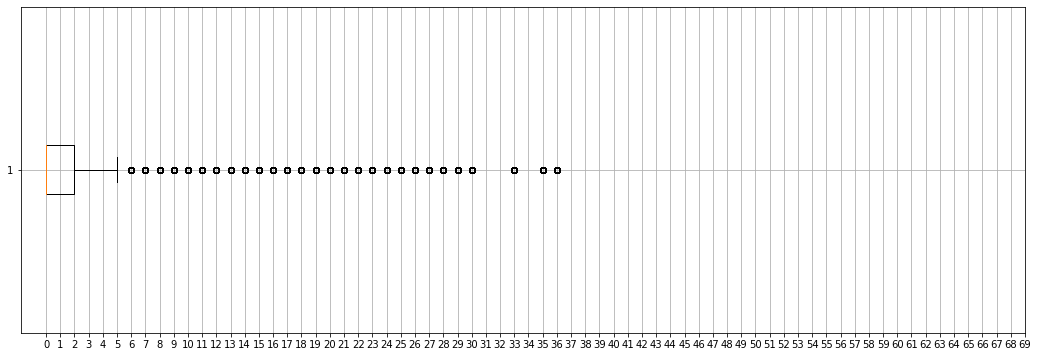

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


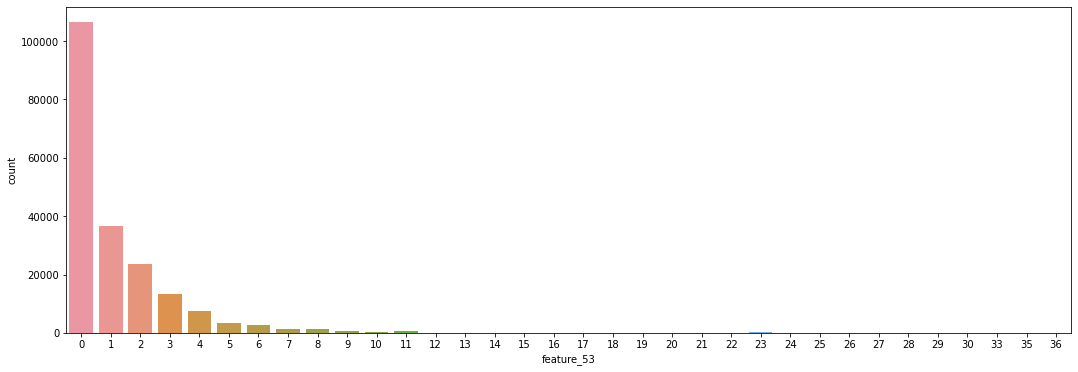

-------------------------------------------------------------------------------------------------------------------
0      60090
1      24335
2      22148
3      12370
4      12053
       ...  
79       165
82       170
83       153
89       176
104      138
Name: feature_54, Length: 72, dtype: int64


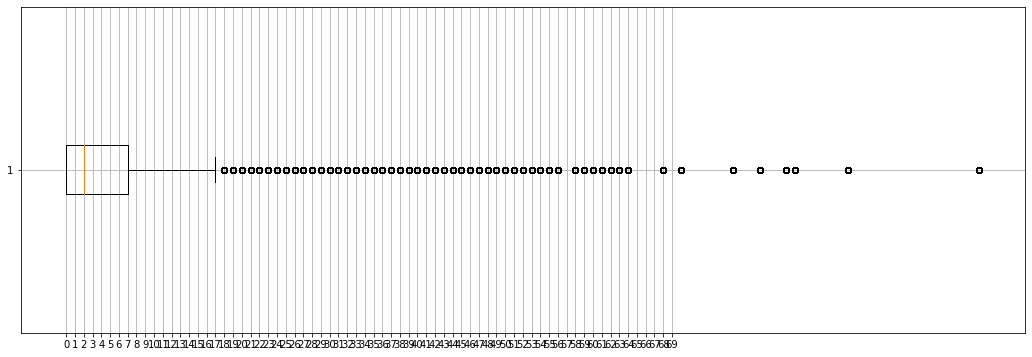

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


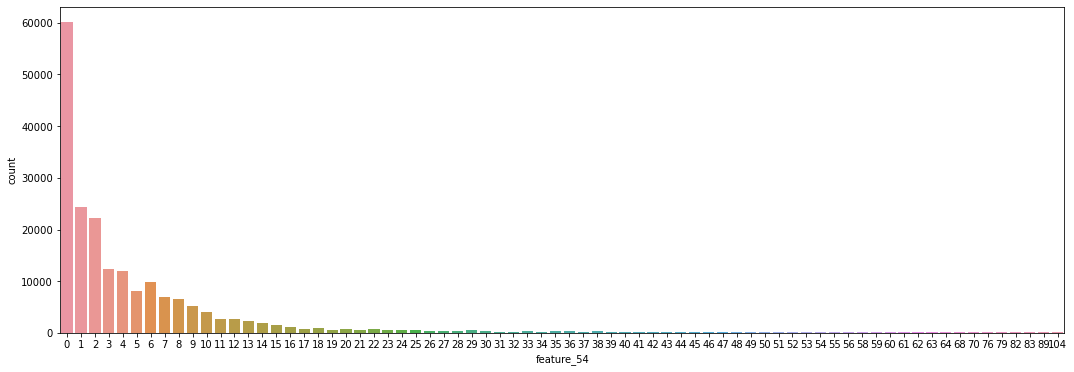

-------------------------------------------------------------------------------------------------------------------
0     143525
1      22584
2       8609
3       4890
4       2610
       ...  
61       171
62       207
63       177
64       154
76       185
Name: feature_55, Length: 65, dtype: int64


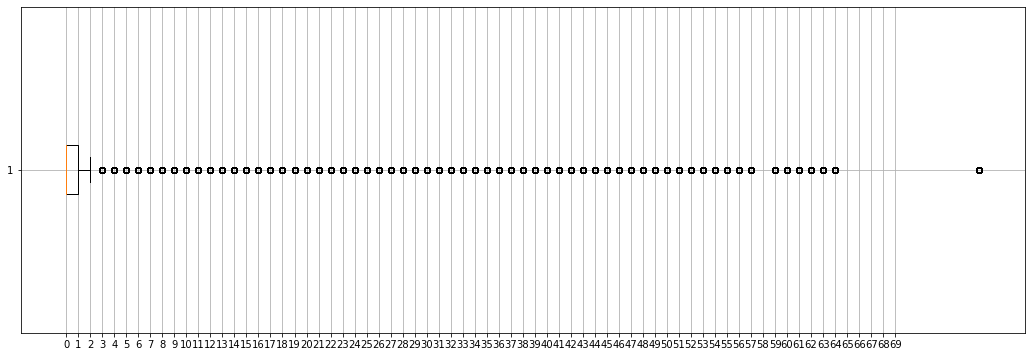

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


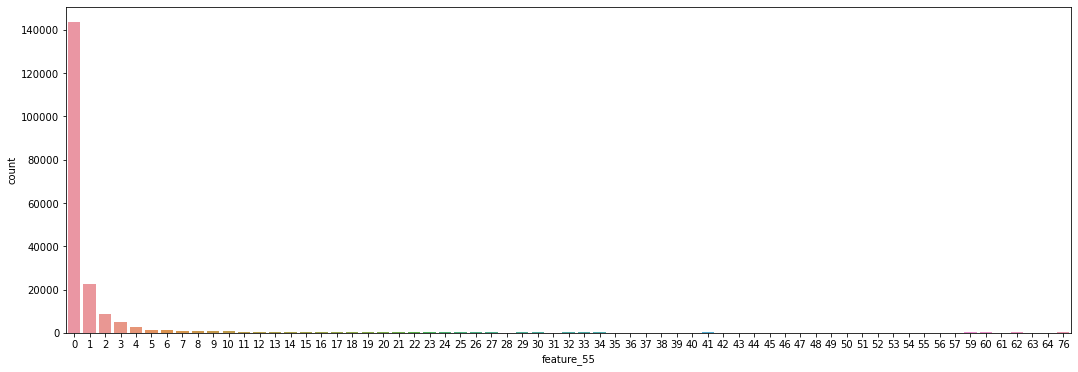

-------------------------------------------------------------------------------------------------------------------
0     92471
1     33060
2     22982
3     12348
4     12313
5      6778
6      4841
7      3276
8      2530
9      1759
10     1294
11     1096
12      676
13      335
14      460
15      373
16      338
17      222
18      248
19      191
20      174
21      153
22      174
23      170
24      128
25      159
26      124
27      176
28      176
30      138
31      165
32      192
37      165
41      154
46      161
Name: feature_56, dtype: int64


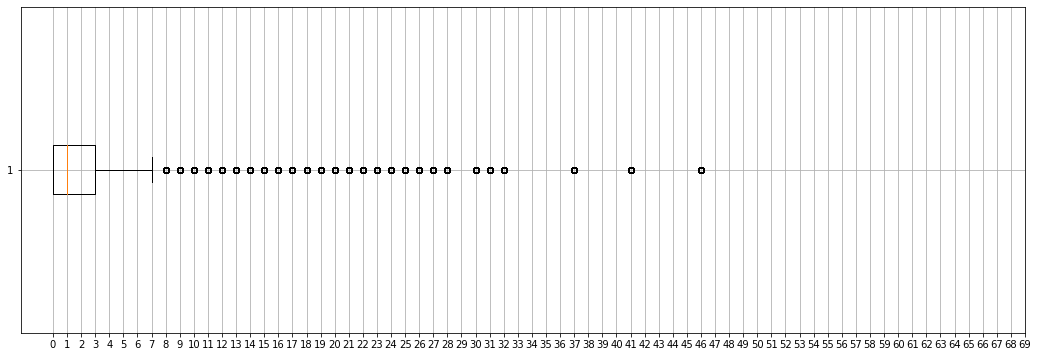

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


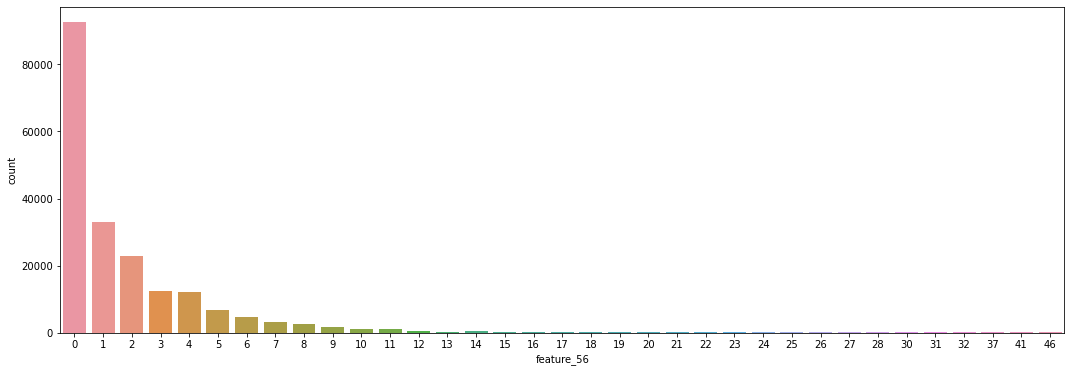

-------------------------------------------------------------------------------------------------------------------
0     153300
1      26044
2       9999
3       4665
4       2119
5        956
6        562
7        467
8        125
9        119
10        89
11        97
12        99
13        92
14        86
15        85
16        86
17        78
18       100
19       114
20        80
21        82
23        99
24        99
25        98
26        78
28        83
31        99
Name: feature_57, dtype: int64


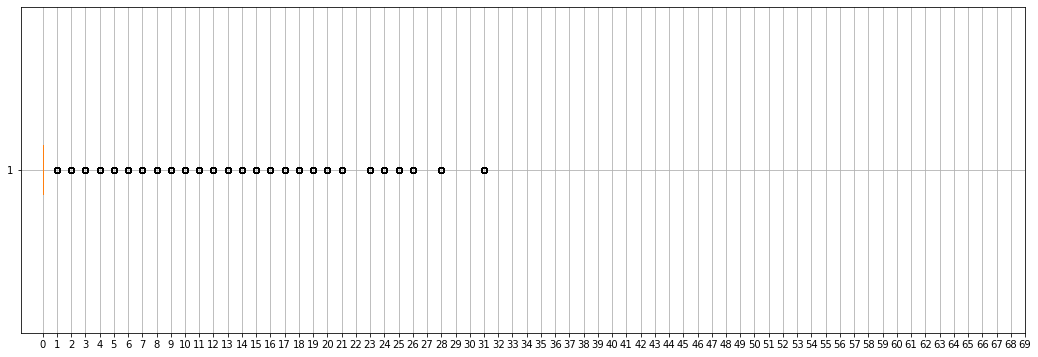

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


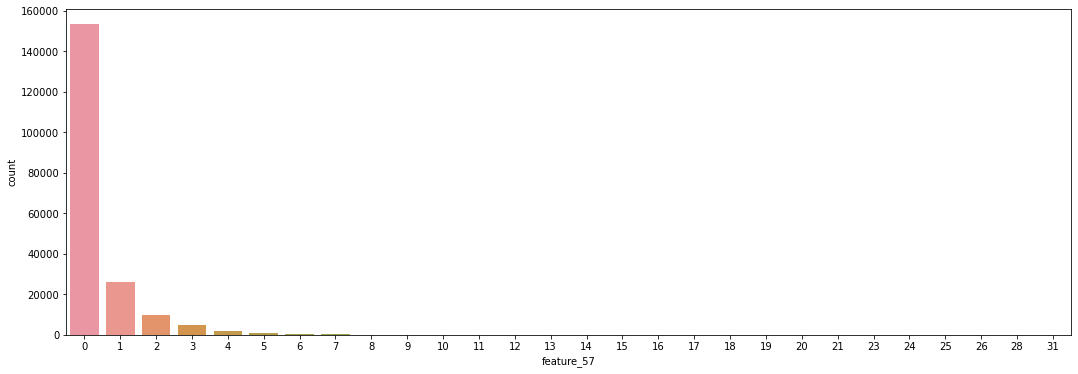

-------------------------------------------------------------------------------------------------------------------
0     128691
1      38994
2      16633
3       5796
4       3350
5       1124
6        629
7        555
8        507
9        391
10       351
11       222
12       232
13       219
14       158
15       167
16       172
17       150
18       117
19       147
20       140
21       129
22       104
23       141
24       117
25       118
26       111
27       126
28        98
29       143
30       168
Name: feature_58, dtype: int64


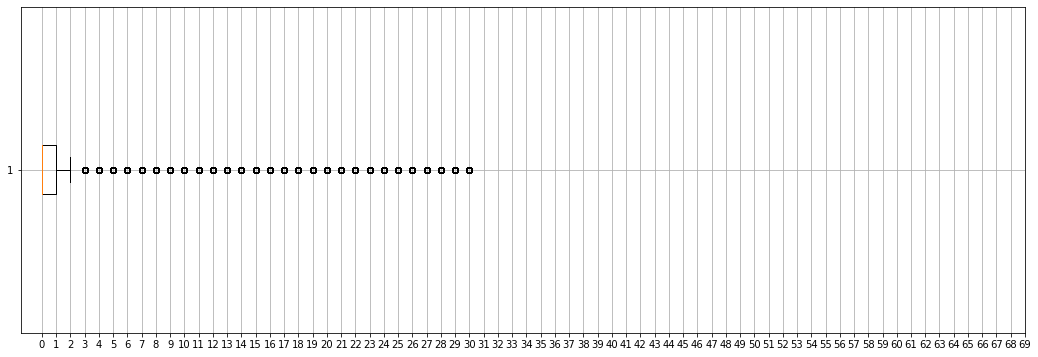

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


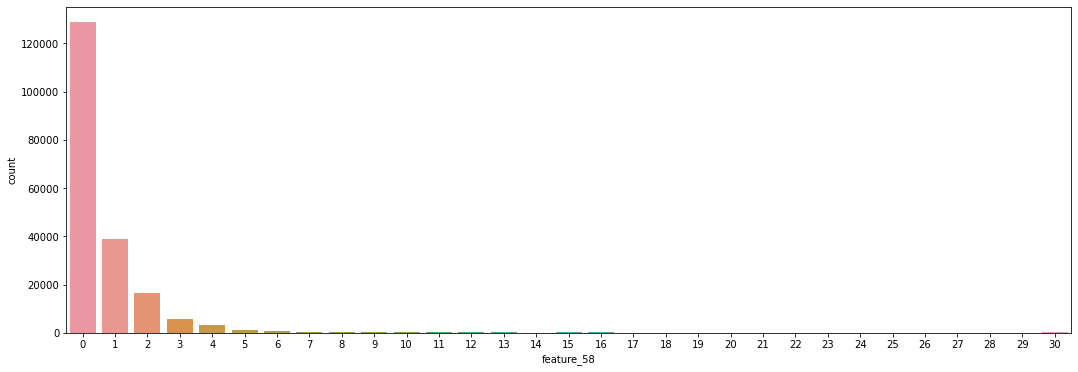

-------------------------------------------------------------------------------------------------------------------
0      135699
1       29997
2       15424
3        5193
4        3747
        ...  
253         2
287         1
311         1
325         3
352         1
Name: feature_59, Length: 92, dtype: int64


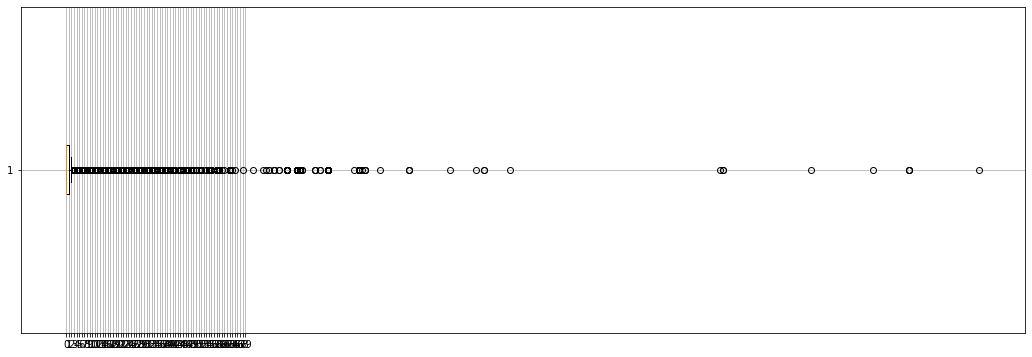

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


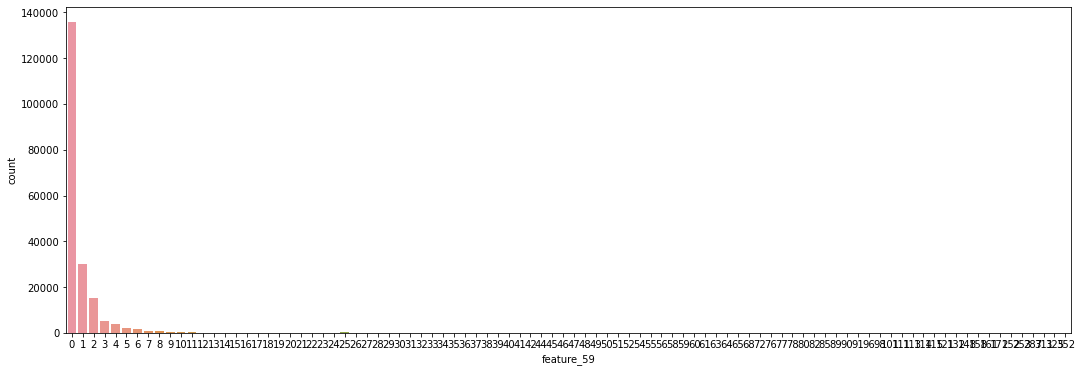

-------------------------------------------------------------------------------------------------------------------
0      128636
1       27040
2       17475
3        8034
4        5053
        ...  
145         3
161         2
172         1
180         3
231         1
Name: feature_60, Length: 99, dtype: int64


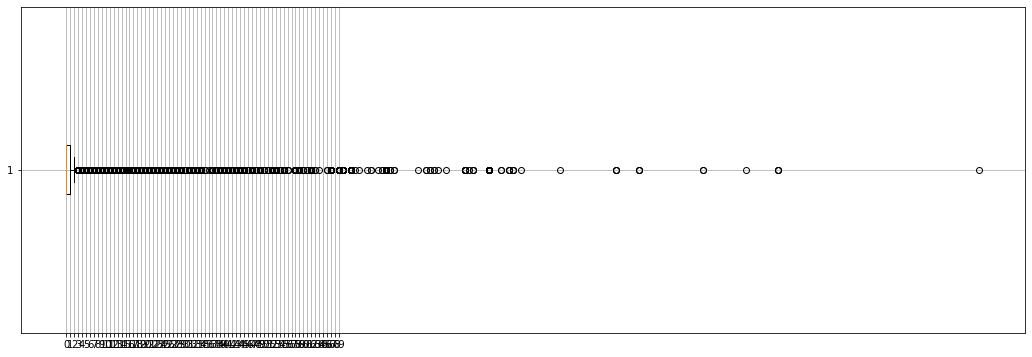

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


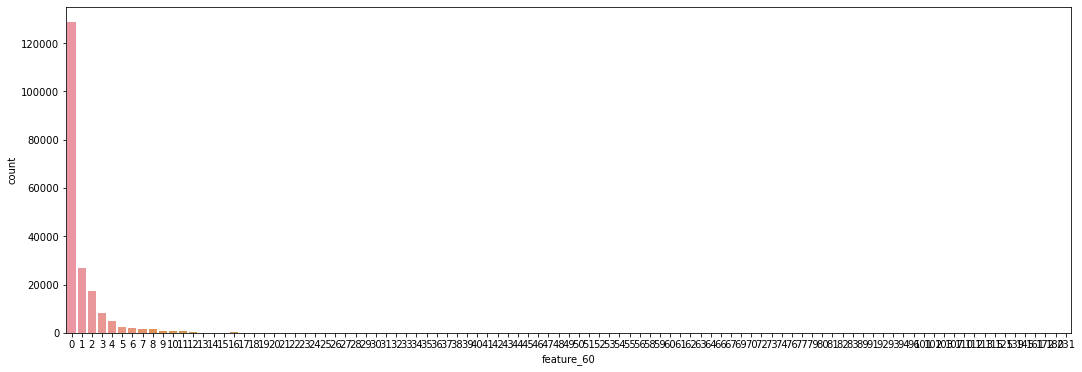

-------------------------------------------------------------------------------------------------------------------
0     133812
1      35451
2      14743
3       5010
4       2680
       ...  
74         5
75         8
76         6
77        85
80         6
Name: feature_61, Length: 70, dtype: int64


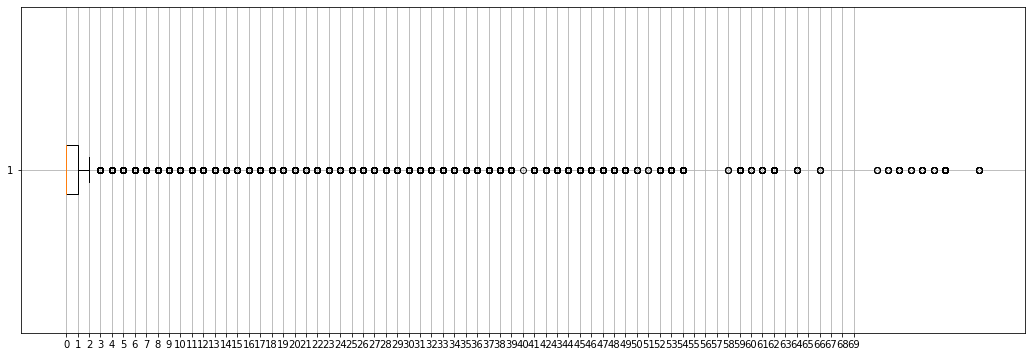

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


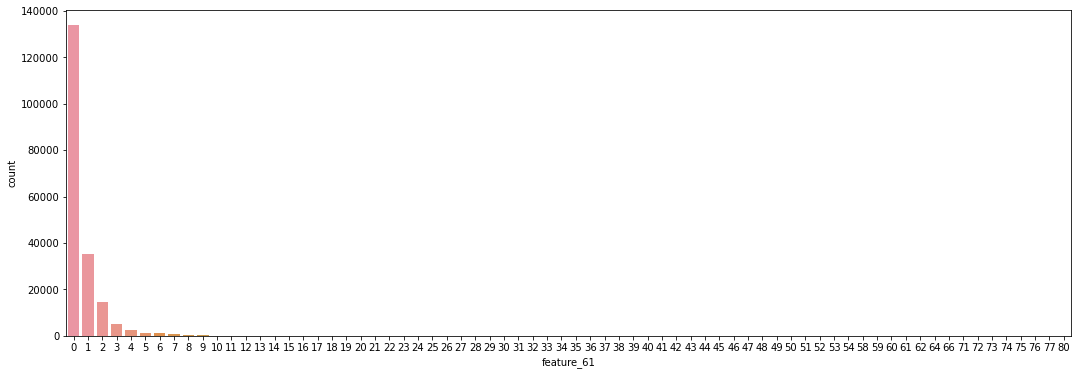

-------------------------------------------------------------------------------------------------------------------
0      118295
1       30377
2       12661
3        6346
4        5189
        ...  
57        133
59        162
65        144
80        165
102       161
Name: feature_62, Length: 61, dtype: int64


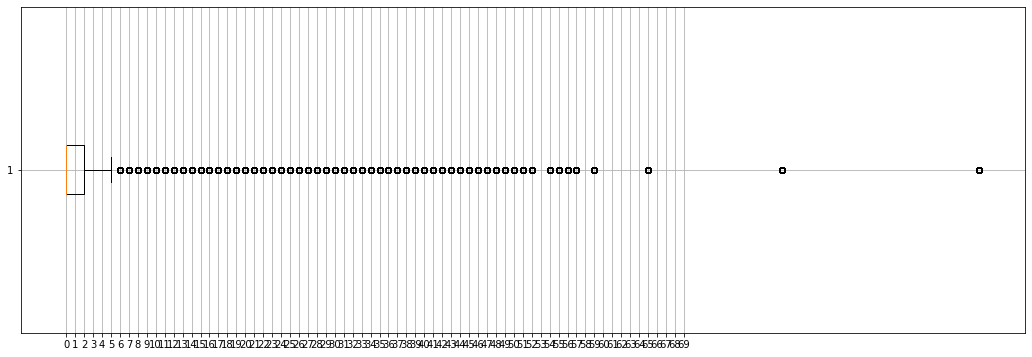

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


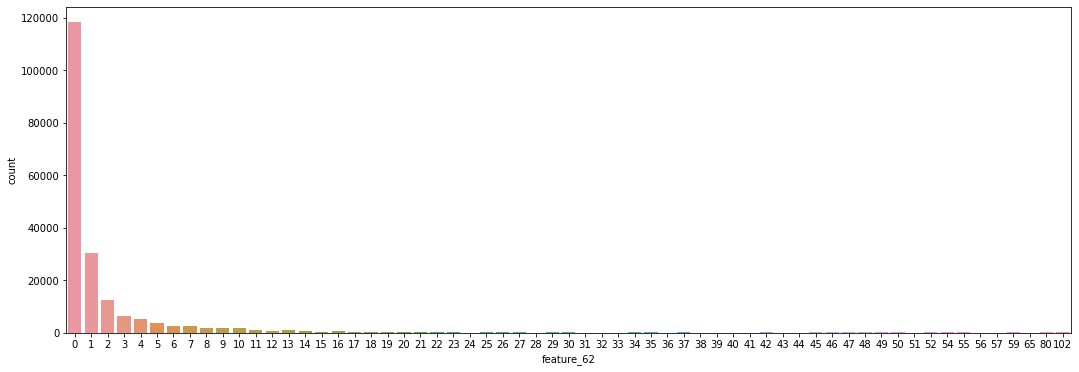

-------------------------------------------------------------------------------------------------------------------
0     152388
1      24492
2       9936
3       3544
4       2199
       ...  
68        60
69        45
71       135
78        63
80        44
Name: feature_63, Length: 70, dtype: int64


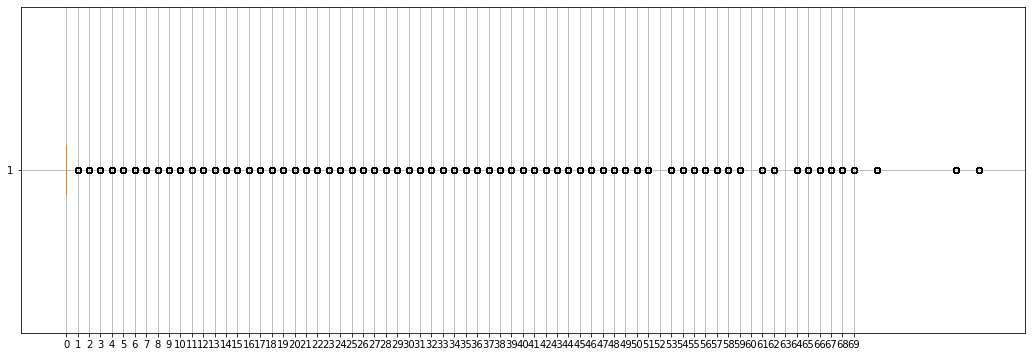

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


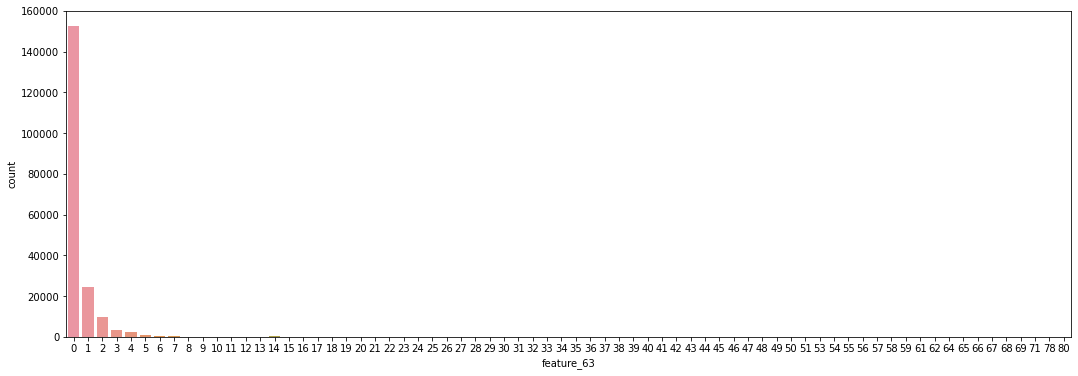

-------------------------------------------------------------------------------------------------------------------
0     153765
1      21739
2      10776
3       3353
4       2478
5       1365
6       1074
7       1284
8        601
9        369
10       496
11       507
12       706
13       161
14       182
15       123
16       160
17       159
19       179
20       171
21       161
25       191
Name: feature_64, dtype: int64


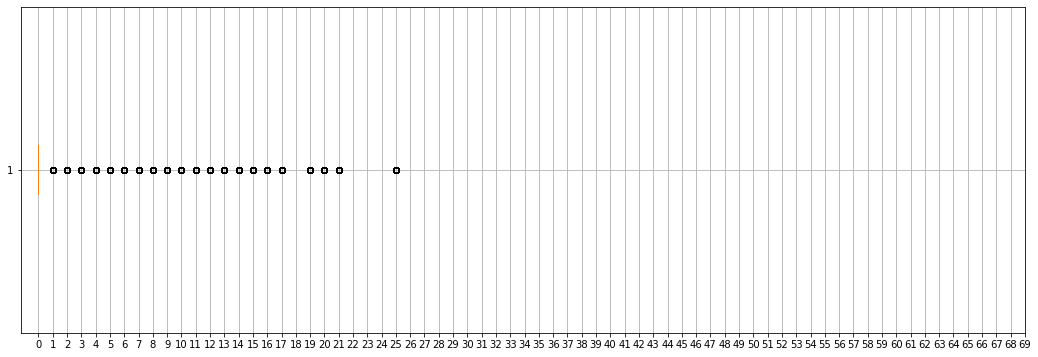

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


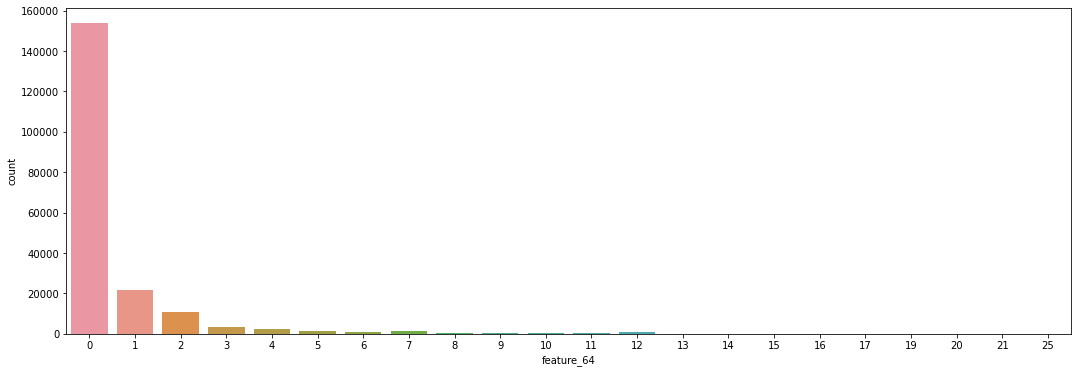

-------------------------------------------------------------------------------------------------------------------
0     124517
1      29468
2      12192
3       7936
4       5423
5       3583
6       2978
7       2038
8       1645
9       1406
10      1202
11       529
12       865
13       512
14       454
15       338
16       462
17       410
18       257
19       220
20       249
21       194
22       179
23       161
24       173
25       140
26       131
27       183
28       135
29       145
30       131
31       162
32       134
33       172
34       159
37       197
40       220
45       160
46       168
48       197
54       175
Name: feature_65, dtype: int64


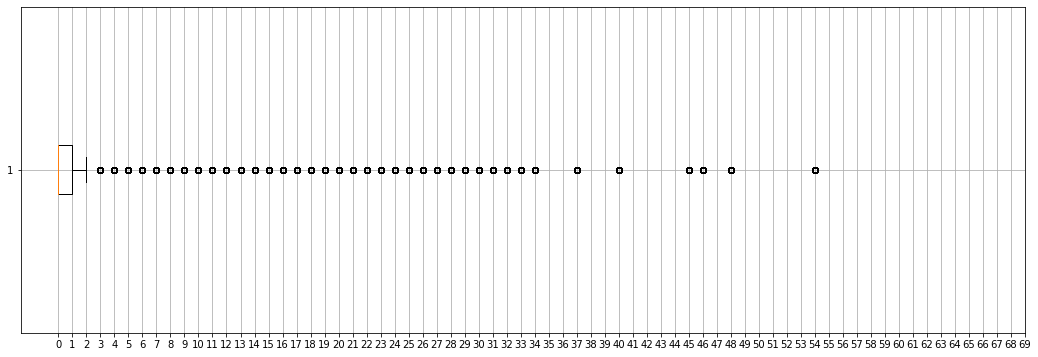

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


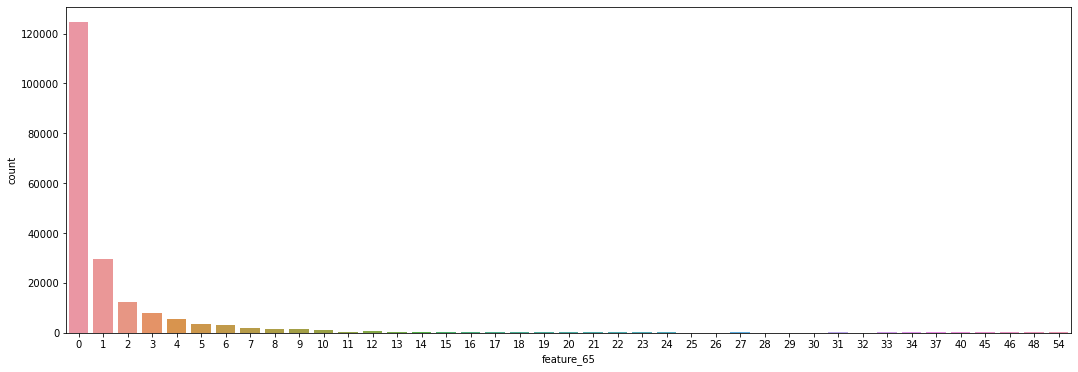

-------------------------------------------------------------------------------------------------------------------
0     165048
1      15956
2       7774
3       3511
4       2446
5       1757
6        702
7        353
8        412
9        181
10       240
11       160
12       136
13       141
14       117
15       164
16       140
17       117
19       161
20       131
21       102
22       136
24       115
Name: feature_66, dtype: int64


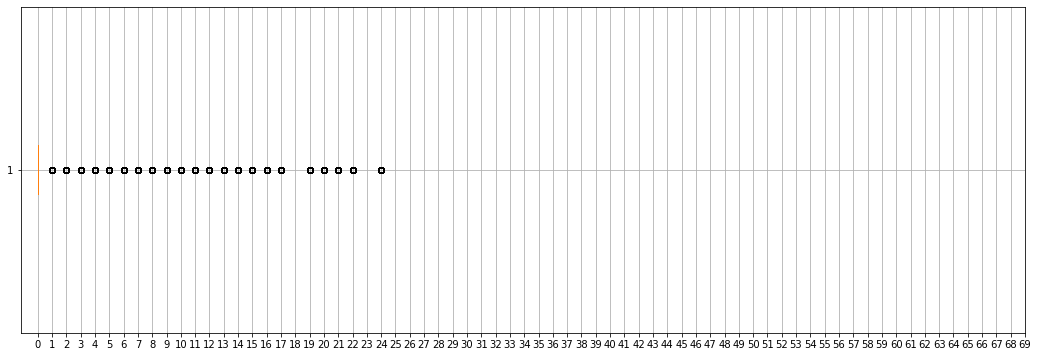

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


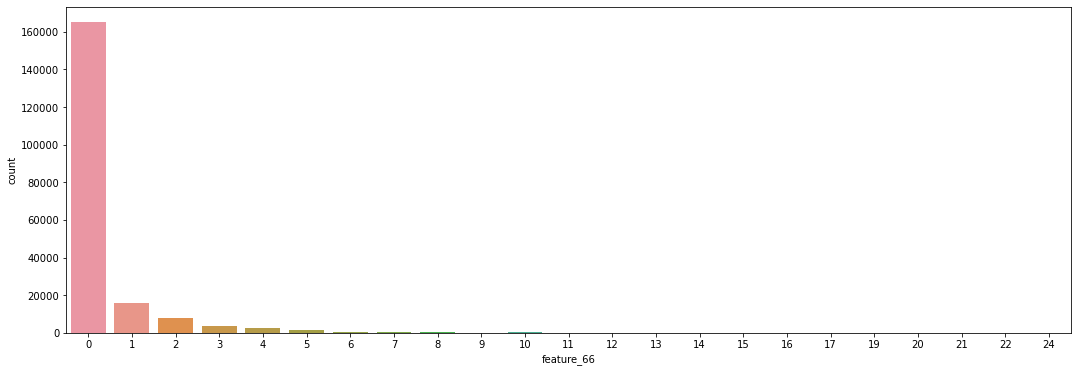

-------------------------------------------------------------------------------------------------------------------
0     141642
1      24523
2      10112
3       5623
4       3004
5       2105
6       1421
7       1297
8        997
9        655
10      1164
11       540
12       398
13       509
14       468
15       337
16       182
17       318
18       164
19        95
20       111
21       146
22       141
23       104
24       100
25       103
26        99
27        76
28       103
29        79
30       118
31       101
32        99
33        94
34        94
36       111
37        85
38       133
39       129
40       134
41       132
44       140
46       139
48       132
49       129
51       119
54       128
56       134
59       116
60       131
62       128
63       131
64       161
65       151
67       152
70       132
79       131
Name: feature_67, dtype: int64


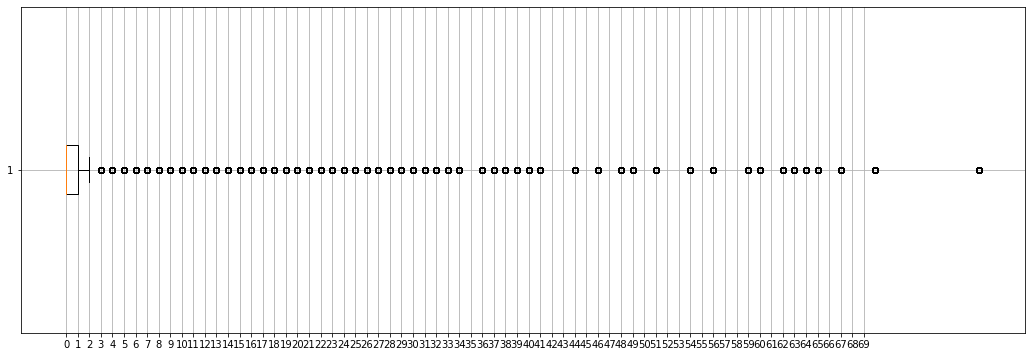

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


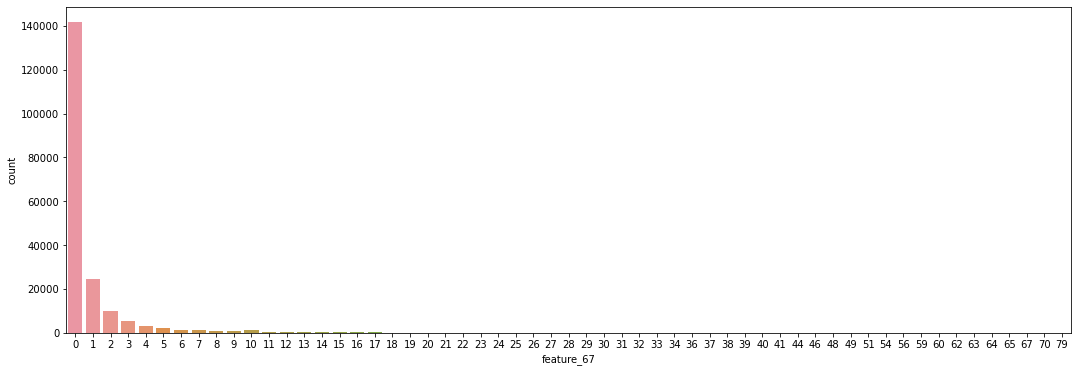

-------------------------------------------------------------------------------------------------------------------
0     145532
1      26891
2      12848
3       5297
4       3037
5       1496
6       1172
7        499
8        330
9        132
10       267
11        54
12        43
13        62
14        57
15        62
16        55
17       130
18        61
19        61
20        70
21        75
22        48
23        73
24        67
25        69
26        69
27        69
28        55
29        62
30        77
31       100
32        87
34       110
35        95
36        78
41       115
43       140
45        78
48       111
52       118
55       148
Name: feature_68, dtype: int64


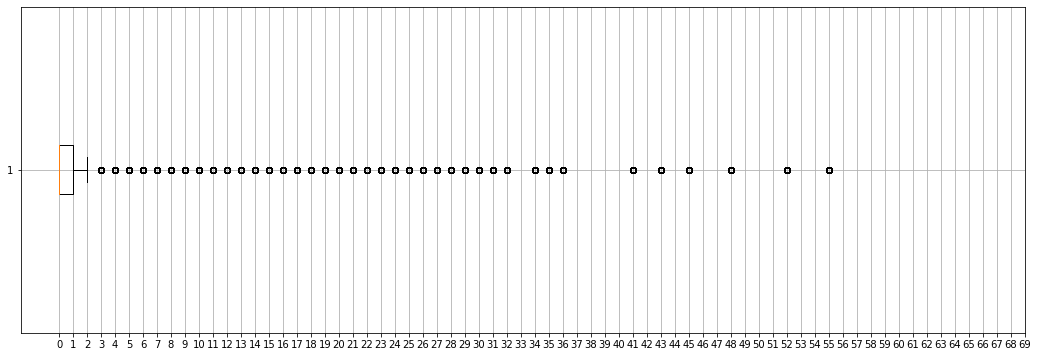

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


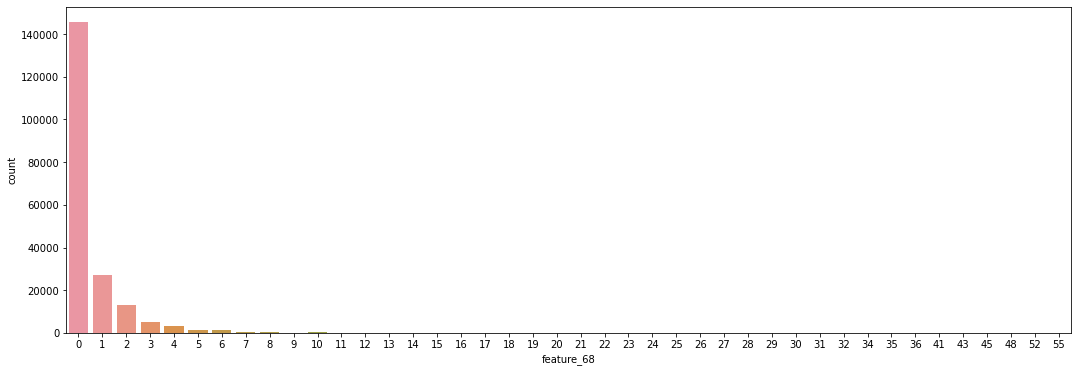

-------------------------------------------------------------------------------------------------------------------
0     113213
1      36147
2      19770
3      11528
4       6087
5       2803
6       2031
7       1588
8       1159
9        656
10       517
11       344
12       352
13       226
14       167
15       111
16       159
17        88
18        80
19        91
20        49
21        70
22        81
23        90
24       105
25        85
26        82
27        55
28       107
29        76
30        76
31       102
32        90
33        82
34        93
35        98
36        90
37       134
38       102
39       120
40       121
41       130
42       129
43        53
44       144
45       107
49        66
50        55
54       119
61        79
62        51
65        42
Name: feature_69, dtype: int64


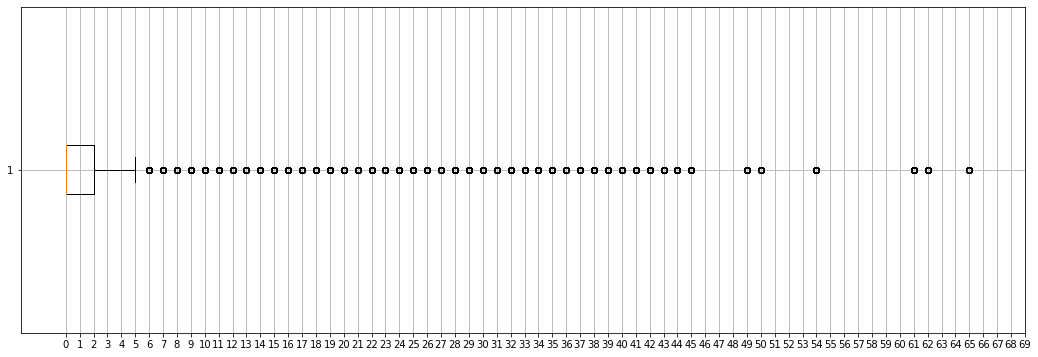

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


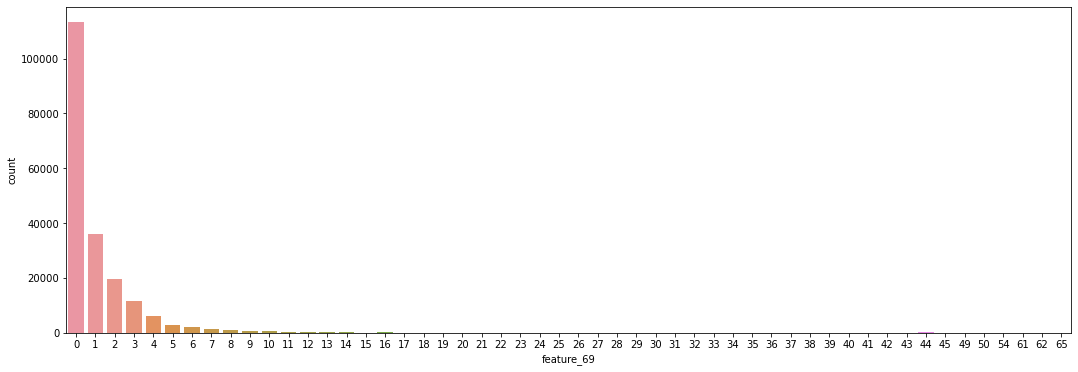

-------------------------------------------------------------------------------------------------------------------
0     132247
1      35666
2      13834
3       5655
4       4197
5       2056
6       1089
7        765
8        554
9        236
10       168
11        78
12        77
13       109
14        97
15        83
16        99
17        62
18        83
19        69
20        67
21        63
22        60
23        58
24        69
25        62
26        77
27       119
28       116
29       118
30        89
31        88
32        66
33       103
34       105
35        78
36        76
37       121
38       121
40       119
41        85
42        75
43        81
45       135
47       104
49       159
54       108
60       115
67       139
Name: feature_70, dtype: int64


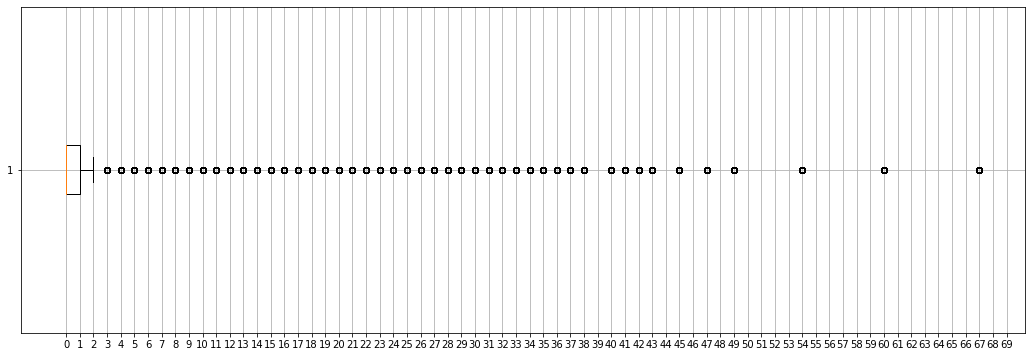

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


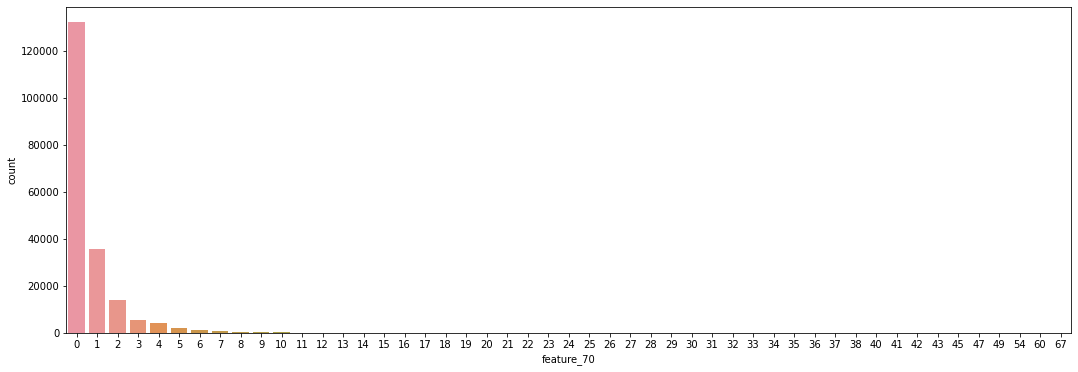

-------------------------------------------------------------------------------------------------------------------
0     139966
1      31300
2      13342
3       5352
4       2841
5       1649
6       1201
7        856
8        585
9        471
10       251
11       189
12       174
13       121
14       118
15       114
16       129
17       102
18        99
19        88
20        72
21        73
22        96
23        85
24        88
25       108
26       101
27        87
28       119
29       100
30       123
Name: feature_71, dtype: int64


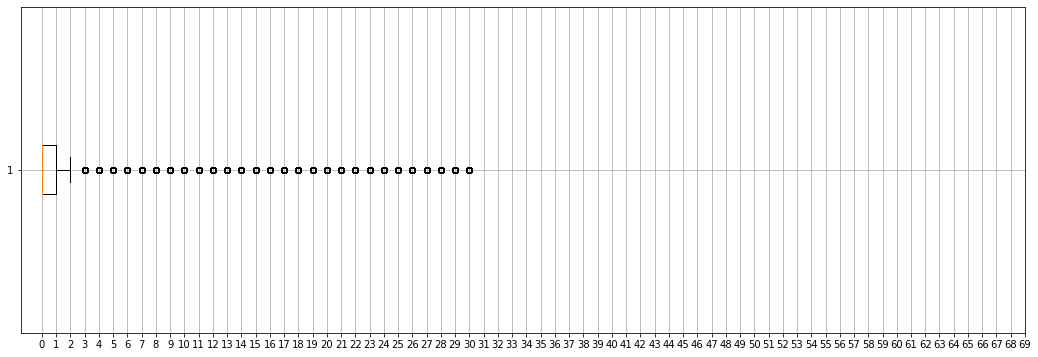

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


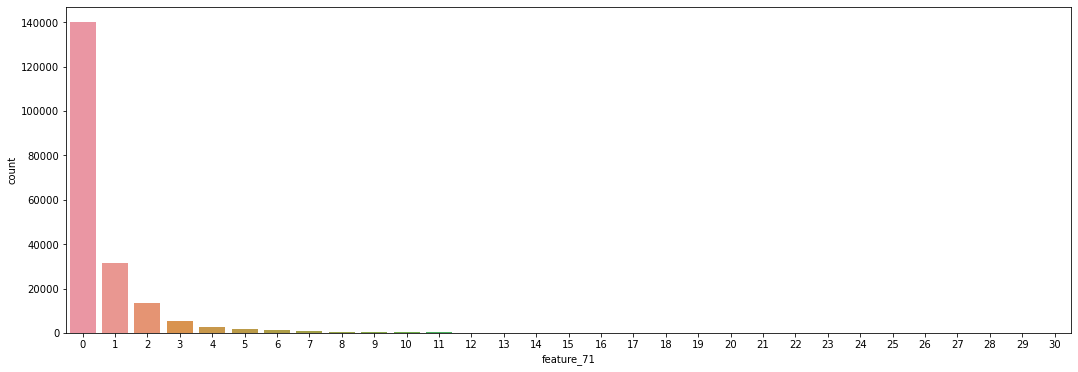

-------------------------------------------------------------------------------------------------------------------
0     123153
1      34678
2      17877
3       8588
4       5150
5       2238
6       1973
7       1021
8       1494
9        338
10       411
11        96
12        73
13        87
14        97
15        74
16        88
17       265
18       248
19       209
20        67
21        64
22        99
23        82
24        80
25       101
30        87
31       130
32       101
34       142
38       146
46       131
47       140
52       142
55       117
59       114
61        99
Name: feature_72, dtype: int64


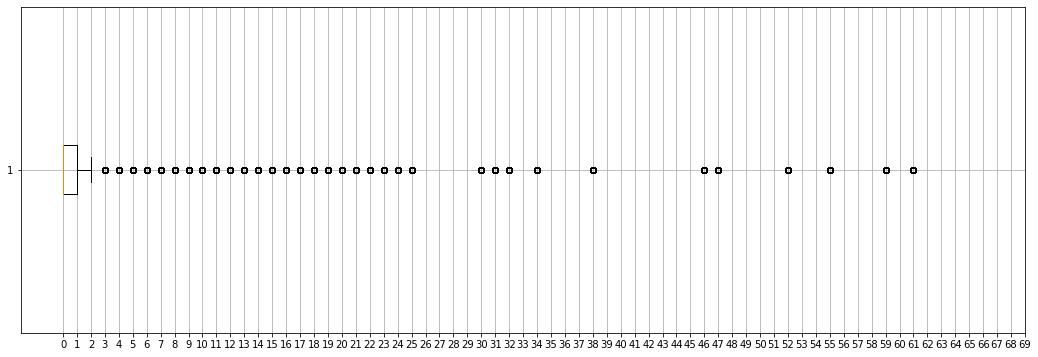

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


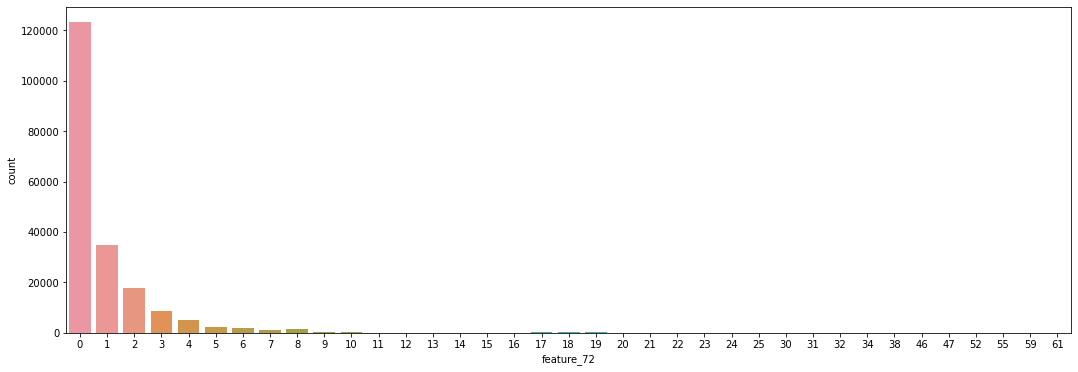

-------------------------------------------------------------------------------------------------------------------
0      142555
1       20573
2       10100
3        3980
4        3720
        ...  
100         2
106         6
109         6
127         7
130         5
Name: feature_73, Length: 91, dtype: int64


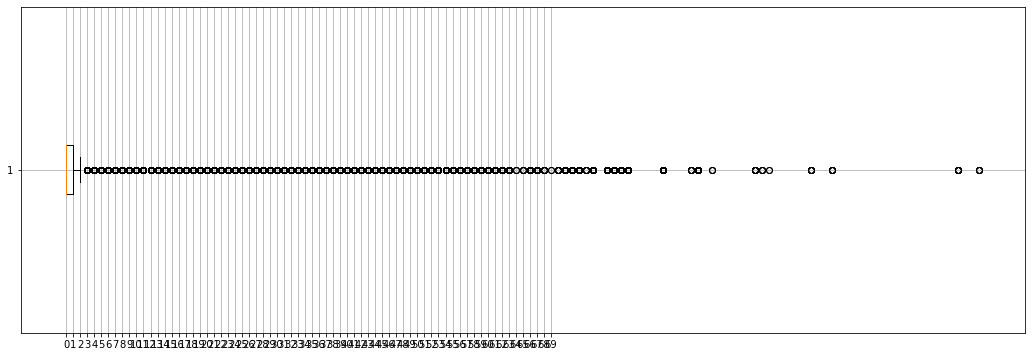

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


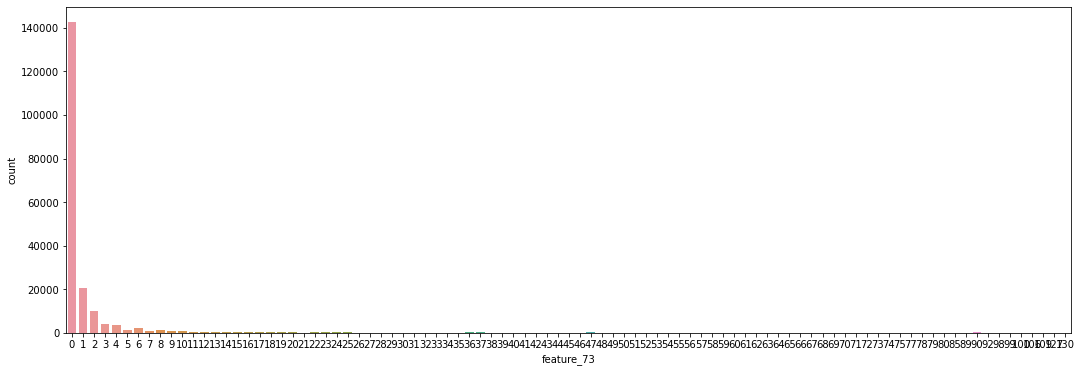

-------------------------------------------------------------------------------------------------------------------
0     169451
1      16812
2       6034
3       2823
4       1712
5        809
6        174
7         27
8         19
9         23
10        23
11        25
12        33
13        27
14        20
15        34
16        18
17        14
18        23
19        27
20        15
21        18
22        19
23        32
24        53
25        56
26        23
27        25
28        32
29        40
30        55
31        31
32        47
33        36
34        32
35        41
36        26
37        32
38        49
39       343
40        75
41        43
42        86
44        92
45        85
46        83
47        89
48       104
51       107
52       103
Name: feature_74, dtype: int64


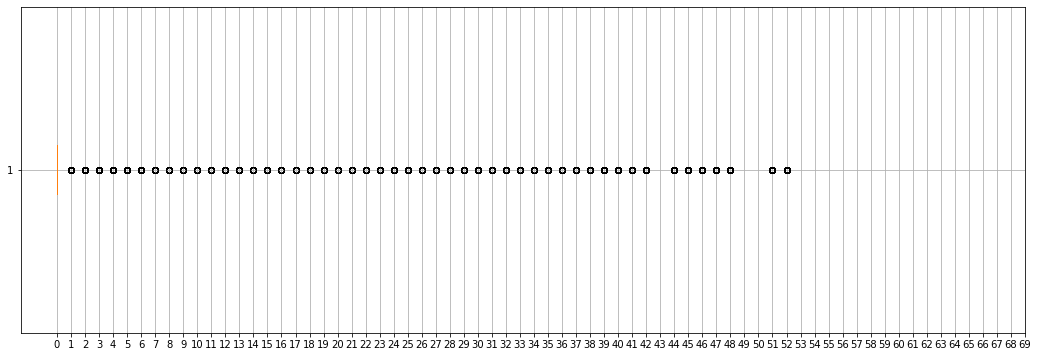

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


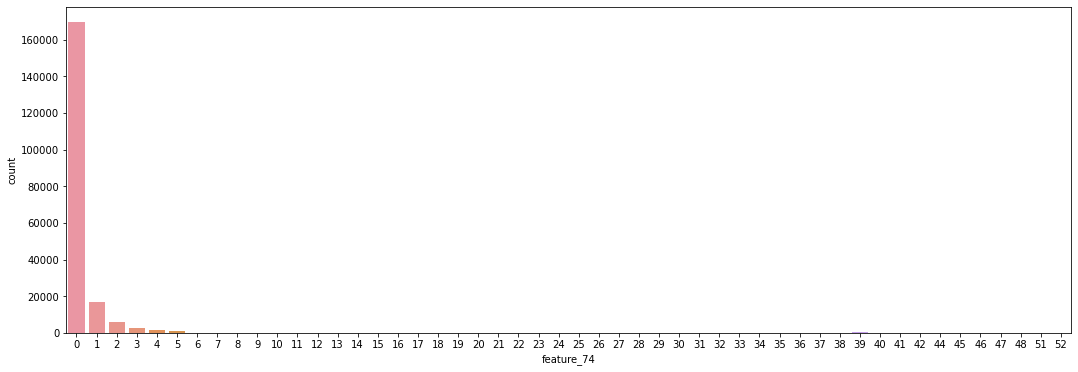

-------------------------------------------------------------------------------------------------------------------


In [14]:
for cols in ds_train.select_dtypes(exclude="object").columns:
    print(ds_train[cols].value_counts().sort_index())
    plt.figure(figsize=(18,6))
    plt.boxplot(ds_train[cols], vert=False)
    plt.xticks([x for x in range(0,70)])
    plt.grid(True)
    plt.show()
    plt.figure(figsize=(18,6))
    sns.countplot(ds_train[cols])
    plt.show()
    print("-------------------------------------------------------------------------------------------------------------------")

# Feature Selection

### 1) Variance Threshold Feature Selection

In [15]:
var_thres = VarianceThreshold()

In [16]:
var_thres.fit(ds_train.drop(columns="target"))

VarianceThreshold()

In [17]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [18]:
ds_train.drop(columns="target").columns[var_thres.get_support()]

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19',
       'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24',
       'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29',
       'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34',
       'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39',
       'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44',
       'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49',
       'feature_50', 'feature_51', 'feature_52', 'feature_53', 'feature_54',
       'feature_55', 'feature_56', 'feature_57', 'feature_58', 'feature_59',
       'feature_60', 'feature_61', 'feature_62', 'feature_63', 'feature_64',
       'f

In [19]:
constant_cols = [cols for cols in ds_train.drop(columns="target")
                if cols not in  ds_train.drop(columns="target").columns[var_thres.get_support()]]

In [20]:
print(len(constant_cols))

0


In [21]:
for features in constant_cols:
    print(features)

In [22]:
ds_train.drop(constant_cols, axis=1)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,target
0,0,0,6,1,0,0,0,0,7,0,0,0,3,0,1,0,0,3,3,1,0,2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,11,0,0,0,0,0,9,0,0,0,0,0,0,3,0,1,3,0,0,0,0,0,0,0,1,1,0,0,3,0,0,0,0,0,0,2,0,0,Class_6
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,Class_6
2,0,0,0,0,0,1,0,3,0,0,1,0,0,0,0,0,0,0,0,5,4,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,5,0,5,0,1,0,0,0,1,0,0,1,0,7,0,1,1,0,3,4,0,0,1,3,0,2,0,0,8,0,0,0,0,1,0,0,0,0,Class_2
3,0,0,7,0,1,5,2,2,0,1,2,0,5,0,0,4,0,0,22,2,1,0,0,0,0,3,0,37,0,1,3,13,0,10,0,3,1,1,0,7,0,0,2,0,1,0,0,0,0,0,0,10,0,0,25,1,0,1,2,0,2,0,7,0,0,0,0,4,0,2,2,0,4,3,0,Class_8
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,1,6,0,1,32,0,6,0,0,2,0,1,4,0,0,0,0,2,4,0,0,44,0,0,2,0,0,0,3,0,34,0,6,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,9,0,0,2,2,0,1,2,0,0,0,1,0,1,1,0,0,0,4,1,0,Class_6
199996,0,2,0,0,1,0,0,0,0,0,2,0,2,0,0,0,0,0,1,1,0,3,0,0,0,0,1,1,0,0,0,7,0,0,0,1,0,2,0,1,0,0,2,9,0,0,0,0,0,0,3,0,0,0,0,0,0,1,0,1,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,Class_6
199997,1,2,0,0,0,2,0,1,8,4,10,1,1,1,2,1,0,0,0,6,0,9,0,14,0,4,7,2,53,0,6,1,1,0,1,0,0,2,2,0,1,0,4,12,2,0,0,0,0,0,2,1,0,0,89,0,6,5,1,0,0,3,0,0,2,4,1,0,1,1,1,0,1,0,0,Class_8
199998,0,0,2,0,2,1,0,0,3,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,2,0,2,1,0,0,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,1,0,0,1,0,Class_7


### 2) Pearson Correlation Feature Selection

In [23]:
ds_train.corr()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
feature_0,1.000000,0.075635,0.069638,0.069722,0.072082,0.065814,0.062316,0.072485,0.065141,0.078520,0.072671,0.063139,0.064643,0.072482,0.083327,0.064451,0.084252,0.028813,0.075514,0.065440,0.052663,0.061290,0.052213,0.055164,0.062913,0.059797,0.062848,0.060460,0.070405,0.078095,0.075038,0.082878,0.071390,0.062324,0.059320,0.073915,0.058060,0.070288,0.066997,0.070233,0.055098,0.068891,0.066149,0.077252,0.077662,0.079408,0.085800,0.065323,0.074244,0.039733,0.067609,0.075689,0.069561,0.070309,0.069511,0.087259,0.078760,0.063554,0.062852,0.061740,0.063676,0.068510,0.080143,0.070499,0.068937,0.070449,0.046520,0.080818,0.063732,0.064846,0.081230,0.056113,0.062631,0.075857,0.054982
feature_1,0.075635,1.000000,0.098960,0.092471,0.095078,0.071548,0.074330,0.085721,0.090932,0.085114,0.063976,0.053101,0.100512,0.084193,0.107739,0.075386,0.104169,0.032414,0.108273,0.078580,0.045028,0.083342,0.064021,0.075352,0.069166,0.067507,0.057660,0.064802,0.089130,0.081283,0.084571,0.101993,0.081290,0.062960,0.075270,0.079594,0.058442,0.105551,0.091144,0.068827,0.083808,0.079801,0.070046,0.099174,0.100569,0.095365,0.086195,0.070514,0.090663,0.065841,0.085077,0.079311,0.086873,0.098310,0.080246,0.097731,0.095627,0.062967,0.086580,0.068215,0.080796,0.080137,0.088044,0.085609,0.086999,0.095708,0.076696,0.087203,0.062677,0.065639,0.088703,0.056991,0.084944,0.094933,0.065490
feature_2,0.069638,0.098960,1.000000,0.096866,0.084577,0.074458,0.073986,0.091439,0.097344,0.082069,0.061997,0.059514,0.101942,0.085103,0.104033,0.076047,0.101822,0.050333,0.115918,0.077045,0.042984,0.087704,0.075998,0.085128,0.074570,0.070625,0.052416,0.067081,0.087757,0.085315,0.078255,0.106026,0.080523,0.069745,0.067195,0.082082,0.062625,0.106814,0.087425,0.073608,0.078755,0.077901,0.069786,0.101281,0.091067,0.082718,0.088331,0.070663,0.088963,0.066440,0.085111,0.076408,0.080390,0.106593,0.085496,0.100531,0.096096,0.061780,0.081452,0.071445,0.078623,0.073717,0.086575,0.086283,0.082640,0.100290,0.078463,0.094978,0.066450,0.060703,0.079420,0.062092,0.087096,0.089565,0.061419
feature_3,0.069722,0.092471,0.096866,1.000000,0.082561,0.071485,0.078161,0.084732,0.094637,0.091393,0.058894,0.060427,0.102103,0.076990,0.099843,0.081842,0.106307,0.050725,0.107894,0.072256,0.045001,0.088376,0.079836,0.073716,0.077985,0.070648,0.060609,0.057805,0.098117,0.084237,0.075567,0.098972,0.079998,0.074440,0.072325,0.086280,0.067789,0.107160,0.091865,0.070118,0.083840,0.084831,0.073608,0.097456,0.102993,0.090002,0.088514,0.074487,0.097042,0.063215,0.080865,0.081642,0.077227,0.102542,0.089206,0.101286,0.098104,0.068196,0.082743,0.069297,0.082745,0.079541,0.090797,0.084121,0.082735,0.095962,0.082796,0.086724,0.080888,0.065390,0.084999,0.062902,0.086431,0.096262,0.060879
feature_4,0.072082,0.095078,0.084577,0.082561,1.000000,0.078421,0.076111,0.083905,0.080090,0.089852,0.070886,0.057609,0.091414,0.082670,0.098899,0.064397,0.106523,0.036713,0.100857,0.071820,0.055859,0.076815,0.064638,0.064350,0.075847,0.072592,0.060624,0.069303,0.082410,0.083602,0.082434,0.101816,0.082978,0.075125,0.072203,0.075878,0.059575,0.096901,0.070344,0.079664,0.078206,0.083516,0.067725,0.084018,0.096159,0.080561,0.085226,0.067056,0.

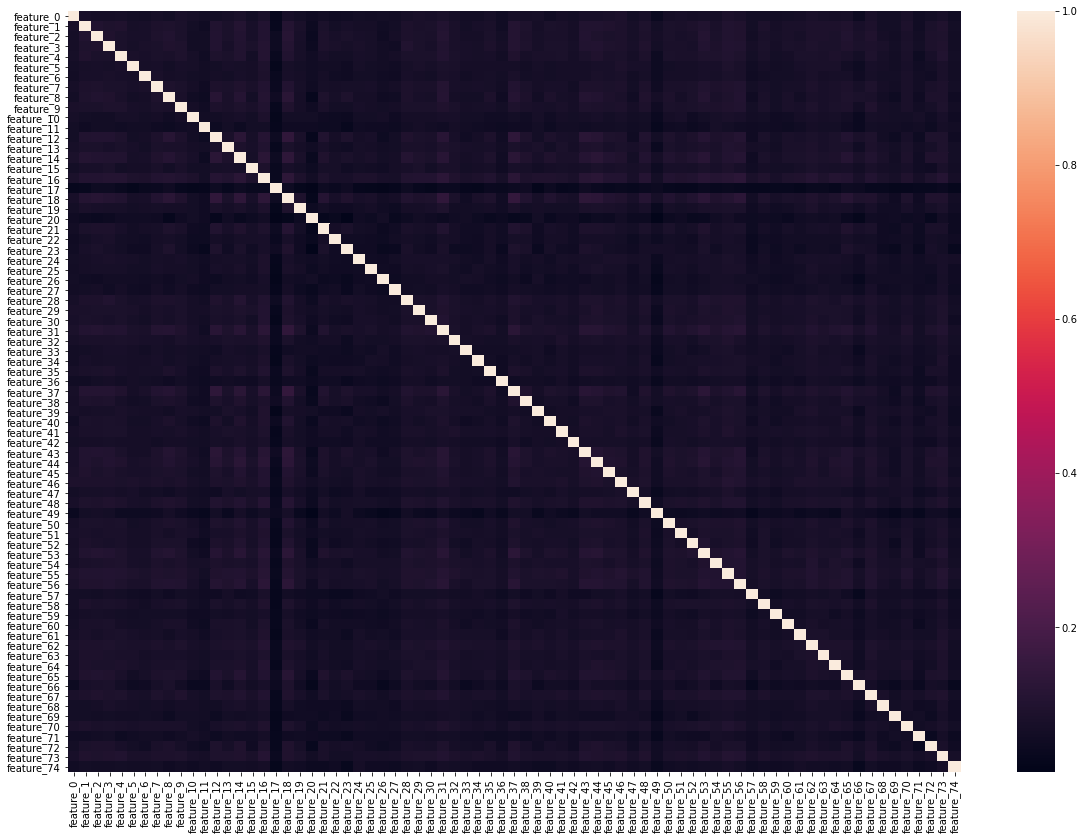

In [24]:
plt.figure(figsize=(20,14))
sns.heatmap(ds_train.corr())
plt.show()

In [25]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_name = corr_matrix[i]
                col_corr.add(col_name)
    return(col_corr)    

In [26]:
corr_features = correlation(ds_train.drop(columns="target"),0.9)

In [27]:
corr_features

set()

In [28]:
ds_train.corr().columns

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19',
       'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24',
       'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29',
       'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34',
       'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39',
       'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44',
       'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49',
       'feature_50', 'feature_51', 'feature_52', 'feature_53', 'feature_54',
       'feature_55', 'feature_56', 'feature_57', 'feature_58', 'feature_59',
       'feature_60', 'feature_61', 'feature_62', 'feature_63', 'feature_64',
       'f

In [29]:
len(ds_train.corr().columns)

75

## 3) Mutual Info Class

In [14]:
mutual_info = mutual_info_classif(ds_train.drop(columns="target"),ds_train["target"], n_neighbors=5, random_state=0)

In [15]:
mutual_info

array([0.00510955, 0.02130577, 0.0267716 , 0.03059374, 0.01338787,
       0.00981041, 0.00473396, 0.01340145, 0.02522581, 0.01585964,
       0.00372902, 0.00606614, 0.03668516, 0.01208228, 0.03241907,
       0.00776306, 0.02193394, 0.00546976, 0.0380468 , 0.01168561,
       0.01819979, 0.02103781, 0.00582999, 0.01681249, 0.01341768,
       0.01202976, 0.00250476, 0.00488639, 0.02981359, 0.00967296,
       0.01009942, 0.02931077, 0.00744086, 0.00492475, 0.00816668,
       0.01365145, 0.00053851, 0.04145487, 0.01587845, 0.01082692,
       0.03404614, 0.01147503, 0.00582441, 0.03943517, 0.02091847,
       0.0148769 , 0.00979766, 0.00364812, 0.01426753, 0.00825996,
       0.02358511, 0.00964196, 0.01432822, 0.03375114, 0.00816325,
       0.01200378, 0.02456329, 0.00420793, 0.01248093, 0.00765589,
       0.01373144, 0.00887627, 0.01022046, 0.00991521, 0.00583526,
       0.02968788, 0.01283916, 0.01348303, 0.00672089, 0.01092573,
       0.01365283, 0.0055457 , 0.02989836, 0.0088744 , 0.00197

In [16]:
mutual_info = pd.Series(mutual_info)
mutual_info

0     0.005110
1     0.021306
2     0.026772
3     0.030594
4     0.013388
        ...   
70    0.013653
71    0.005546
72    0.029898
73    0.008874
74    0.001976
Length: 75, dtype: float64

In [17]:
mutual_info.index = ds_train.drop(columns="target").columns

In [18]:
mutual_info.sort_values(ascending=False)

feature_37    0.041455
feature_43    0.039435
feature_18    0.038047
feature_12    0.036685
feature_40    0.034046
                ...   
feature_10    0.003729
feature_47    0.003648
feature_26    0.002505
feature_74    0.001976
feature_36    0.000539
Length: 75, dtype: float64

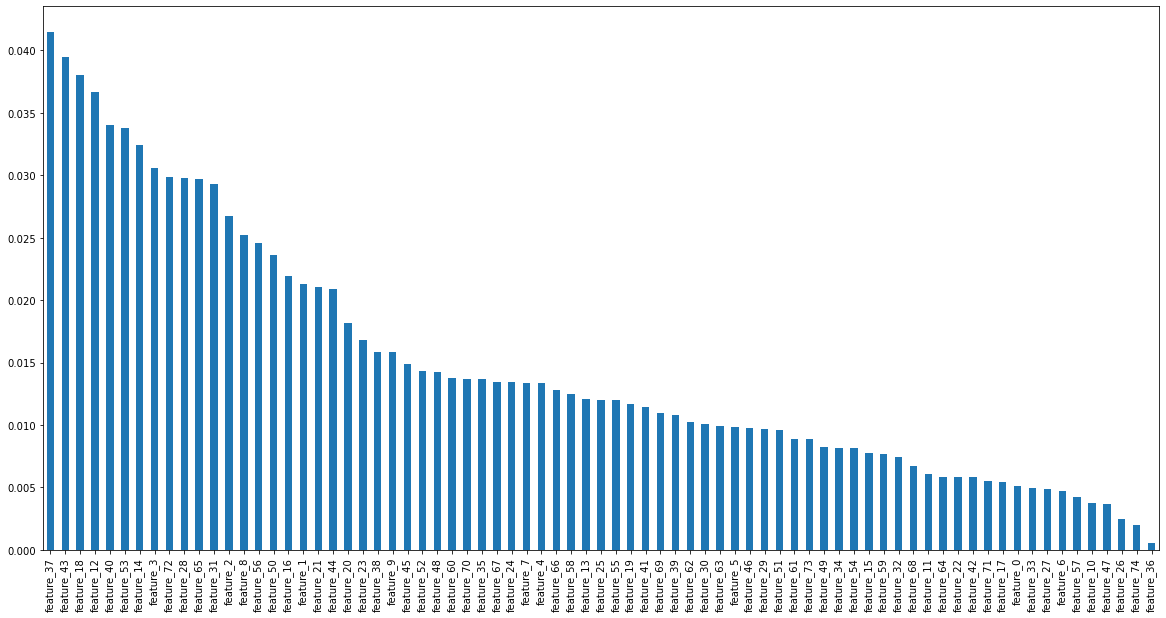

In [19]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,10))
plt.show()

In [20]:
select_columns = SelectKBest(mutual_info_classif, k=40)

In [21]:
select_columns.fit(ds_train.drop(columns="target"), ds_train["target"])

SelectKBest(k=40,
            score_func=<function mutual_info_classif at 0x0000019CD9D1D430>)

In [25]:
X_kbest = select_columns.transform(ds_train.drop(columns="target"))

In [26]:
X_kbest

array([[ 0,  6,  1, ...,  0,  0,  2],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  1,  0],
       ...,
       [ 2,  0,  0, ...,  0,  1,  1],
       [ 0,  2,  0, ...,  0,  1,  0],
       [ 4,  0, 10, ...,  0,  0,  2]], dtype=int64)

In [27]:
type(X_kbest)

numpy.ndarray

In [41]:
X_resampled, y_resampled = smt.fit_resample(ds_train.iloc[:,:-1], ds_train.iloc[:,-1])

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


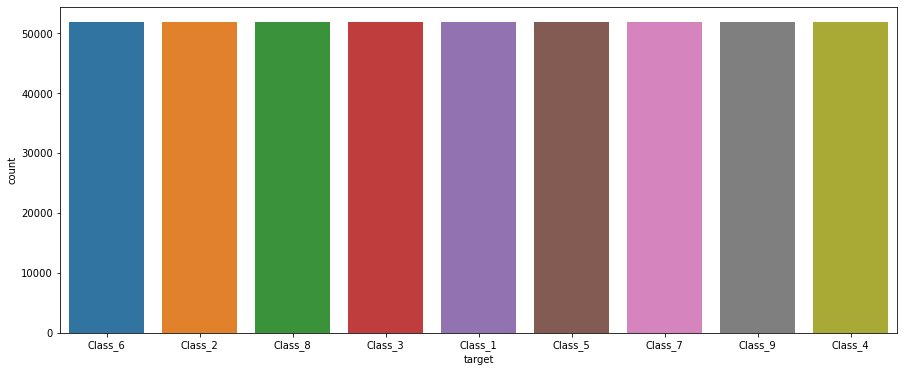

In [42]:
plt.figure(figsize=(15,6))
sns.countplot(y_resampled)
plt.show()

In [14]:
X = ds_train.drop(columns="target").values
y = ds_train["target"].values
X_test = ds_test.values

In [15]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)

In [85]:
X_train_re, X_valid_re, y_train_re, y_valid_re = train_test_split(X_resampled, y_resampled, random_state=0)

In [31]:
X_train_kbest, X_valid_kbest, y_train_kbest, y_valid_kbest = train_test_split(X_kbest, y, random_state=0)

In [16]:
sc = StandardScaler()

In [17]:
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)
X_test = sc.transform(X_test)

In [86]:
sc_re = StandardScaler()

In [87]:
X_train_re = sc_re.fit_transform(X_train_re)
X_valid_re = sc_re.transform(X_valid_re)
X_test = sc_re.transform(X_test)

In [32]:
sc_kbest = StandardScaler()

In [34]:
X_train_kbest = sc_kbest.fit_transform(X_train_kbest)
X_valid_kbest = sc_kbest.transform(X_valid_kbest)

In [57]:
knc = KNeighborsClassifier(n_jobs=-1)

In [58]:
# knc.fit(X_train,y_train)
# print(knc.score(X_train,y_train))
# print(knc.score(X_valid,y_valid))

0.46316666666666667
0.26076


In [35]:
knc_kbest = KNeighborsClassifier()

In [36]:
knc_kbest.fit(X_train_kbest,y_train_kbest)
print(knc_kbest.score(X_train_kbest,y_train_kbest))
print(knc_kbest.score(X_valid_kbest,y_valid_kbest))

0.46498
0.22572


In [37]:
log_loss(y_train_kbest,knc_kbest.predict_proba(X_train_kbest))

1.3748414440611472

In [38]:
log_loss(y_valid_kbest,knc_kbest.predict_proba(X_valid_kbest))

15.191646984676936

In [50]:
xgb = XGBClassifier(n_jobs=-1)

In [51]:
xgb.fit(X_train,y_train)
print(xgb.score(X_train,y_train))
print(xgb.score(X_valid,y_valid))

C:\Users\rohit\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:12:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.46676
0.3555


In [52]:
log_loss(y_train,xgb.predict_proba(X_train))

1.5014420051785435

In [53]:
log_loss(y_valid,xgb.predict_proba(X_valid))

1.7711117303287611

In [88]:
xgb_re = XGBClassifier(n_jobs=-1)

In [89]:
xgb_re.fit(X_train_re,y_train_re)
print(xgb_re.score(X_train_re,y_train_re))
print(xgb_re.score(X_valid_re,y_valid_re))

C:\Users\rohit\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:26:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.4109297617549839
0.3249667595968261


In [90]:
log_loss(y_train_re,xgb_re.predict_proba(X_train_re))

1.7391280337683306

In [91]:
log_loss(y_valid_re,xgb_re.predict_proba(X_valid_re))

1.870091002042933

In [40]:
xgb_kbest = XGBClassifier(n_jobs=-1)

In [42]:
xgb_kbest.fit(X_train_kbest,y_train_kbest)
print(xgb_kbest.score(X_train_kbest,y_train_kbest))
print(xgb_kbest.score(X_valid_kbest,y_valid_kbest))

C:\Users\rohit\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:04:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.44562
0.23902


In [43]:
log_loss(y_train_kbest,xgb_kbest.predict_proba(X_train_kbest))

1.548883795516317

In [44]:
log_loss(y_valid_kbest,xgb_kbest.predict_proba(X_valid_kbest))

2.4551870127709954

In [73]:
cbc = CatBoostClassifier(random_state=0)

In [74]:
cbc.fit(X_train,y_train)
print(cbc.score(X_train,y_train))
print(cbc.score(X_valid,y_valid))

Learning rate set to 0.102165
0:	learn: 2.1150767	total: 420ms	remaining: 6m 59s
1:	learn: 2.0526695	total: 713ms	remaining: 5m 55s
2:	learn: 2.0021875	total: 1s	remaining: 5m 32s
3:	learn: 1.9625309	total: 1.31s	remaining: 5m 27s
4:	learn: 1.9305729	total: 1.61s	remaining: 5m 20s
5:	learn: 1.9041768	total: 1.91s	remaining: 5m 16s
6:	learn: 1.8823677	total: 2.23s	remaining: 5m 16s
7:	learn: 1.8638043	total: 2.52s	remaining: 5m 12s
8:	learn: 1.8484405	total: 2.79s	remaining: 5m 7s
9:	learn: 1.8347806	total: 3.07s	remaining: 5m 3s
10:	learn: 1.8234109	total: 3.34s	remaining: 5m
11:	learn: 1.8137508	total: 3.62s	remaining: 4m 57s
12:	learn: 1.8055180	total: 3.87s	remaining: 4m 53s
13:	learn: 1.7982236	total: 4.14s	remaining: 4m 51s
14:	learn: 1.7921579	total: 4.43s	remaining: 4m 50s
15:	learn: 1.7866705	total: 4.69s	remaining: 4m 48s
16:	learn: 1.7820912	total: 4.96s	remaining: 4m 46s
17:	learn: 1.7780754	total: 5.21s	remaining: 4m 44s
18:	learn: 1.7746811	total: 5.47s	remaining: 4m 42s
1

158:	learn: 1.7144408	total: 36.1s	remaining: 3m 11s
159:	learn: 1.7142851	total: 36.3s	remaining: 3m 10s
160:	learn: 1.7140764	total: 36.5s	remaining: 3m 10s
161:	learn: 1.7138549	total: 36.7s	remaining: 3m 10s
162:	learn: 1.7136049	total: 37s	remaining: 3m 9s
163:	learn: 1.7134088	total: 37.2s	remaining: 3m 9s
164:	learn: 1.7132069	total: 37.4s	remaining: 3m 9s
165:	learn: 1.7129618	total: 37.6s	remaining: 3m 9s
166:	learn: 1.7128085	total: 37.8s	remaining: 3m 8s
167:	learn: 1.7125778	total: 38s	remaining: 3m 8s
168:	learn: 1.7123405	total: 38.2s	remaining: 3m 7s
169:	learn: 1.7121331	total: 38.4s	remaining: 3m 7s
170:	learn: 1.7119542	total: 38.6s	remaining: 3m 6s
171:	learn: 1.7116894	total: 38.8s	remaining: 3m 6s
172:	learn: 1.7115079	total: 39s	remaining: 3m 6s
173:	learn: 1.7113330	total: 39.2s	remaining: 3m 5s
174:	learn: 1.7112073	total: 39.4s	remaining: 3m 5s
175:	learn: 1.7110494	total: 39.6s	remaining: 3m 5s
176:	learn: 1.7108513	total: 39.7s	remaining: 3m 4s
177:	learn: 1.

316:	learn: 1.6872383	total: 1m 7s	remaining: 2m 25s
317:	learn: 1.6870948	total: 1m 7s	remaining: 2m 25s
318:	learn: 1.6870037	total: 1m 7s	remaining: 2m 25s
319:	learn: 1.6868974	total: 1m 8s	remaining: 2m 24s
320:	learn: 1.6867652	total: 1m 8s	remaining: 2m 24s
321:	learn: 1.6865791	total: 1m 8s	remaining: 2m 24s
322:	learn: 1.6864796	total: 1m 8s	remaining: 2m 24s
323:	learn: 1.6863098	total: 1m 8s	remaining: 2m 23s
324:	learn: 1.6861467	total: 1m 9s	remaining: 2m 23s
325:	learn: 1.6859776	total: 1m 9s	remaining: 2m 23s
326:	learn: 1.6857933	total: 1m 9s	remaining: 2m 23s
327:	learn: 1.6856001	total: 1m 9s	remaining: 2m 22s
328:	learn: 1.6853792	total: 1m 9s	remaining: 2m 22s
329:	learn: 1.6851962	total: 1m 10s	remaining: 2m 22s
330:	learn: 1.6850190	total: 1m 10s	remaining: 2m 22s
331:	learn: 1.6848645	total: 1m 10s	remaining: 2m 21s
332:	learn: 1.6846077	total: 1m 10s	remaining: 2m 21s
333:	learn: 1.6844452	total: 1m 10s	remaining: 2m 21s
334:	learn: 1.6843351	total: 1m 11s	remai

469:	learn: 1.6647041	total: 1m 35s	remaining: 1m 48s
470:	learn: 1.6645518	total: 1m 36s	remaining: 1m 47s
471:	learn: 1.6644677	total: 1m 36s	remaining: 1m 47s
472:	learn: 1.6643718	total: 1m 36s	remaining: 1m 47s
473:	learn: 1.6642247	total: 1m 36s	remaining: 1m 47s
474:	learn: 1.6640463	total: 1m 36s	remaining: 1m 47s
475:	learn: 1.6638518	total: 1m 37s	remaining: 1m 46s
476:	learn: 1.6637743	total: 1m 37s	remaining: 1m 46s
477:	learn: 1.6635878	total: 1m 37s	remaining: 1m 46s
478:	learn: 1.6635566	total: 1m 37s	remaining: 1m 46s
479:	learn: 1.6634079	total: 1m 37s	remaining: 1m 46s
480:	learn: 1.6633371	total: 1m 38s	remaining: 1m 45s
481:	learn: 1.6632489	total: 1m 38s	remaining: 1m 45s
482:	learn: 1.6630971	total: 1m 38s	remaining: 1m 45s
483:	learn: 1.6629624	total: 1m 38s	remaining: 1m 45s
484:	learn: 1.6627811	total: 1m 38s	remaining: 1m 44s
485:	learn: 1.6626466	total: 1m 38s	remaining: 1m 44s
486:	learn: 1.6625599	total: 1m 39s	remaining: 1m 44s
487:	learn: 1.6624054	total:

622:	learn: 1.6436019	total: 2m 4s	remaining: 1m 15s
623:	learn: 1.6434378	total: 2m 5s	remaining: 1m 15s
624:	learn: 1.6432308	total: 2m 5s	remaining: 1m 15s
625:	learn: 1.6430654	total: 2m 5s	remaining: 1m 14s
626:	learn: 1.6429099	total: 2m 5s	remaining: 1m 14s
627:	learn: 1.6427402	total: 2m 5s	remaining: 1m 14s
628:	learn: 1.6426073	total: 2m 6s	remaining: 1m 14s
629:	learn: 1.6424324	total: 2m 6s	remaining: 1m 14s
630:	learn: 1.6422922	total: 2m 6s	remaining: 1m 13s
631:	learn: 1.6421231	total: 2m 6s	remaining: 1m 13s
632:	learn: 1.6420174	total: 2m 6s	remaining: 1m 13s
633:	learn: 1.6419121	total: 2m 6s	remaining: 1m 13s
634:	learn: 1.6417837	total: 2m 7s	remaining: 1m 13s
635:	learn: 1.6416743	total: 2m 7s	remaining: 1m 12s
636:	learn: 1.6415194	total: 2m 7s	remaining: 1m 12s
637:	learn: 1.6413212	total: 2m 7s	remaining: 1m 12s
638:	learn: 1.6411830	total: 2m 8s	remaining: 1m 12s
639:	learn: 1.6410103	total: 2m 8s	remaining: 1m 12s
640:	learn: 1.6408896	total: 2m 8s	remaining: 

778:	learn: 1.6229181	total: 2m 34s	remaining: 43.9s
779:	learn: 1.6227784	total: 2m 34s	remaining: 43.7s
780:	learn: 1.6226560	total: 2m 34s	remaining: 43.5s
781:	learn: 1.6225052	total: 2m 35s	remaining: 43.3s
782:	learn: 1.6223396	total: 2m 35s	remaining: 43.1s
783:	learn: 1.6222636	total: 2m 35s	remaining: 42.9s
784:	learn: 1.6220998	total: 2m 35s	remaining: 42.7s
785:	learn: 1.6219133	total: 2m 36s	remaining: 42.5s
786:	learn: 1.6217640	total: 2m 36s	remaining: 42.3s
787:	learn: 1.6216624	total: 2m 36s	remaining: 42.1s
788:	learn: 1.6214807	total: 2m 36s	remaining: 41.9s
789:	learn: 1.6213449	total: 2m 36s	remaining: 41.7s
790:	learn: 1.6211937	total: 2m 37s	remaining: 41.5s
791:	learn: 1.6210233	total: 2m 37s	remaining: 41.3s
792:	learn: 1.6208930	total: 2m 37s	remaining: 41.1s
793:	learn: 1.6207423	total: 2m 37s	remaining: 40.9s
794:	learn: 1.6205495	total: 2m 37s	remaining: 40.7s
795:	learn: 1.6204488	total: 2m 38s	remaining: 40.5s
796:	learn: 1.6203107	total: 2m 38s	remaining:

935:	learn: 1.6011077	total: 3m 5s	remaining: 12.7s
936:	learn: 1.6009816	total: 3m 5s	remaining: 12.5s
937:	learn: 1.6008393	total: 3m 5s	remaining: 12.3s
938:	learn: 1.6006787	total: 3m 6s	remaining: 12.1s
939:	learn: 1.6005628	total: 3m 6s	remaining: 11.9s
940:	learn: 1.6004308	total: 3m 6s	remaining: 11.7s
941:	learn: 1.6003468	total: 3m 6s	remaining: 11.5s
942:	learn: 1.6001577	total: 3m 6s	remaining: 11.3s
943:	learn: 1.6000176	total: 3m 7s	remaining: 11.1s
944:	learn: 1.5998566	total: 3m 7s	remaining: 10.9s
945:	learn: 1.5996311	total: 3m 7s	remaining: 10.7s
946:	learn: 1.5994593	total: 3m 7s	remaining: 10.5s
947:	learn: 1.5993218	total: 3m 7s	remaining: 10.3s
948:	learn: 1.5991781	total: 3m 8s	remaining: 10.1s
949:	learn: 1.5990545	total: 3m 8s	remaining: 9.91s
950:	learn: 1.5988734	total: 3m 8s	remaining: 9.71s
951:	learn: 1.5986730	total: 3m 8s	remaining: 9.52s
952:	learn: 1.5985067	total: 3m 8s	remaining: 9.32s
953:	learn: 1.5983554	total: 3m 9s	remaining: 9.12s
954:	learn: 

In [75]:
log_loss(y_train, cbc.predict_proba(X_train))

1.592396585001256

In [76]:
log_loss(y_valid, cbc.predict_proba(X_valid))

1.7547946797439744

In [20]:
lgbmc = LGBMClassifier(n_jobs=-1)

In [21]:
lgbmc.fit(X_train, y_train)
print(lgbmc.score(X_train, y_train))
print(lgbmc.score(X_valid, y_valid))

0.41252
0.36104


In [22]:
log_loss(y_train, lgbmc.predict_proba(X_train))

1.5895986622552258

In [23]:
log_loss(y_valid, lgbmc.predict_proba(X_valid))

1.7562495090895565

In [77]:
y_pred_prob = cbc.predict_proba(X_test)

In [78]:
y_pred_prob

array([[0.05609873, 0.36899348, 0.1556804 , ..., 0.02525915, 0.0585745 ,
        0.12045006],
       [0.0332364 , 0.07212563, 0.05348328, ..., 0.10558696, 0.32574142,
        0.1407568 ],
       [0.0221931 , 0.02837756, 0.02292823, ..., 0.03513875, 0.12624812,
        0.06353466],
       ...,
       [0.07623963, 0.27159951, 0.11847557, ..., 0.04447569, 0.1147802 ,
        0.14868121],
       [0.03796896, 0.01724994, 0.02065929, ..., 0.07529716, 0.3728902 ,
        0.08164881],
       [0.04035689, 0.06590743, 0.07520439, ..., 0.08239651, 0.24548414,
        0.15058605]])

In [79]:
target = pd.DataFrame(y_pred_prob, columns=["Class_1","Class_2","Class_3","Class_4","Class_5","Class_6","Class_7","Class_8","Class_9"])

In [80]:
target

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,0.056099,0.368993,0.155680,0.028435,0.014486,0.172022,0.025259,0.058575,0.120450
1,0.033236,0.072126,0.053483,0.014699,0.009836,0.244534,0.105587,0.325741,0.140757
2,0.022193,0.028378,0.022928,0.009428,0.006883,0.685269,0.035139,0.126248,0.063535
3,0.043690,0.099642,0.083930,0.054024,0.027899,0.207713,0.067100,0.248318,0.167685
4,0.037046,0.131319,0.092288,0.025078,0.013276,0.263820,0.056191,0.218689,0.162294
...,...,...,...,...,...,...,...,...,...
99995,0.067385,0.366520,0.132812,0.031145,0.013994,0.107874,0.038006,0.093620,0.148644
99996,0.053640,0.276186,0.137568,0.021009,0.014079,0.153130,0.038805,0.158933,0.146649
99997,0.076240,0.271600,0.118476,0.029680,0.009605,0.186463,0.044476,0.114780,0.148681
99998,0.037969,0.017250,0.020659,0.012797,0.012640,0.368849,0.075297,0.372890,0.081649


In [81]:
id_test_data = pd.read_csv("test.csv")

In [82]:
id_test_data

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
0,200000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,200001,1,2,0,0,0,0,0,0,0,0,1,0,2,2,0,0,1,0,0,0,2,0,0,1,0,3,0,1,0,0,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,3,2,0,0,0,0,0,0,1,7,0,1,3,1,3,0,0,0,0,3,0,0
2,200002,0,1,7,1,0,0,0,0,6,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,2,0,0,4,0,0,0,0,0,0,0,0,1,0,0,4,0,0,1,0,0,0,6,0,0,2,10,0,0,0,2,1,0,0,0,0,0,3,0,0,0,0,3,0,2,0,0
3,200003,0,0,0,4,3,1,0,0,0,0,7,0,0,0,7,0,0,0,5,0,1,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,7,5,0,0,0,0,0,0,0,0,0,2,3,0,0,0,1,0,0,0,0,0,4,0,0,0,1,0,0,0,4,0,0
4,200004,0,0,5,0,0,0,0,0,0,8,1,0,2,0,0,0,0,0,9,1,0,0,0,0,0,0,0,0,3,0,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,2,1,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,299995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,1,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
99996,299996,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,1,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0
99997,299997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2
99998,299998,0,0,0,0,2,2,0,0,1,0,0,0,9,1,1,0,0,0,1,1,0,10,0,1,0,0,0,0,0,0,2,1,1,0,0,0,0,1,0,2,1,0,1,1,0,3,2,1,1,1,2,0,0,4,6,0,9,0,1,0,3,2,0,1,0,1,0,0,0,0,1,0,1,0,0


In [83]:
id_test = id_test_data.filter(["id"],axis=1) 

In [84]:
id_test

,id
0,200000
1,200001
2,200002
3,200003
4,200004
...,...
99995,299995
99996,299996
99997,299997
99998,299998


In [85]:
predicted = pd.concat([id_test, target], axis=1)

In [86]:
predicted

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,200000,0.056099,0.368993,0.155680,0.028435,0.014486,0.172022,0.025259,0.058575,0.120450
1,200001,0.033236,0.072126,0.053483,0.014699,0.009836,0.244534,0.105587,0.325741,0.140757
2,200002,0.022193,0.028378,0.022928,0.009428,0.006883,0.685269,0.035139,0.126248,0.063535
3,200003,0.043690,0.099642,0.083930,0.054024,0.027899,0.207713,0.067100,0.248318,0.167685
4,200004,0.037046,0.131319,0.092288,0.025078,0.013276,0.263820,0.056191,0.218689,0.162294
...,...,...,...,...,...,...,...,...,...,...
99995,299995,0.067385,0.366520,0.132812,0.031145,0.013994,0.107874,0.038006,0.093620,0.148644
99996,299996,0.053640,0.276186,0.137568,0.021009,0.014079,0.153130,0.038805,0.158933,0.146649
99997,299997,0.076240,0.271600,0.118476,0.029680,0.009605,0.186463,0.044476,0.114780,0.148681
99998,299998,0.037969,0.017250,0.020659,0.012797,0.012640,0.368849,0.075297,0.372890,0.081649


In [87]:
# predicted.to_csv("predicted_cbc.csv")